# Population Simulator

## Basic Population Simulator with Ageing Birthing and Murder

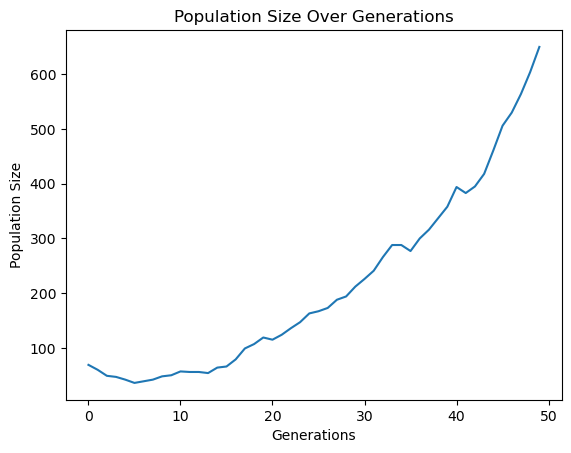

In [1]:
import random
import matplotlib.pyplot as plt

# Define the Individual class
class Individual:
    def __init__(self, aggression, peacefulness, birth_rate, lifespan=80):
        self.aggression = aggression
        self.peacefulness = peacefulness
        self.birth_rate = birth_rate
        self.age = 0
        self.lifespan = lifespan

    def age_one_year(self):
        self.age += 1
        return self.age >= self.lifespan

    def mutate(self):
        # Mutation logic: small random changes to traits
        self.aggression = max(0, min(1, self.aggression + random.uniform(-0.05, 0.05)))
        self.peacefulness = max(0, min(1, self.peacefulness + random.uniform(-0.05, 0.05)))
        self.birth_rate = max(0, min(1, self.birth_rate + random.uniform(-0.05, 0.05)))

# Define the Population class
class Population:
    def __init__(self, size):
        self.individuals = [self.create_random_individual() for _ in range(size)]
    
    def create_random_individual(self):
        aggression = random.uniform(0, 1)
        peacefulness = random.uniform(0, 1)
        birth_rate = random.uniform(0, 1)
        return Individual(aggression, peacefulness, birth_rate)
    
    def simulate_year(self):
        # Aging individuals
        self.individuals = [ind for ind in self.individuals if not ind.age_one_year()]
        
        # Murder events based on aggression
        survivors = []
        for ind in self.individuals:
            if random.random() > ind.aggression:
                survivors.append(ind)
        
        self.individuals = survivors
        
        # Birth events based on birth rate
        new_births = []
        for ind in self.individuals:
            if random.random() < ind.birth_rate:
                new_births.append(self.create_random_individual())
        
        self.individuals.extend(new_births)
        
        # Mutations
        for ind in self.individuals:
            ind.mutate()
    
    def simulate_generations(self, generations):
        population_sizes = []
        for _ in range(generations):
            self.simulate_year()
            population_sizes.append(len(self.individuals))
        
        return population_sizes

# Initial simulation
population = Population(100)
population_sizes = population.simulate_generations(50)

# Plot the population size over generations
plt.plot(population_sizes)
plt.title("Population Size Over Generations")
plt.xlabel("Generations")
plt.ylabel("Population Size")
plt.show()


## Population Simulator with Additional Concept of Intelligence, Health, Wealth, Socialising, etc.

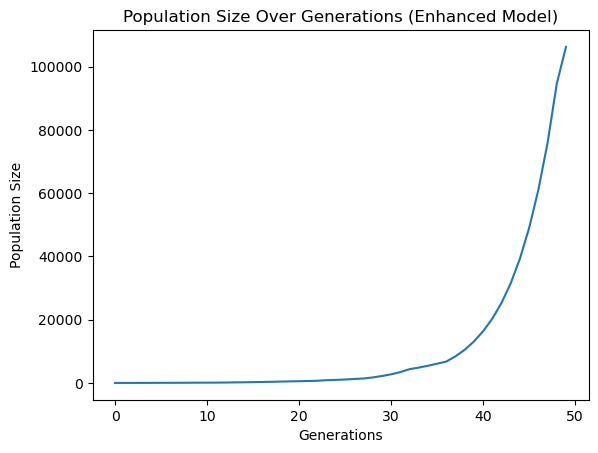

In [6]:
# Define the Individual class with additional traits
class Individual:
    def __init__(self, aggression, peacefulness, birth_rate, intelligence, social_cohesion, health, wealth, cooperation, curiosity, lifespan=80):
        self.aggression = aggression
        self.peacefulness = peacefulness
        self.birth_rate = birth_rate
        self.intelligence = intelligence
        self.social_cohesion = social_cohesion
        self.health = health
        self.wealth = wealth
        self.cooperation = cooperation
        self.curiosity = curiosity
        self.age = 0
        self.lifespan = lifespan

    def age_one_year(self):
        self.age += 1
        return self.age >= self.lifespan

    def mutate(self):
        # Mutation logic: small random changes to traits
        self.aggression = max(0, min(1, self.aggression + random.uniform(-0.05, 0.05)))
        self.peacefulness = max(0, min(1, self.peacefulness + random.uniform(-0.05, 0.05)))
        self.birth_rate = max(0, min(1, self.birth_rate + random.uniform(-0.05, 0.05)))
        self.intelligence = max(0, min(1, self.intelligence + random.uniform(-0.05, 0.05)))
        self.social_cohesion = max(0, min(1, self.social_cohesion + random.uniform(-0.05, 0.05)))
        self.health = max(0, min(1, self.health + random.uniform(-0.05, 0.05)))
        self.wealth = max(0, min(1, self.wealth + random.uniform(-0.05, 0.05)))
        self.cooperation = max(0, min(1, self.cooperation + random.uniform(-0.05, 0.05)))
        self.curiosity = max(0, min(1, self.curiosity + random.uniform(-0.05, 0.05)))

# Define the Population class with complex interactions
class Population:
    def __init__(self, size):
        self.individuals = [self.create_random_individual() for _ in range(size)]
    
    def create_random_individual(self):
        # Randomly initialize an individual with all traits
        return Individual(
            aggression=random.uniform(0, 1),
            peacefulness=random.uniform(0, 1),
            birth_rate=random.uniform(0, 1),
            intelligence=random.uniform(0, 1),
            social_cohesion=random.uniform(0, 1),
            health=random.uniform(0, 1),
            wealth=random.uniform(0, 1),
            cooperation=random.uniform(0, 1),
            curiosity=random.uniform(0, 1)
        )
    
    def simulate_year(self):
        # Aging individuals
        self.individuals = [ind for ind in self.individuals if not ind.age_one_year()]
        
        # Handle interactions
        survivors = []
        for ind in self.individuals:
            # Murder chance influenced by aggression and peacefulness
            murder_risk = ind.aggression - ind.peacefulness
            if random.random() > murder_risk:
                survivors.append(ind)
        
        self.individuals = survivors
        
        # Birth events influenced by birth rate, health, and wealth
        new_births = []
        for ind in self.individuals:
            birth_probability = ind.birth_rate * ind.health * (1 + ind.wealth)
            if random.random() < birth_probability:
                new_births.append(self.create_random_individual())
        
        self.individuals.extend(new_births)
        
        # Mutations
        for ind in self.individuals:
            ind.mutate()

        # Social cohesion can protect against murders
        social_protection = sum(ind.social_cohesion for ind in self.individuals) / len(self.individuals)
        if social_protection > 0.5:
            survivors = []
            for ind in self.individuals:
                if random.random() > 0.1:  # Reduced murder rate due to social cohesion
                    survivors.append(ind)
            self.individuals = survivors

    def simulate_generations(self, generations):
        population_sizes = []
        for _ in range(generations):
            self.simulate_year()
            population_sizes.append(len(self.individuals))
        
        return population_sizes

# Enhanced simulation
population = Population(10)
population_sizes = population.simulate_generations(50)

# Plot the population size over generations
plt.plot(population_sizes)
plt.title("Population Size Over Generations (Enhanced Model)")
plt.xlabel("Generations")
plt.ylabel("Population Size")
plt.show()


## Population Simulator With Even More Features Such as Resources, Disease Spread, etc

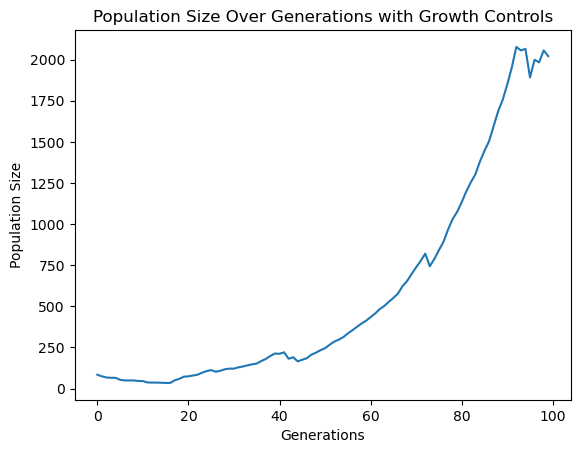

In [7]:
# Define constants
INITIAL_RESOURCES = 1000  # Initial resources available
RESOURCE_REGENERATION = 100  # Resources regenerated each year
CARRYING_CAPACITY = 500  # Maximum population the environment can support

# Define the Individual class with additional traits and aging factors
class Individual:
    def __init__(self, aggression, peacefulness, birth_rate, intelligence, social_cohesion, health, wealth, cooperation, curiosity, age=0, lifespan=80):
        self.aggression = aggression
        self.peacefulness = peacefulness
        self.birth_rate = birth_rate
        self.intelligence = intelligence
        self.social_cohesion = social_cohesion
        self.health = health
        self.wealth = wealth
        self.cooperation = cooperation
        self.curiosity = curiosity
        self.age = age
        self.lifespan = lifespan

    def age_one_year(self):
        self.age += 1
        return self.age >= self.lifespan

    def is_fertile(self):
        # Fertility is higher between ages 18 and 40
        return 18 <= self.age <= 40

    def mutate(self):
        # Mutation logic: small random changes to traits
        self.aggression = max(0, min(1, self.aggression + random.uniform(-0.05, 0.05)))
        self.peacefulness = max(0, min(1, self.peacefulness + random.uniform(-0.05, 0.05)))
        self.birth_rate = max(0, min(1, self.birth_rate + random.uniform(-0.05, 0.05)))
        self.intelligence = max(0, min(1, self.intelligence + random.uniform(-0.05, 0.05)))
        self.social_cohesion = max(0, min(1, self.social_cohesion + random.uniform(-0.05, 0.05)))
        self.health = max(0, min(1, self.health + random.uniform(-0.05, 0.05)))
        self.wealth = max(0, min(1, self.wealth + random.uniform(-0.05, 0.05)))
        self.cooperation = max(0, min(1, self.cooperation + random.uniform(-0.05, 0.05)))
        self.curiosity = max(0, min(1, self.curiosity + random.uniform(-0.05, 0.05)))

# Define the Population class with resource management and disease outbreaks
class Population:
    def __init__(self, size):
        self.individuals = [self.create_random_individual() for _ in range(size)]
        self.resources = INITIAL_RESOURCES
    
    def create_random_individual(self):
        return Individual(
            aggression=random.uniform(0, 1),
            peacefulness=random.uniform(0, 1),
            birth_rate=random.uniform(0, 1),
            intelligence=random.uniform(0, 1),
            social_cohesion=random.uniform(0, 1),
            health=random.uniform(0, 1),
            wealth=random.uniform(0, 1),
            cooperation=random.uniform(0, 1),
            curiosity=random.uniform(0, 1)
        )
    
    def simulate_year(self):
        # Age individuals
        self.individuals = [ind for ind in self.individuals if not ind.age_one_year()]

        # Resource allocation and consumption
        total_resource_demand = sum(ind.health for ind in self.individuals)
        if total_resource_demand > self.resources:
            # Not enough resources for everyone, some individuals will die based on their health
            survival_chance = self.resources / total_resource_demand
            self.individuals = [ind for ind in self.individuals if random.random() < survival_chance]
        
        # Murder events
        survivors = []
        for ind in self.individuals:
            murder_risk = ind.aggression - ind.peacefulness
            if random.random() > murder_risk:
                survivors.append(ind)
        
        self.individuals = survivors
        
        # Birth events influenced by fertility, birth rate, and resource availability
        new_births = []
        for ind in self.individuals:
            if ind.is_fertile():
                birth_probability = ind.birth_rate * ind.health * (1 + ind.wealth) * (self.resources / (CARRYING_CAPACITY * 2))
                if random.random() < birth_probability:
                    new_births.append(self.create_random_individual())
        
        self.individuals.extend(new_births)
        
        # Mutations
        for ind in self.individuals:
            ind.mutate()
        
        # Disease outbreak
        if random.random() < 0.1:  # 10% chance of a disease outbreak
            disease_severity = random.uniform(0, 0.5)
            self.individuals = [ind for ind in self.individuals if random.random() > (disease_severity * (1 - ind.health))]
        
        # Resource regeneration
        self.resources = min(INITIAL_RESOURCES, self.resources + RESOURCE_REGENERATION)

    def simulate_generations(self, generations):
        population_sizes = []
        for _ in range(generations):
            self.simulate_year()
            population_sizes.append(len(self.individuals))
        
        return population_sizes

# Enhanced simulation with growth controls
population = Population(100)
population_sizes = population.simulate_generations(100)

# Plot the population size over generations
plt.plot(population_sizes)
plt.title("Population Size Over Generations with Growth Controls")
plt.xlabel("Generations")
plt.ylabel("Population Size")
plt.show()


## Population Simulator With Even More Features Such as Climate Change, Natural Disasters, and Seasons 

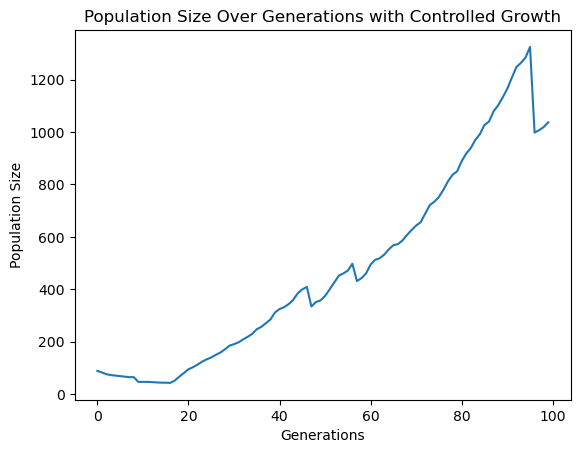

In [23]:
import random
import matplotlib.pyplot as plt

# Define constants
INITIAL_RESOURCES = 1500  # Reduced initial resources available
RESOURCE_REGENERATION = 100  # Reduced resources regenerated each year
CARRYING_CAPACITY = 400  # Maximum population the environment can support

# Environmental factors
SEASONAL_EFFECT = 0.15  # Adjusted seasonal variation in resource availability
CLIMATE_VARIABILITY = 0.05  # Kept the random changes in climate affecting resource regeneration
DISASTER_PROBABILITY = 0.03  # Moderate probability of a natural disaster occurring each year

# Define the Individual class with additional traits and aging factors
class Individual:
    def __init__(self, aggression, peacefulness, birth_rate, intelligence, social_cohesion, health, wealth, cooperation, curiosity, age=0, lifespan=80):
        self.aggression = aggression
        self.peacefulness = peacefulness
        self.birth_rate = birth_rate
        self.intelligence = intelligence
        self.social_cohesion = social_cohesion
        self.health = health
        self.wealth = wealth
        self.cooperation = cooperation
        self.curiosity = curiosity
        self.age = age
        self.lifespan = lifespan

    def age_one_year(self):
        self.age += 1
        if self.age > 40:
            self.health *= 0.95  # Health declines with age
        return self.age >= self.lifespan

    def is_fertile(self):
        # Fertility declines after age 30
        return 18 <= self.age <= 40

    def mutate(self):
        self.aggression = max(0, min(1, self.aggression + random.uniform(-0.03, 0.03)))
        self.peacefulness = max(0, min(1, self.peacefulness + random.uniform(-0.03, 0.03)))
        self.birth_rate = max(0, min(1, self.birth_rate + random.uniform(-0.03, 0.03)))
        self.intelligence = max(0, min(1, self.intelligence + random.uniform(-0.03, 0.03)))
        self.social_cohesion = max(0, min(1, self.social_cohesion + random.uniform(-0.03, 0.03)))
        self.health = max(0, min(1, self.health + random.uniform(-0.03, 0.03)))
        self.wealth = max(0, min(1, self.wealth + random.uniform(-0.03, 0.03)))
        self.cooperation = max(0, min(1, self.cooperation + random.uniform(-0.03, 0.03)))
        self.curiosity = max(0, min(1, self.curiosity + random.uniform(-0.03, 0.03)))

# Define the Population class with resource management and more complex dynamics
class Population:
    def __init__(self, size):
        self.individuals = [self.create_random_individual() for _ in range(size)]
        self.resources = INITIAL_RESOURCES
        self.season = "Spring"
    
    def create_random_individual(self):
        return Individual(
            aggression=random.uniform(0, 1),
            peacefulness=random.uniform(0, 1),
            birth_rate=random.uniform(0, 1),
            intelligence=random.uniform(0, 1),
            social_cohesion=random.uniform(0, 1),
            health=random.uniform(0, 1),
            wealth=random.uniform(0, 1),
            cooperation=random.uniform(0, 1),
            curiosity=random.uniform(0, 1)
        )
    
    def simulate_year(self):
        self.individuals = [ind for ind in self.individuals if not ind.age_one_year()]

        # Environmental effects: seasonal and climate variability
        self.update_season()
        seasonal_factor = self.get_seasonal_factor()
        climate_factor = 1 + random.uniform(-CLIMATE_VARIABILITY, CLIMATE_VARIABILITY)
        self.resources *= seasonal_factor * climate_factor

        # Natural disaster
        if random.random() < DISASTER_PROBABILITY:
            disaster_impact = random.uniform(0.1, 0.3)
            self.resources -= self.resources * disaster_impact
            self.individuals = [ind for ind in self.individuals if random.random() > disaster_impact]

        # Resource allocation and consumption
        total_resource_demand = sum(ind.health * 1.5 for ind in self.individuals)  # Increased resource demand
        if total_resource_demand > self.resources:
            survival_chance = self.resources / total_resource_demand
            self.individuals = [ind for ind in self.individuals if random.random() < survival_chance]
        
        # Social dynamics: Family units and social cohesion
        survivors = []
        for ind in self.individuals:
            murder_risk = ind.aggression - ind.peacefulness
            social_protection = ind.social_cohesion * 0.2
            if random.random() > (murder_risk - social_protection):
                survivors.append(ind)
        
        self.individuals = survivors
        
        # Birth events influenced by fertility, birth rate, resource availability, and social structure
        new_births = []
        for ind in self.individuals:
            if ind.is_fertile():
                birth_probability = ind.birth_rate * ind.health * (1 + ind.wealth) * (self.resources / (CARRYING_CAPACITY * 2))  # More challenging birth conditions
                if random.random() < birth_probability:
                    child = self.create_random_individual()
                    child.health = (ind.health + random.uniform(-0.05, 0.05)) / 2
                    child.intelligence = (ind.intelligence + random.uniform(-0.05, 0.05)) / 2
                    new_births.append(child)
        
        self.individuals.extend(new_births)
        
        # Mutations
        for ind in self.individuals:
            ind.mutate()

        # Resource regeneration based on season and climate factors
        self.resources = min(INITIAL_RESOURCES, self.resources + RESOURCE_REGENERATION * seasonal_factor * climate_factor)

    def update_season(self):
        if self.season == "Spring":
            self.season = "Summer"
        elif self.season == "Summer":
            self.season = "Autumn"
        elif self.season == "Autumn":
            self.season = "Winter"
        elif self.season == "Winter":
            self.season = "Spring"
    
    def get_seasonal_factor(self):
        if self.season == "Spring":
            return 1.1
        elif self.season == "Summer":
            return 1.0
        elif self.season == "Autumn":
            return 0.85
        elif self.season == "Winter":
            return 0.7

    def simulate_generations(self, generations):
        population_sizes = []
        for _ in range(generations):
            self.simulate_year()
            population_sizes.append(len(self.individuals))
        
        return population_sizes

# Run the modified simulation
population = Population(100)
population_sizes = population.simulate_generations(100)

# Plot the population size over generations
plt.plot(population_sizes)
plt.title("Population Size Over Generations with Controlled Growth")
plt.xlabel("Generations")
plt.ylabel("Population Size")
plt.show()


## Population Simulator With Added Feature of Technology

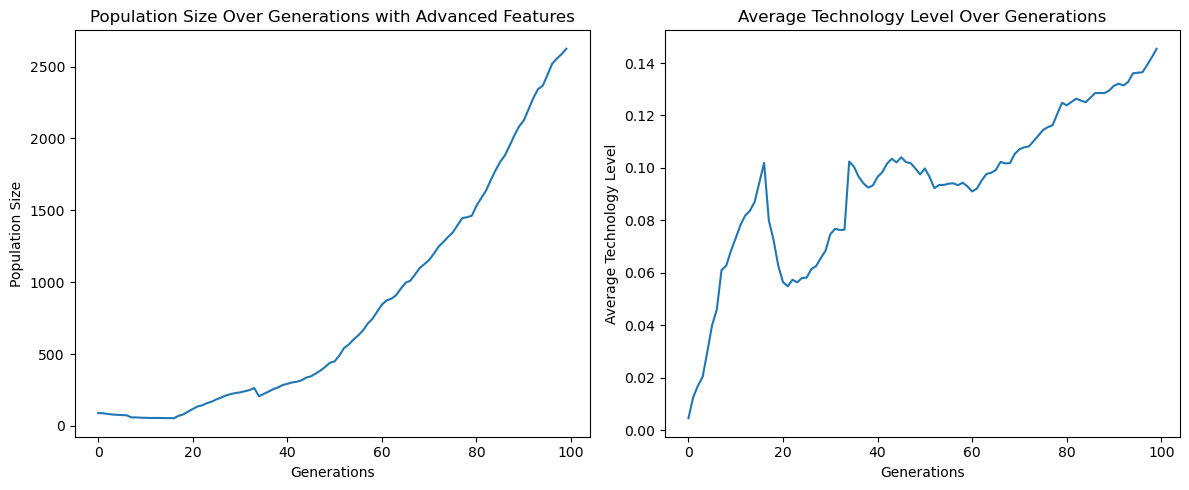

In [24]:
import random
import matplotlib.pyplot as plt

# Define constants
INITIAL_FOOD = 1000
INITIAL_WATER = 1000
INITIAL_SHELTER = 1000

FOOD_REGENERATION = 100
WATER_REGENERATION = 100
SHELTER_REGENERATION = 50

CARRYING_CAPACITY = 400

# Environmental factors
SEASONAL_EFFECT = 0.15
CLIMATE_VARIABILITY = 0.05
DISASTER_PROBABILITY = 0.03

# Define the Individual class with additional traits, aging, and technology
class Individual:
    def __init__(self, aggression, peacefulness, birth_rate, intelligence, social_cohesion, health, wealth, cooperation, curiosity, age=0, lifespan=80):
        self.aggression = aggression
        self.peacefulness = peacefulness
        self.birth_rate = birth_rate
        self.intelligence = intelligence
        self.social_cohesion = social_cohesion
        self.health = health
        self.wealth = wealth
        self.cooperation = cooperation
        self.curiosity = curiosity
        self.age = age
        self.lifespan = lifespan
        self.technology_level = 0  # New trait to track technology development

    def age_one_year(self):
        self.age += 1
        if self.age > 40:
            self.health *= 0.95  # Health declines with age
        return self.age >= self.lifespan

    def is_fertile(self):
        return 18 <= self.age <= 40

    def mutate(self):
        self.aggression = max(0, min(1, self.aggression + random.uniform(-0.03, 0.03)))
        self.peacefulness = max(0, min(1, self.peacefulness + random.uniform(-0.03, 0.03)))
        self.birth_rate = max(0, min(1, self.birth_rate + random.uniform(-0.03, 0.03)))
        self.intelligence = max(0, min(1, self.intelligence + random.uniform(-0.03, 0.03)))
        self.social_cohesion = max(0, min(1, self.social_cohesion + random.uniform(-0.03, 0.03)))
        self.health = max(0, min(1, self.health + random.uniform(-0.03, 0.03)))
        self.wealth = max(0, min(1, self.wealth + random.uniform(-0.03, 0.03)))
        self.cooperation = max(0, min(1, self.cooperation + random.uniform(-0.03, 0.03)))
        self.curiosity = max(0, min(1, self.curiosity + random.uniform(-0.03, 0.03)))
        self.technology_level = max(0, min(10, self.technology_level + random.uniform(-0.01, 0.02)))

# Define the Population class with resource management, technology, and culture
class Population:
    def __init__(self, size):
        self.individuals = [self.create_random_individual() for _ in range(size)]
        self.food = INITIAL_FOOD
        self.water = INITIAL_WATER
        self.shelter = INITIAL_SHELTER
        self.season = "Spring"
        self.technology_progress = 0  # Track overall technological progress
    
    def create_random_individual(self):
        return Individual(
            aggression=random.uniform(0, 1),
            peacefulness=random.uniform(0, 1),
            birth_rate=random.uniform(0, 1),
            intelligence=random.uniform(0, 1),
            social_cohesion=random.uniform(0, 1),
            health=random.uniform(0, 1),
            wealth=random.uniform(0, 1),
            cooperation=random.uniform(0, 1),
            curiosity=random.uniform(0, 1)
        )
    
    def simulate_year(self):
        self.individuals = [ind for ind in self.individuals if not ind.age_one_year()]

        # Environmental effects: seasonal and climate variability
        self.update_season()
        seasonal_factor = self.get_seasonal_factor()
        climate_factor = 1 + random.uniform(-CLIMATE_VARIABILITY, CLIMATE_VARIABILITY)
        self.food *= seasonal_factor * climate_factor
        self.water *= seasonal_factor * climate_factor
        self.shelter *= seasonal_factor * climate_factor

        # Natural disaster
        if random.random() < DISASTER_PROBABILITY:
            disaster_impact = random.uniform(0.1, 0.3)
            self.food -= self.food * disaster_impact
            self.water -= self.water * disaster_impact
            self.shelter -= self.shelter * disaster_impact
            self.individuals = [ind for ind in self.individuals if random.random() > disaster_impact]

        # Resource allocation and consumption
        total_resource_demand = sum((ind.health * 1.5 + ind.technology_level * 0.1) for ind in self.individuals)  # Increased resource demand with technology
        total_food_demand = total_resource_demand * 0.4
        total_water_demand = total_resource_demand * 0.4
        total_shelter_demand = total_resource_demand * 0.2

        # Check resource limits
        if total_food_demand > self.food or total_water_demand > self.water or total_shelter_demand > self.shelter:
            survival_chance = min(self.food / total_food_demand, self.water / total_water_demand, self.shelter / total_shelter_demand)
            self.individuals = [ind for ind in self.individuals if random.random() < survival_chance]
        
        # Social dynamics: Family units, social cohesion, and cultural spread
        survivors = []
        for ind in self.individuals:
            murder_risk = ind.aggression - ind.peacefulness
            social_protection = ind.social_cohesion * 0.2
            if random.random() > (murder_risk - social_protection):
                survivors.append(ind)
        
        self.individuals = survivors
        
        # Technology development and cultural traits spread
        for ind in self.individuals:
            if random.random() < ind.intelligence * 0.05:  # Probability of innovation
                ind.technology_level += 0.1  # Increment technology level
            if random.random() < ind.cooperation * 0.1:  # Probability of knowledge sharing
                self.technology_progress += 0.1
        
        # Birth events influenced by fertility, birth rate, resource availability, and technology
        new_births = []
        for ind in self.individuals:
            if ind.is_fertile():
                birth_probability = ind.birth_rate * ind.health * (1 + ind.wealth) * (self.food / (CARRYING_CAPACITY * 2)) * (1 + ind.technology_level * 0.05)
                if random.random() < birth_probability:
                    child = self.create_random_individual()
                    child.health = (ind.health + random.uniform(-0.05, 0.05)) / 2
                    child.intelligence = (ind.intelligence + random.uniform(-0.05, 0.05)) / 2
                    new_births.append(child)
        
        self.individuals.extend(new_births)
        
        # Mutations
        for ind in self.individuals:
            ind.mutate()

        # Resource regeneration based on season and climate factors
        self.food = min(INITIAL_FOOD, self.food + FOOD_REGENERATION * seasonal_factor * climate_factor)
        self.water = min(INITIAL_WATER, self.water + WATER_REGENERATION * seasonal_factor * climate_factor)
        self.shelter = min(INITIAL_SHELTER, self.shelter + SHELTER_REGENERATION * seasonal_factor * climate_factor)

    def update_season(self):
        if self.season == "Spring":
            self.season = "Summer"
        elif self.season == "Summer":
            self.season = "Autumn"
        elif self.season == "Autumn":
            self.season = "Winter"
        elif self.season == "Winter":
            self.season = "Spring"
    
    def get_seasonal_factor(self):
        if self.season == "Spring":
            return 1.1
        elif self.season == "Summer":
            return 1.0
        elif self.season == "Autumn":
            return 0.85
        elif self.season == "Winter":
            return 0.7

    def simulate_generations(self, generations):
        population_sizes = []
        technology_levels = []
        for _ in range(generations):
            self.simulate_year()
            population_sizes.append(len(self.individuals))
            technology_levels.append(self.technology_progress / len(self.individuals) if len(self.individuals) > 0 else 0)
        
        return population_sizes, technology_levels

# Run the advanced simulation
population = Population(100)
population_sizes, technology_levels = population.simulate_generations(100)

# Plot the population size over generations
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(population_sizes)
plt.title("Population Size Over Generations with Advanced Features")
plt.xlabel("Generations")
plt.ylabel("Population Size")

# Plot the average technology level over generations
plt.subplot(1, 2, 2)
plt.plot(technology_levels)
plt.title("Average Technology Level Over Generations")
plt.xlabel("Generations")
plt.ylabel("Average Technology Level")

plt.tight_layout()
plt.show()


 ## Population Simulator With Even More Features Such as Environment Adaptation, Territory and Territorial Expansion, and Leadership

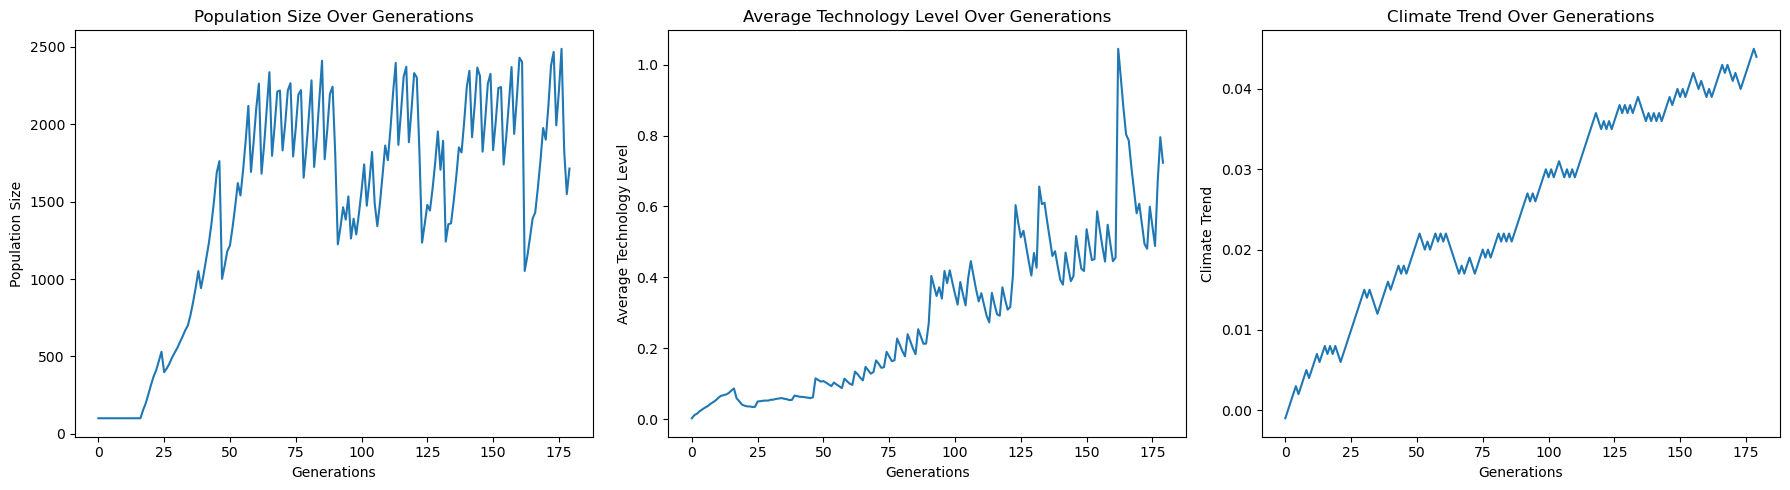

In [27]:
import random
import matplotlib.pyplot as plt

# Define constants
INITIAL_FOOD = 1000
INITIAL_WATER = 1000
INITIAL_SHELTER = 1000

FOOD_REGENERATION = 100
WATER_REGENERATION = 100
SHELTER_REGENERATION = 50

CARRYING_CAPACITY = 400

# Environmental factors
SEASONAL_EFFECT = 0.15
CLIMATE_VARIABILITY = 0.05
DISASTER_PROBABILITY = 0.03
LONG_TERM_CLIMATE_CHANGE = 0.001  # Gradual climate change effect

# Define the Individual class with additional traits, aging, technology, and adaptation
class Individual:
    def __init__(self, aggression, peacefulness, birth_rate, intelligence, social_cohesion, health, wealth, cooperation, curiosity, age=0, lifespan=80):
        self.aggression = aggression
        self.peacefulness = peacefulness
        self.birth_rate = birth_rate
        self.intelligence = intelligence
        self.social_cohesion = social_cohesion
        self.health = health
        self.wealth = wealth
        self.cooperation = cooperation
        self.curiosity = curiosity
        self.age = age
        self.lifespan = lifespan
        self.technology_level = 0
        self.environmental_adaptation = random.uniform(0, 1)  # New trait for environmental adaptation
        self.group = None  # New attribute to track group membership

    def age_one_year(self):
        self.age += 1
        if self.age > 40:
            self.health *= 0.95  # Health declines with age
        return self.age >= self.lifespan

    def is_fertile(self):
        return 18 <= self.age <= 40

    def mutate(self):
        self.aggression = max(0, min(1, self.aggression + random.uniform(-0.03, 0.03)))
        self.peacefulness = max(0, min(1, self.peacefulness + random.uniform(-0.03, 0.03)))
        self.birth_rate = max(0, min(1, self.birth_rate + random.uniform(-0.03, 0.03)))
        self.intelligence = max(0, min(1, self.intelligence + random.uniform(-0.03, 0.03)))
        self.social_cohesion = max(0, min(1, self.social_cohesion + random.uniform(-0.03, 0.03)))
        self.health = max(0, min(1, self.health + random.uniform(-0.03, 0.03)))
        self.wealth = max(0, min(1, self.wealth + random.uniform(-0.03, 0.03)))
        self.cooperation = max(0, min(1, self.cooperation + random.uniform(-0.03, 0.03)))
        self.curiosity = max(0, min(1, self.curiosity + random.uniform(-0.03, 0.03)))
        self.technology_level = max(0, min(10, self.technology_level + random.uniform(-0.01, 0.02)))
        self.environmental_adaptation = max(0, min(1, self.environmental_adaptation + random.uniform(-0.02, 0.02)))  # Mutation in adaptation

# Define the Group class to manage groups of individuals
class Group:
    def __init__(self, leader):
        self.leader = leader
        self.members = [leader]
        self.resources = {"food": 0, "water": 0, "shelter": 0}
        self.territory = random.uniform(0, 1)  # Territory richness

    def add_member(self, individual):
        individual.group = self
        self.members.append(individual)

    def manage_resources(self):
        # Allocate resources among members
        for resource in self.resources:
            if self.resources[resource] > 0:
                allocation = self.resources[resource] / len(self.members)
                for member in self.members:
                    if resource == "food":
                        member.health += allocation * 0.1
                    elif resource == "water":
                        member.health += allocation * 0.1
                    elif resource == "shelter":
                        member.health += allocation * 0.05

    def compete_for_resources(self, other_group):
        # Simple competition logic
        if self.territory + random.uniform(-0.1, 0.1) > other_group.territory:
            self.resources["food"] += other_group.resources["food"] * 0.5
            other_group.resources["food"] *= 0.5

# Define the Population class with groups, migration, and advanced dynamics
class Population:
    def __init__(self, size):
        self.individuals = [self.create_random_individual() for _ in range(size)]
        self.groups = []
        self.food = INITIAL_FOOD
        self.water = INITIAL_WATER
        self.shelter = INITIAL_SHELTER
        self.season = "Spring"
        self.technology_progress = 0
        self.climate_trend = 0  # Track long-term climate trends
    
    def create_random_individual(self):
        return Individual(
            aggression=random.uniform(0, 1),
            peacefulness=random.uniform(0, 1),
            birth_rate=random.uniform(0, 1),
            intelligence=random.uniform(0, 1),
            social_cohesion=random.uniform(0, 1),
            health=random.uniform(0, 1),
            wealth=random.uniform(0, 1),
            cooperation=random.uniform(0, 1),
            curiosity=random.uniform(0, 1)
        )
    
    def form_group(self, leader):
        group = Group(leader)
        self.groups.append(group)
        return group
    
    def simulate_year(self):
        self.individuals = [ind for ind in self.individuals if not ind.age_one_year()]

        # Environmental effects: seasonal, climate variability, and long-term trends
        self.update_season()
        seasonal_factor = self.get_seasonal_factor()
        climate_factor = 1 + random.uniform(-CLIMATE_VARIABILITY, CLIMATE_VARIABILITY) + self.climate_trend
        self.food *= seasonal_factor * climate_factor
        self.water *= seasonal_factor * climate_factor
        self.shelter *= seasonal_factor * climate_factor

        # Long-term climate change
        self.climate_trend += LONG_TERM_CLIMATE_CHANGE * random.choice([-1, 1])

        # Natural disaster
        if random.random() < DISASTER_PROBABILITY:
            disaster_impact = random.uniform(0.2, 0.5)
            self.food -= self.food * disaster_impact
            self.water -= self.water * disaster_impact
            self.shelter -= self.shelter * disaster_impact
            self.individuals = [ind for ind in self.individuals if random.random() > disaster_impact]

        # Resource allocation and consumption
        total_resource_demand = sum((ind.health * 1.5 + ind.technology_level * 0.1) for ind in self.individuals)
        total_food_demand = total_resource_demand * 0.4
        total_water_demand = total_resource_demand * 0.4
        total_shelter_demand = total_resource_demand * 0.2

        # Check resource limits
        if total_food_demand > self.food or total_water_demand > self.water or total_shelter_demand > self.shelter:
            survival_chance = min(self.food / total_food_demand, self.water / total_water_demand, self.shelter / total_shelter_demand)
            self.individuals = [ind for ind in self.individuals if random.random() < survival_chance]
        
        # Social dynamics: Group formation, migration, and competition
        for ind in self.individuals:
            if ind.group is None:
                leader = ind if ind.intelligence > random.uniform(0, 1) else random.choice(self.individuals)
                group = self.form_group(leader)
                group.add_member(ind)
            elif random.random() < ind.curiosity * 0.05:
                # Migration to a new group
                new_group = self.form_group(ind)
                new_group.add_member(ind)
        
        # Group management
        for group in self.groups:
            group.manage_resources()

            if random.random() < 0.1:  # Random chance of competition
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.compete_for_resources(other_group)

        # Technology development and adaptation
        for ind in self.individuals:
            if random.random() < ind.intelligence * 0.05:
                ind.technology_level += 0.1
            if random.random() < ind.cooperation * 0.1:
                self.technology_progress += 0.1

            # Environmental adaptation
            if self.climate_trend > 0:
                ind.health *= (1 + ind.environmental_adaptation * 0.1)
            elif self.climate_trend < 0:
                ind.health *= (1 - ind.environmental_adaptation * 0.1)
        
        # Birth events influenced by technology and adaptation
        new_births = []
        for ind in self.individuals:
            if ind.is_fertile():
                birth_probability = ind.birth_rate * ind.health * (1 + ind.wealth) * (self.food / (CARRYING_CAPACITY * 2)) * (1 + ind.technology_level * 0.05)
                if random.random() < birth_probability:
                    child = self.create_random_individual()
                    child.health = (ind.health + random.uniform(-0.05, 0.05)) / 2
                    child.intelligence = (ind.intelligence + random.uniform(-0.05, 0.05)) / 2
                    new_births.append(child)
        
        self.individuals.extend(new_births)
        
        # Mutations
        for ind in self.individuals:
            ind.mutate()

        # Resource regeneration
        self.food = min(INITIAL_FOOD, self.food + FOOD_REGENERATION * seasonal_factor * climate_factor)
        self.water = min(INITIAL_WATER, self.water + WATER_REGENERATION * seasonal_factor * climate_factor)
        self.shelter = min(INITIAL_SHELTER, self.shelter + SHELTER_REGENERATION * seasonal_factor * climate_factor)

    def update_season(self):
        if self.season == "Spring":
            self.season = "Summer"
        elif self.season == "Summer":
            self.season = "Autumn"
        elif self.season == "Autumn":
            self.season = "Winter"
        elif self.season == "Winter":
            self.season = "Spring"
    
    def get_seasonal_factor(self):
        if self.season == "Spring":
            return 1.1
        elif self.season == "Summer":
            return 1.0
        elif self.season == "Autumn":
            return 0.85
        elif self.season == "Winter":
            return 0.7

    def simulate_generations(self, generations):
        population_sizes = []
        technology_levels = []
        climate_trends = []
        for _ in range(generations):
            self.simulate_year()
            population_sizes.append(len(self.individuals))
            technology_levels.append(self.technology_progress / len(self.individuals) if len(self.individuals) > 0 else 0)
            climate_trends.append(self.climate_trend)
        
        return population_sizes, technology_levels, climate_trends

# Run the advanced simulation
population = Population(100)
population_sizes, technology_levels, climate_trends = population.simulate_generations(180)

# Plot the results
plt.figure(figsize=(18, 5))

# Plot the population size over generations
plt.subplot(1, 3, 1)
plt.plot(population_sizes)
plt.title("Population Size Over Generations")
plt.xlabel("Generations")
plt.ylabel("Population Size")

# Plot the average technology level over generations
plt.subplot(1, 3, 2)
plt.plot(technology_levels)
plt.title("Average Technology Level Over Generations")
plt.xlabel("Generations")
plt.ylabel("Average Technology Level")

# Plot the climate trend over generations
plt.subplot(1, 3, 3)
plt.plot(climate_trends)
plt.title("Climate Trend Over Generations")
plt.xlabel("Generations")
plt.ylabel("Climate Trend")

plt.tight_layout()
plt.show()


## Even More Complex Population Simulator with All Social Constructs Such as Religion, Tradition. Concepts of Trade, Risk Taking, Mental Health, EQ and IQ, Leadership Style, Immunity, War, Laws, Governance, Language, etc

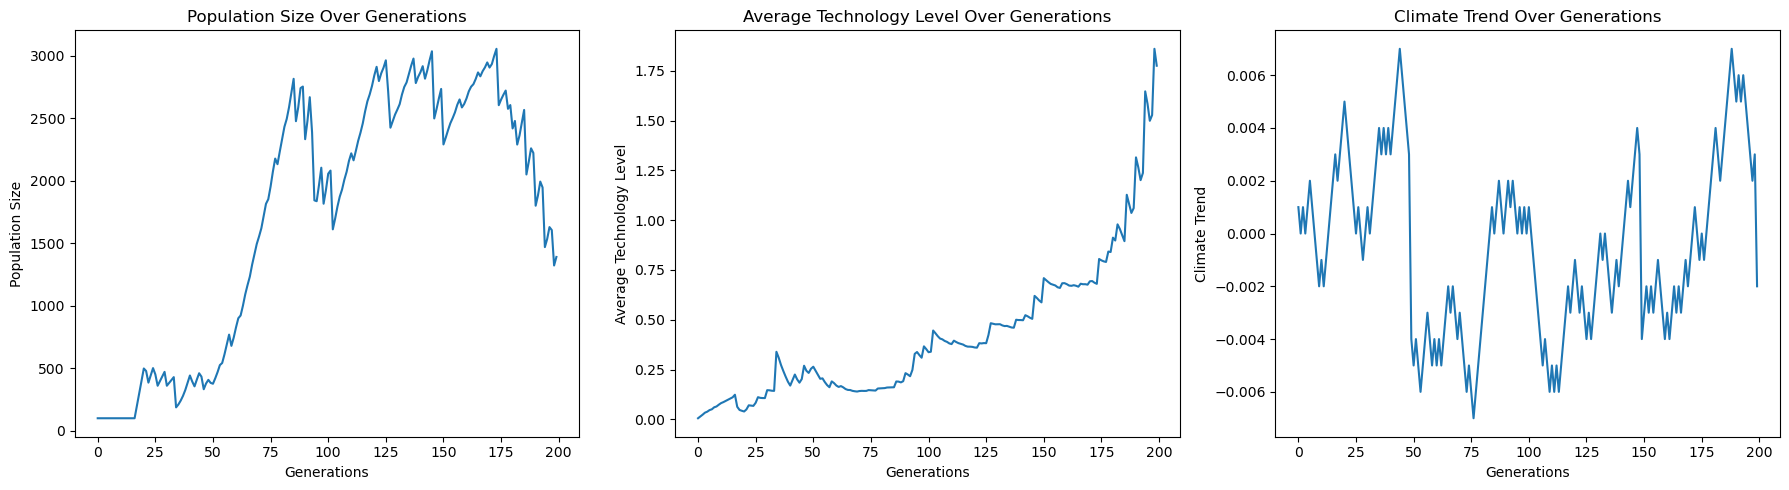

In [38]:
import random
import matplotlib.pyplot as plt

# Constants for resources and environment
INITIAL_FOOD = 2000  # Increased initial resources available
INITIAL_WATER = 2000
INITIAL_SHELTER = 1500
FOOD_REGENERATION = 200  # Increased resources regenerated each year
WATER_REGENERATION = 200
SHELTER_REGENERATION = 100
MEDICINE_REGENERATION = 50
TOOLS_REGENERATION = 50

CARRYING_CAPACITY = 400

# Environmental factors
SEASONAL_EFFECT = 0.15
CLIMATE_VARIABILITY = 0.05
DISASTER_PROBABILITY = 0.02  # Reduced probability of a catastrophic event
LONG_TERM_CLIMATE_CHANGE = 0.001  # Gradual climate change effect
CATASTROPHIC_EVENT_PROBABILITY = 0.005  # Reduced probability of catastrophic events
DISEASE_SPREAD_PROBABILITY = 0.05  # Reduced probability of disease outbreak
CLIMATE_CYCLE_LENGTH = 50  # Length of climate cycles (e.g., ice ages)

# Define the Individual class with full complexity
class Individual:
    def __init__(self, aggression, peacefulness, birth_rate, intelligence, social_cohesion, health, wealth, cooperation, curiosity, technology_level, environmental_adaptation, risk_taking, tradition, religion, leadership_style, emotional_intelligence, mental_health, age=0, lifespan=80):
        self.aggression = aggression
        self.peacefulness = peacefulness
        self.birth_rate = birth_rate
        self.intelligence = intelligence
        self.social_cohesion = social_cohesion
        self.health = health
        self.wealth = wealth
        self.cooperation = cooperation
        self.curiosity = curiosity
        self.technology_level = technology_level
        self.environmental_adaptation = environmental_adaptation
        self.risk_taking = risk_taking
        self.tradition = tradition
        self.religion = religion
        self.leadership_style = leadership_style
        self.emotional_intelligence = emotional_intelligence
        self.mental_health = mental_health
        self.age = age
        self.lifespan = lifespan
        self.group = None  # Track group membership
        self.language = random.uniform(0, 1)  # Language diversity
        self.immune_system = random.uniform(0.5, 1)  # Increased base immunity to diseases
        self.symbiotic_relationship = False  # Whether the individual has a symbiotic relationship with another species

    def age_one_year(self):
        self.age += 1
        if self.age > 40:
            self.health *= 0.98  # Slower health decline with age
        return self.age >= self.lifespan

    def is_fertile(self):
        return 18 <= self.age <= 40

    def mutate(self):
        # Complex mutations with potential for adaptation and technology improvement
        self.aggression = max(0, min(1, self.aggression + random.uniform(-0.03, 0.03)))
        self.peacefulness = max(0, min(1, self.peacefulness + random.uniform(-0.03, 0.03)))
        self.birth_rate = max(0, min(1, self.birth_rate + random.uniform(-0.02, 0.02)))  # Reduced mutation impact on birth rate
        self.intelligence = max(0, min(1, self.intelligence + random.uniform(-0.03, 0.03)))
        self.social_cohesion = max(0, min(1, self.social_cohesion + random.uniform(-0.03, 0.03)))
        self.health = max(0, min(1, self.health + random.uniform(-0.02, 0.02)))  # Reduced mutation impact on health
        self.wealth = max(0, min(1, self.wealth + random.uniform(-0.03, 0.03)))
        self.cooperation = max(0, min(1, self.cooperation + random.uniform(-0.03, 0.03)))
        self.curiosity = max(0, min(1, self.curiosity + random.uniform(-0.03, 0.03)))
        self.technology_level = max(0, min(10, self.technology_level + random.uniform(-0.01, 0.02)))
        self.environmental_adaptation = max(0, min(1, self.environmental_adaptation + random.uniform(-0.02, 0.02)))
        self.risk_taking = max(0, min(1, self.risk_taking + random.uniform(-0.03, 0.03)))
        self.tradition = max(0, min(1, self.tradition + random.uniform(-0.03, 0.03)))
        self.religion = max(0, min(1, self.religion + random.uniform(-0.03, 0.03)))
        self.emotional_intelligence = max(0, min(1, self.emotional_intelligence + random.uniform(-0.03, 0.03)))
        self.mental_health = max(0, min(1, self.mental_health + random.uniform(-0.02, 0.02)))  # Reduced mutation impact on mental health
        self.immune_system = max(0.5, min(1, self.immune_system + random.uniform(-0.01, 0.01)))  # Reduced mutation impact on immunity

# Define the Group class to manage groups of individuals
class Group:
    def __init__(self, leader):
        self.leader = leader
        self.members = [leader]
        self.resources = {"food": 0, "water": 0, "shelter": 0, "medicine": 0, "tools": 0}
        self.territory = random.uniform(0.5, 1)  # Increase base territory richness
        self.cultural_practices = random.uniform(0.5, 1)  # More shared cultural practices
        self.language = leader.language  # Shared language within the group
        self.trade_networks = 0  # Track trade relationships with other groups
        self.governance_structure = leader.leadership_style  # Initial governance style
        self.laws = {}  # Simple legal system

    def add_member(self, individual):
        individual.group = self
        self.members.append(individual)

    def manage_resources(self):
        # Allocate resources among members
        for resource in self.resources:
            if self.resources[resource] > 0:
                allocation = self.resources[resource] / len(self.members)
                for member in self.members:
                    if resource == "food":
                        member.health += allocation * 0.1
                    elif resource == "water":
                        member.health += allocation * 0.1
                    elif resource == "shelter":
                        member.health += allocation * 0.05
                    elif resource == "medicine":
                        member.health += allocation * 0.2
                    elif resource == "tools":
                        member.technology_level += allocation * 0.1

    def trade_with_group(self, other_group):
        # Trade resources between groups based on their trade networks and resources
        if self.trade_networks > 0 and other_group.trade_networks > 0:
            trade_amount = min(self.resources["tools"], other_group.resources["medicine"])
            self.resources["tools"] -= trade_amount
            other_group.resources["medicine"] += trade_amount

    def compete_for_resources(self, other_group):
        # Complex competition logic including technology and leadership influence
        if (self.territory + self.leader.intelligence + self.leader.technology_level + random.uniform(-0.1, 0.1)) > \
           (other_group.territory + other_group.leader.intelligence + other_group.leader.technology_level):
            self.resources["food"] += other_group.resources["food"] * 0.5
            other_group.resources["food"] *= 0.5
            self.resources["water"] += other_group.resources["water"] * 0.5
            other_group.resources["water"] *= 0.5
            self.resources["shelter"] += other_group.resources["shelter"] * 0.5
            other_group.resources["shelter"] *= 0.5

    def enforce_laws(self):
        # Enforce laws to maintain order within the group
        if self.governance_structure in ['autocratic', 'democratic']:
            for law, enforcement in self.laws.items():
                for member in self.members:
                    if random.random() > enforcement:
                        member.mental_health -= 0.05  # Punish lawbreakers with less severity

# Define the Population class with full complexity
class Population:
    def __init__(self, size):
        self.individuals = [self.create_random_individual() for _ in range(size)]
        self.groups = []
        self.food = INITIAL_FOOD
        self.water = INITIAL_WATER
        self.shelter = INITIAL_SHELTER
        self.medicine = MEDICINE_REGENERATION
        self.tools = TOOLS_REGENERATION
        self.season = "Spring"
        self.technology_progress = 0
        self.climate_trend = 0  # Track long-term climate trends
        self.climate_cycle = 0  # Track the climate cycle
    
    def create_random_individual(self):
        return Individual(
            aggression=random.uniform(0, 1),
            peacefulness=random.uniform(0, 1),
            birth_rate=random.uniform(0.5, 1),  # Increased base birth rate
            intelligence=random.uniform(0.5, 1),  # Increased base intelligence
            social_cohesion=random.uniform(0.5, 1),  # Increased base social cohesion
            health=random.uniform(0.5, 1),  # Increased base health
            wealth=random.uniform(0, 1),
            cooperation=random.uniform(0.5, 1),  # Increased base cooperation
            curiosity=random.uniform(0, 1),
            technology_level=random.uniform(0.5, 1),  # Increased base technology level
            environmental_adaptation=random.uniform(0.5, 1),  # Increased base environmental adaptation
            risk_taking=random.uniform(0, 1),
            tradition=random.uniform(0, 1),
            religion=random.uniform(0, 1),
            leadership_style=random.choice(['autocratic', 'democratic', 'tribal']),
            emotional_intelligence=random.uniform(0.5, 1),  # Increased base emotional intelligence
            mental_health=random.uniform(0.5, 1)  # Increased base mental health
        )
    
    def form_group(self, leader):
        group = Group(leader)
        self.groups.append(group)
        return group
    
    def simulate_year(self):
        self.individuals = [ind for ind in self.individuals if not ind.age_one_year()]

        # Environmental effects: seasonal, climate variability, and long-term trends
        self.update_season()
        seasonal_factor = self.get_seasonal_factor()
        climate_factor = 1 + random.uniform(-CLIMATE_VARIABILITY, CLIMATE_VARIABILITY) + self.climate_trend
        self.food *= seasonal_factor * climate_factor
        self.water *= seasonal_factor * climate_factor
        self.shelter *= seasonal_factor * climate_factor
        self.medicine *= seasonal_factor * climate_factor
        self.tools *= seasonal_factor * climate_factor

        # Long-term climate change
        self.climate_trend += LONG_TERM_CLIMATE_CHANGE * random.choice([-1, 1])

        # Climate cycles (e.g., ice ages)
        self.climate_cycle += 1
        if self.climate_cycle >= CLIMATE_CYCLE_LENGTH:
            self.climate_cycle = 0
            self.climate_trend *= -1  # Reverse the climate trend

        # Catastrophic events
        if random.random() < CATASTROPHIC_EVENT_PROBABILITY:
            catastrophic_impact = random.uniform(0.3, 0.7)  # Reduced impact of catastrophic events
            self.food -= self.food * catastrophic_impact
            self.water -= self.water * catastrophic_impact
            self.shelter -= self.shelter * catastrophic_impact
            self.medicine -= self.medicine * catastrophic_impact
            self.tools -= self.tools * catastrophic_impact
            self.individuals = [ind for ind in self.individuals if random.random() > catastrophic_impact]

        # Disease outbreak
        if random.random() < DISEASE_SPREAD_PROBABILITY:
            disease_severity = random.uniform(0.1, 0.3)  # Reduced severity of diseases
            self.individuals = [ind for ind in self.individuals if random.random() > disease_severity * (1 - ind.immune_system)]

        # Resource allocation and consumption
        total_resource_demand = sum((ind.health * 1.5 + ind.technology_level * 0.1) for ind in self.individuals)
        total_food_demand = total_resource_demand * 0.3
        total_water_demand = total_resource_demand * 0.3
        total_shelter_demand = total_resource_demand * 0.2
        total_medicine_demand = total_resource_demand * 0.1
        total_tools_demand = total_resource_demand * 0.1

        # Check resource limits
        if (total_food_demand > self.food or total_water_demand > self.water or total_shelter_demand > self.shelter or 
            total_medicine_demand > self.medicine or total_tools_demand > self.tools):
            survival_chance = min(self.food / total_food_demand, self.water / total_water_demand, self.shelter / total_shelter_demand,
                                  self.medicine / total_medicine_demand, self.tools / total_tools_demand)
            self.individuals = [ind for ind in self.individuals if random.random() < survival_chance]
        
        # Social dynamics: Group formation, migration, trade, competition, and governance
        for ind in self.individuals:
            if ind.group is None:
                leader = ind if ind.intelligence > random.uniform(0, 1) else random.choice(self.individuals)
                group = self.form_group(leader)
                group.add_member(ind)
            elif random.random() < ind.curiosity * 0.05:
                # Migration to a new group
                new_group = self.form_group(ind)
                new_group.add_member(ind)
        
        # Group management
        for group in self.groups:
            group.manage_resources()
            group.enforce_laws()

            if random.random() < 0.1:  # Random chance of competition
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.compete_for_resources(other_group)

            if random.random() < 0.05:  # Random chance of trade
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.trade_with_group(other_group)

        # Technology development and adaptation
        for ind in self.individuals:
            if random.random() < ind.intelligence * 0.05:
                ind.technology_level += 0.1
            if random.random() < ind.cooperation * 0.1:
                self.technology_progress += 0.1

            # Environmental adaptation
            if self.climate_trend > 0:
                ind.health *= (1 + ind.environmental_adaptation * 0.1)
            elif self.climate_trend < 0:
                ind.health *= (1 - ind.environmental_adaptation * 0.1)
        
        # Birth events influenced by technology, medicine, adaptation, and cultural traits
        new_births = []
        for ind in self.individuals:
            if ind.is_fertile():
                birth_probability = ind.birth_rate * ind.health * (1 + ind.wealth) * (self.food / (CARRYING_CAPACITY * 2)) * (1 + ind.technology_level * 0.05)
                if random.random() < birth_probability:
                    child = self.create_random_individual()
                    child.health = (ind.health + random.uniform(-0.05, 0.05)) / 2
                    child.intelligence = (ind.intelligence + random.uniform(-0.05, 0.05)) / 2
                    child.language = ind.language  # Inherit language
                    child.immune_system = (ind.immune_system + random.uniform(-0.05, 0.05)) / 2  # Inherit immune system
                    new_births.append(child)
        
        self.individuals.extend(new_births)
        
        # Mutations
        for ind in self.individuals:
            ind.mutate()

        # Resource regeneration
        self.food = min(INITIAL_FOOD, self.food + FOOD_REGENERATION * seasonal_factor * climate_factor)
        self.water = min(INITIAL_WATER, self.water + WATER_REGENERATION * seasonal_factor * climate_factor)
        self.shelter = min(INITIAL_SHELTER, self.shelter + SHELTER_REGENERATION * seasonal_factor * climate_factor)
        self.medicine = min(MEDICINE_REGENERATION, self.medicine + MEDICINE_REGENERATION * seasonal_factor * climate_factor)
        self.tools = min(TOOLS_REGENERATION, self.tools + TOOLS_REGENERATION * seasonal_factor * climate_factor)

    def update_season(self):
        if self.season == "Spring":
            self.season = "Summer"
        elif self.season == "Summer":
            self.season = "Autumn"
        elif self.season == "Autumn":
            self.season = "Winter"
        elif self.season == "Winter":
            self.season = "Spring"
    
    def get_seasonal_factor(self):
        if self.season == "Spring":
            return 1.1
        elif self.season == "Summer":
            return 1.0
        elif self.season == "Autumn":
            return 0.85
        elif self.season == "Winter":
            return 0.7

    def simulate_generations(self, generations):
        population_sizes = []
        technology_levels = []
        climate_trends = []
        for _ in range(generations):
            self.simulate_year()
            population_sizes.append(len(self.individuals))
            technology_levels.append(self.technology_progress / len(self.individuals) if len(self.individuals) > 0 else 0)
            climate_trends.append(self.climate_trend)
        
        return population_sizes, technology_levels, climate_trends

# Run the comprehensive simulation with adjustments to stabilize population
population = Population(100)
population_sizes, technology_levels, climate_trends = population.simulate_generations(200)

# Plot the results
plt.figure(figsize=(18, 5))

# Plot the population size over generations
plt.subplot(1, 3, 1)
plt.plot(population_sizes)
plt.title("Population Size Over Generations")
plt.xlabel("Generations")
plt.ylabel("Population Size")

# Plot the average technology level over generations
plt.subplot(1, 3, 2)
plt.plot(technology_levels)
plt.title("Average Technology Level Over Generations")
plt.xlabel("Generations")
plt.ylabel("Average Technology Level")

# Plot the climate trend over generations
plt.subplot(1, 3, 3)
plt.plot(climate_trends)
plt.title("Climate Trend Over Generations")
plt.xlabel("Generations")
plt.ylabel("Climate Trend")

plt.tight_layout()
plt.show()


## Population Simulator with Education Systems, Revolutions, Health Care System, Market, Industrialisation, Even Larger Disasters, Cognitive Enhancements and Problems, Inter-Species Relation

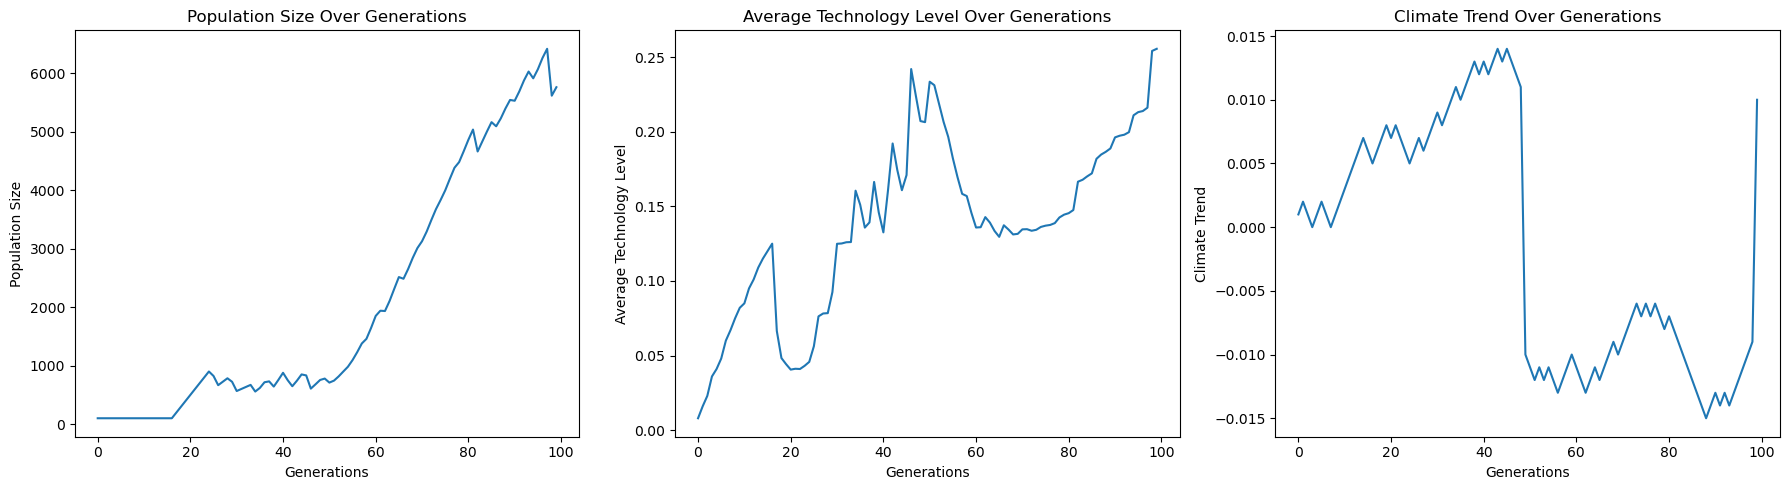

In [39]:
import random
import matplotlib.pyplot as plt

# Constants for resources and environment
INITIAL_FOOD = 2500  # Further increased initial resources
INITIAL_WATER = 2500
INITIAL_SHELTER = 2000
FOOD_REGENERATION = 250  # Further increased resource regeneration
WATER_REGENERATION = 250
SHELTER_REGENERATION = 150
MEDICINE_REGENERATION = 100
TOOLS_REGENERATION = 100

CARRYING_CAPACITY = 500  # Increased carrying capacity

# Environmental factors
SEASONAL_EFFECT = 0.15
CLIMATE_VARIABILITY = 0.05
DISASTER_PROBABILITY = 0.015  # Further reduced probability of a catastrophic event
LONG_TERM_CLIMATE_CHANGE = 0.001  # Gradual climate change effect
CATASTROPHIC_EVENT_PROBABILITY = 0.005  # Rare probability of catastrophic events
DISEASE_SPREAD_PROBABILITY = 0.05  # Reduced probability of disease outbreak
CLIMATE_CYCLE_LENGTH = 50  # Length of climate cycles (e.g., ice ages)

# Define the Individual class with full complexity
class Individual:
    def __init__(self, aggression, peacefulness, birth_rate, intelligence, social_cohesion, health, wealth, cooperation, curiosity, technology_level, environmental_adaptation, risk_taking, tradition, religion, leadership_style, emotional_intelligence, mental_health, age=0, lifespan=80):
        self.aggression = aggression
        self.peacefulness = peacefulness
        self.birth_rate = birth_rate
        self.intelligence = intelligence
        self.social_cohesion = social_cohesion
        self.health = health
        self.wealth = wealth
        self.cooperation = cooperation
        self.curiosity = curiosity
        self.technology_level = technology_level
        self.environmental_adaptation = environmental_adaptation
        self.risk_taking = risk_taking
        self.tradition = tradition
        self.religion = religion
        self.leadership_style = leadership_style
        self.emotional_intelligence = emotional_intelligence
        self.mental_health = mental_health
        self.age = age
        self.lifespan = lifespan
        self.group = None  # Track group membership
        self.language = random.uniform(0, 1)  # Language diversity
        self.immune_system = random.uniform(0.6, 1)  # Increased base immunity
        self.symbiotic_relationship = False  # Whether the individual has a symbiotic relationship with another species

    def age_one_year(self):
        self.age += 1
        if self.age > 40:
            self.health *= 0.98  # Slower health decline with age
        return self.age >= self.lifespan

    def is_fertile(self):
        return 18 <= self.age <= 40

    def mutate(self):
        # Complex mutations with potential for adaptation and technology improvement
        self.aggression = max(0, min(1, self.aggression + random.uniform(-0.03, 0.03)))
        self.peacefulness = max(0, min(1, self.peacefulness + random.uniform(-0.03, 0.03)))
        self.birth_rate = max(0, min(1, self.birth_rate + random.uniform(-0.02, 0.02)))  # Reduced mutation impact on birth rate
        self.intelligence = max(0, min(1, self.intelligence + random.uniform(-0.03, 0.03)))
        self.social_cohesion = max(0, min(1, self.social_cohesion + random.uniform(-0.03, 0.03)))
        self.health = max(0, min(1, self.health + random.uniform(-0.02, 0.02)))  # Reduced mutation impact on health
        self.wealth = max(0, min(1, self.wealth + random.uniform(-0.03, 0.03)))
        self.cooperation = max(0, min(1, self.cooperation + random.uniform(-0.03, 0.03)))
        self.curiosity = max(0, min(1, self.curiosity + random.uniform(-0.03, 0.03)))
        self.technology_level = max(0, min(10, self.technology_level + random.uniform(-0.01, 0.02)))
        self.environmental_adaptation = max(0, min(1, self.environmental_adaptation + random.uniform(-0.02, 0.02)))
        self.risk_taking = max(0, min(1, self.risk_taking + random.uniform(-0.03, 0.03)))
        self.tradition = max(0, min(1, self.tradition + random.uniform(-0.03, 0.03)))
        self.religion = max(0, min(1, self.religion + random.uniform(-0.03, 0.03)))
        self.emotional_intelligence = max(0, min(1, self.emotional_intelligence + random.uniform(-0.03, 0.03)))
        self.mental_health = max(0, min(1, self.mental_health + random.uniform(-0.02, 0.02)))  # Reduced mutation impact on mental health
        self.immune_system = max(0.6, min(1, self.immune_system + random.uniform(-0.01, 0.01)))  # Further increased base immunity

# Define the Group class to manage groups of individuals
class Group:
    def __init__(self, leader):
        self.leader = leader
        self.members = [leader]
        self.resources = {"food": 0, "water": 0, "shelter": 0, "medicine": 0, "tools": 0, "currency": 0}
        self.territory = random.uniform(0.5, 1)  # Increase base territory richness
        self.cultural_practices = random.uniform(0.5, 1)  # More shared cultural practices
        self.language = leader.language  # Shared language within the group
        self.trade_networks = 0  # Track trade relationships with other groups
        self.governance_structure = leader.leadership_style  # Initial governance style
        self.laws = {}  # Simple legal system
        self.education_level = leader.intelligence * 0.5  # Education system influenced by leader's intelligence

    def add_member(self, individual):
        individual.group = self
        self.members.append(individual)

    def manage_resources(self):
        # Allocate resources among members
        for resource in self.resources:
            if self.resources[resource] > 0:
                allocation = self.resources[resource] / len(self.members)
                for member in self.members:
                    if resource == "food":
                        member.health += allocation * 0.1
                    elif resource == "water":
                        member.health += allocation * 0.1
                    elif resource == "shelter":
                        member.health += allocation * 0.05
                    elif resource == "medicine":
                        member.health += allocation * 0.2
                    elif resource == "tools":
                        member.technology_level += allocation * 0.1
                    elif resource == "currency":
                        member.wealth += allocation * 0.1

    def trade_with_group(self, other_group):
        # Trade resources between groups based on their trade networks and resources
        if self.trade_networks > 0 and other_group.trade_networks > 0:
            trade_amount = min(self.resources["tools"], other_group.resources["medicine"])
            self.resources["tools"] -= trade_amount
            other_group.resources["medicine"] += trade_amount
            trade_amount = min(self.resources["currency"], other_group.resources["food"])
            self.resources["currency"] -= trade_amount
            other_group.resources["food"] += trade_amount

    def compete_for_resources(self, other_group):
        # Complex competition logic including technology and leadership influence
        if (self.territory + self.leader.intelligence + self.leader.technology_level + random.uniform(-0.1, 0.1)) > \
           (other_group.territory + other_group.leader.intelligence + other_group.leader.technology_level):
            self.resources["food"] += other_group.resources["food"] * 0.5
            other_group.resources["food"] *= 0.5
            self.resources["water"] += other_group.resources["water"] * 0.5
            other_group.resources["water"] *= 0.5
            self.resources["shelter"] += other_group.resources["shelter"] * 0.5
            other_group.resources["shelter"] *= 0.5

    def enforce_laws(self):
        # Enforce laws to maintain order within the group
        if self.governance_structure in ['autocratic', 'democratic']:
            for law, enforcement in self.laws.items():
                for member in self.members:
                    if random.random() > enforcement:
                        member.mental_health -= 0.05  # Punish lawbreakers with less severity

# Define the Population class with full complexity
class Population:
    def __init__(self, size):
        self.individuals = [self.create_random_individual() for _ in range(size)]
        self.groups = []
        self.food = INITIAL_FOOD
        self.water = INITIAL_WATER
        self.shelter = INITIAL_SHELTER
        self.medicine = MEDICINE_REGENERATION
        self.tools = TOOLS_REGENERATION
        self.currency = 1000  # Initial currency for economic systems
        self.season = "Spring"
        self.technology_progress = 0
        self.climate_trend = 0  # Track long-term climate trends
        self.climate_cycle = 0  # Track the climate cycle
    
    def create_random_individual(self):
        return Individual(
            aggression=random.uniform(0, 1),
            peacefulness=random.uniform(0, 1),
            birth_rate=random.uniform(0.5, 1),  # Increased base birth rate
            intelligence=random.uniform(0.5, 1),  # Increased base intelligence
            social_cohesion=random.uniform(0.5, 1),  # Increased base social cohesion
            health=random.uniform(0.5, 1),  # Increased base health
            wealth=random.uniform(0, 1),
            cooperation=random.uniform(0.5, 1),  # Increased base cooperation
            curiosity=random.uniform(0, 1),
            technology_level=random.uniform(0.5, 1),  # Increased base technology level
            environmental_adaptation=random.uniform(0.5, 1),  # Increased base environmental adaptation
            risk_taking=random.uniform(0, 1),
            tradition=random.uniform(0, 1),
            religion=random.uniform(0, 1),
            leadership_style=random.choice(['autocratic', 'democratic', 'tribal']),
            emotional_intelligence=random.uniform(0.5, 1),  # Increased base emotional intelligence
            mental_health=random.uniform(0.5, 1)  # Increased base mental health
        )
    
    def form_group(self, leader):
        group = Group(leader)
        self.groups.append(group)
        return group
    
    def simulate_year(self):
        self.individuals = [ind for ind in self.individuals if not ind.age_one_year()]

        # Environmental effects: seasonal, climate variability, and long-term trends
        self.update_season()
        seasonal_factor = self.get_seasonal_factor()
        climate_factor = 1 + random.uniform(-CLIMATE_VARIABILITY, CLIMATE_VARIABILITY) + self.climate_trend
        self.food *= seasonal_factor * climate_factor
        self.water *= seasonal_factor * climate_factor
        self.shelter *= seasonal_factor * climate_factor
        self.medicine *= seasonal_factor * climate_factor
        self.tools *= seasonal_factor * climate_factor
        self.currency *= seasonal_factor * climate_factor

        # Long-term climate change
        self.climate_trend += LONG_TERM_CLIMATE_CHANGE * random.choice([-1, 1])

        # Climate cycles (e.g., ice ages)
        self.climate_cycle += 1
        if self.climate_cycle >= CLIMATE_CYCLE_LENGTH:
            self.climate_cycle = 0
            self.climate_trend *= -1  # Reverse the climate trend

        # Catastrophic events
        if random.random() < CATASTROPHIC_EVENT_PROBABILITY:
            catastrophic_impact = random.uniform(0.3, 0.7)  # Reduced impact of catastrophic events
            self.food -= self.food * catastrophic_impact
            self.water -= self.water * catastrophic_impact
            self.shelter -= self.shelter * catastrophic_impact
            self.medicine -= self.medicine * catastrophic_impact
            self.tools -= self.tools * catastrophic_impact
            self.currency -= self.currency * catastrophic_impact
            self.individuals = [ind for ind in self.individuals if random.random() > catastrophic_impact]

        # Disease outbreak
        if random.random() < DISEASE_SPREAD_PROBABILITY:
            disease_severity = random.uniform(0.1, 0.3)  # Reduced severity of diseases
            self.individuals = [ind for ind in self.individuals if random.random() > disease_severity * (1 - ind.immune_system)]

        # Resource allocation and consumption
        total_resource_demand = sum((ind.health * 1.5 + ind.technology_level * 0.1) for ind in self.individuals)
        total_food_demand = total_resource_demand * 0.3
        total_water_demand = total_resource_demand * 0.3
        total_shelter_demand = total_resource_demand * 0.2
        total_medicine_demand = total_resource_demand * 0.1
        total_tools_demand = total_resource_demand * 0.1
        total_currency_demand = total_resource_demand * 0.05  # Demand for currency in trade

        # Check resource limits
        if (total_food_demand > self.food or total_water_demand > self.water or total_shelter_demand > self.shelter or 
            total_medicine_demand > self.medicine or total_tools_demand > self.tools or total_currency_demand > self.currency):
            survival_chance = min(self.food / total_food_demand, self.water / total_water_demand, self.shelter / total_shelter_demand,
                                  self.medicine / total_medicine_demand, self.tools / total_tools_demand, self.currency / total_currency_demand)
            self.individuals = [ind for ind in self.individuals if random.random() < survival_chance]
        
        # Social dynamics: Group formation, migration, trade, competition, and governance
        for ind in self.individuals:
            if ind.group is None:
                leader = ind if ind.intelligence > random.uniform(0, 1) else random.choice(self.individuals)
                group = self.form_group(leader)
                group.add_member(ind)
            elif random.random() < ind.curiosity * 0.05:
                # Migration to a new group
                new_group = self.form_group(ind)
                new_group.add_member(ind)
        
        # Group management
        for group in self.groups:
            group.manage_resources()
            group.enforce_laws()

            if random.random() < 0.1:  # Random chance of competition
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.compete_for_resources(other_group)

            if random.random() < 0.05:  # Random chance of trade
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.trade_with_group(other_group)

        # Technology development and adaptation
        for ind in self.individuals:
            if random.random() < ind.intelligence * 0.05:
                ind.technology_level += 0.1
            if random.random() < ind.cooperation * 0.1:
                self.technology_progress += 0.1

            # Environmental adaptation
            if self.climate_trend > 0:
                ind.health *= (1 + ind.environmental_adaptation * 0.1)
            elif self.climate_trend < 0:
                ind.health *= (1 - ind.environmental_adaptation * 0.1)
        
        # Birth events influenced by technology, medicine, adaptation, and cultural traits
        new_births = []
        for ind in self.individuals:
            if ind.is_fertile():
                birth_probability = ind.birth_rate * ind.health * (1 + ind.wealth) * (self.food / (CARRYING_CAPACITY * 2)) * (1 + ind.technology_level * 0.05)
                if random.random() < birth_probability:
                    child = self.create_random_individual()
                    child.health = (ind.health + random.uniform(-0.05, 0.05)) / 2
                    child.intelligence = (ind.intelligence + random.uniform(-0.05, 0.05)) / 2
                    child.language = ind.language  # Inherit language
                    child.immune_system = (ind.immune_system + random.uniform(-0.05, 0.05)) / 2  # Inherit immune system
                    new_births.append(child)
        
        self.individuals.extend(new_births)
        
        # Mutations
        for ind in self.individuals:
            ind.mutate()

        # Resource regeneration
        self.food = min(INITIAL_FOOD, self.food + FOOD_REGENERATION * seasonal_factor * climate_factor)
        self.water = min(INITIAL_WATER, self.water + WATER_REGENERATION * seasonal_factor * climate_factor)
        self.shelter = min(INITIAL_SHELTER, self.shelter + SHELTER_REGENERATION * seasonal_factor * climate_factor)
        self.medicine = min(MEDICINE_REGENERATION, self.medicine + MEDICINE_REGENERATION * seasonal_factor * climate_factor)
        self.tools = min(TOOLS_REGENERATION, self.tools + TOOLS_REGENERATION * seasonal_factor * climate_factor)
        self.currency = min(1000, self.currency + 50 * seasonal_factor * climate_factor)

    def update_season(self):
        if self.season == "Spring":
            self.season = "Summer"
        elif self.season == "Summer":
            self.season = "Autumn"
        elif self.season == "Autumn":
            self.season = "Winter"
        elif self.season == "Winter":
            self.season = "Spring"
    
    def get_seasonal_factor(self):
        if self.season == "Spring":
            return 1.1
        elif self.season == "Summer":
            return 1.0
        elif self.season == "Autumn":
            return 0.85
        elif self.season == "Winter":
            return 0.7

    def simulate_generations(self, generations):
        population_sizes = []
        technology_levels = []
        climate_trends = []
        for _ in range(generations):
            self.simulate_year()
            population_sizes.append(len(self.individuals))
            technology_levels.append(self.technology_progress / len(self.individuals) if len(self.individuals) > 0 else 0)
            climate_trends.append(self.climate_trend)
        
        return population_sizes, technology_levels, climate_trends

# Run the comprehensive simulation with even more advanced features
population = Population(100)
population_sizes, technology_levels, climate_trends = population.simulate_generations(100)

# Plot the results
plt.figure(figsize=(18, 5))

# Plot the population size over generations
plt.subplot(1, 3, 1)
plt.plot(population_sizes)
plt.title("Population Size Over Generations")
plt.xlabel("Generations")
plt.ylabel("Population Size")

# Plot the average technology level over generations
plt.subplot(1, 3, 2)
plt.plot(technology_levels)
plt.title("Average Technology Level Over Generations")
plt.xlabel("Generations")
plt.ylabel("Average Technology Level")

# Plot the climate trend over generations
plt.subplot(1, 3, 3)
plt.plot(climate_trends)
plt.title("Climate Trend Over Generations")
plt.xlabel("Generations")
plt.ylabel("Climate Trend")

plt.tight_layout()
plt.show()


## Even More Complex Population Simulator with Global Politics and Diplomacy, Advanced Technological Progress, Space Exploration and Colonization, Environmental Impact and Sustainability,  Cultural and Religious Movements, Social Media and Communication, Human Rights and Ethics, Cyber Warfare and Espionage, Multi-Species Ecosystems and Genetic Engineering

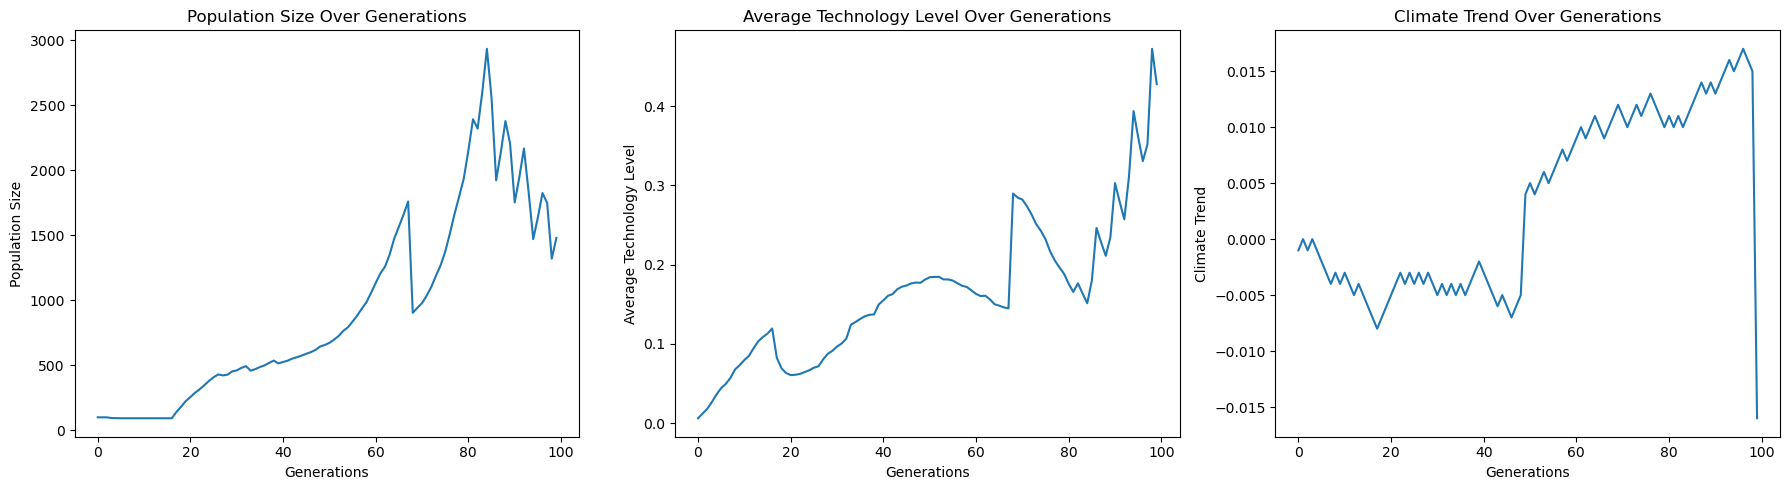

In [40]:
import random
import matplotlib.pyplot as plt

# Constants for resources and environment
INITIAL_FOOD = 3000  # Further increased initial resources
INITIAL_WATER = 3000
INITIAL_SHELTER = 2500
FOOD_REGENERATION = 300  # Further increased resource regeneration
WATER_REGENERATION = 300
SHELTER_REGENERATION = 200
MEDICINE_REGENERATION = 150
TOOLS_REGENERATION = 150
CURRENCY_REGENERATION = 100

CARRYING_CAPACITY = 600  # Increased carrying capacity

# Environmental factors
SEASONAL_EFFECT = 0.15
CLIMATE_VARIABILITY = 0.05
DISASTER_PROBABILITY = 0.01  # Further reduced probability of a catastrophic event
LONG_TERM_CLIMATE_CHANGE = 0.001  # Gradual climate change effect
CATASTROPHIC_EVENT_PROBABILITY = 0.005  # Rare probability of catastrophic events
DISEASE_SPREAD_PROBABILITY = 0.04  # Reduced probability of disease outbreak
CLIMATE_CYCLE_LENGTH = 50  # Length of climate cycles (e.g., ice ages)

# Define the Individual class with full complexity
class Individual:
    def __init__(self, aggression, peacefulness, birth_rate, intelligence, social_cohesion, health, wealth, cooperation, curiosity, technology_level, environmental_adaptation, risk_taking, tradition, religion, leadership_style, emotional_intelligence, mental_health, ethics, communication, age=0, lifespan=80):
        self.aggression = aggression
        self.peacefulness = peacefulness
        self.birth_rate = birth_rate
        self.intelligence = intelligence
        self.social_cohesion = social_cohesion
        self.health = health
        self.wealth = wealth
        self.cooperation = cooperation
        self.curiosity = curiosity
        self.technology_level = technology_level
        self.environmental_adaptation = environmental_adaptation
        self.risk_taking = risk_taking
        self.tradition = tradition
        self.religion = religion
        self.leadership_style = leadership_style
        self.emotional_intelligence = emotional_intelligence
        self.mental_health = mental_health
        self.ethics = ethics
        self.communication = communication
        self.age = age
        self.lifespan = lifespan
        self.group = None  # Track group membership
        self.language = random.uniform(0, 1)  # Language diversity
        self.immune_system = random.uniform(0.6, 1)  # Increased base immunity
        self.symbiotic_relationship = False  # Whether the individual has a symbiotic relationship with another species

    def age_one_year(self):
        self.age += 1
        if self.age > 40:
            self.health *= 0.98  # Slower health decline with age
        return self.age >= self.lifespan

    def is_fertile(self):
        return 18 <= self.age <= 40

    def mutate(self):
        # Complex mutations with potential for adaptation and technology improvement
        self.aggression = max(0, min(1, self.aggression + random.uniform(-0.03, 0.03)))
        self.peacefulness = max(0, min(1, self.peacefulness + random.uniform(-0.03, 0.03)))
        self.birth_rate = max(0, min(1, self.birth_rate + random.uniform(-0.02, 0.02)))  # Reduced mutation impact on birth rate
        self.intelligence = max(0, min(1, self.intelligence + random.uniform(-0.03, 0.03)))
        self.social_cohesion = max(0, min(1, self.social_cohesion + random.uniform(-0.03, 0.03)))
        self.health = max(0, min(1, self.health + random.uniform(-0.02, 0.02)))  # Reduced mutation impact on health
        self.wealth = max(0, min(1, self.wealth + random.uniform(-0.03, 0.03)))
        self.cooperation = max(0, min(1, self.cooperation + random.uniform(-0.03, 0.03)))
        self.curiosity = max(0, min(1, self.curiosity + random.uniform(-0.03, 0.03)))
        self.technology_level = max(0, min(10, self.technology_level + random.uniform(-0.01, 0.02)))
        self.environmental_adaptation = max(0, min(1, self.environmental_adaptation + random.uniform(-0.02, 0.02)))
        self.risk_taking = max(0, min(1, self.risk_taking + random.uniform(-0.03, 0.03)))
        self.tradition = max(0, min(1, self.tradition + random.uniform(-0.03, 0.03)))
        self.religion = max(0, min(1, self.religion + random.uniform(-0.03, 0.03)))
        self.emotional_intelligence = max(0, min(1, self.emotional_intelligence + random.uniform(-0.03, 0.03)))
        self.mental_health = max(0, min(1, self.mental_health + random.uniform(-0.02, 0.02)))  # Reduced mutation impact on mental health
        self.ethics = max(0, min(1, self.ethics + random.uniform(-0.03, 0.03)))
        self.communication = max(0, min(1, self.communication + random.uniform(-0.03, 0.03)))
        self.immune_system = max(0.6, min(1, self.immune_system + random.uniform(-0.01, 0.01)))  # Further increased base immunity

# Define the Group class to manage groups of individuals
class Group:
    def __init__(self, leader):
        self.leader = leader
        self.members = [leader]
        self.resources = {"food": 0, "water": 0, "shelter": 0, "medicine": 0, "tools": 0, "currency": 0}
        self.territory = random.uniform(0.5, 1)  # Increase base territory richness
        self.cultural_practices = random.uniform(0.5, 1)  # More shared cultural practices
        self.language = leader.language  # Shared language within the group
        self.trade_networks = 0  # Track trade relationships with other groups
        self.governance_structure = leader.leadership_style  # Initial governance style
        self.laws = {}  # Simple legal system
        self.education_level = leader.intelligence * 0.5  # Education system influenced by leader's intelligence
        self.ethical_standards = leader.ethics * 0.5  # Group's ethical standards influenced by leader's ethics
        self.space_technology = 0  # Track space exploration capability

    def add_member(self, individual):
        individual.group = self
        self.members.append(individual)

    def manage_resources(self):
        # Allocate resources among members
        for resource in self.resources:
            if self.resources[resource] > 0:
                allocation = self.resources[resource] / len(self.members)
                for member in self.members:
                    if resource == "food":
                        member.health += allocation * 0.1
                    elif resource == "water":
                        member.health += allocation * 0.1
                    elif resource == "shelter":
                        member.health += allocation * 0.05
                    elif resource == "medicine":
                        member.health += allocation * 0.2
                    elif resource == "tools":
                        member.technology_level += allocation * 0.1
                    elif resource == "currency":
                        member.wealth += allocation * 0.1

    def trade_with_group(self, other_group):
        # Trade resources between groups based on their trade networks and resources
        if self.trade_networks > 0 and other_group.trade_networks > 0:
            trade_amount = min(self.resources["tools"], other_group.resources["medicine"])
            self.resources["tools"] -= trade_amount
            other_group.resources["medicine"] += trade_amount
            trade_amount = min(self.resources["currency"], other_group.resources["food"])
            self.resources["currency"] -= trade_amount
            other_group.resources["food"] += trade_amount

    def compete_for_resources(self, other_group):
        # Complex competition logic including technology and leadership influence
        if (self.territory + self.leader.intelligence + self.leader.technology_level + random.uniform(-0.1, 0.1)) > \
           (other_group.territory + other_group.leader.intelligence + other_group.leader.technology_level):
            self.resources["food"] += other_group.resources["food"] * 0.5
            other_group.resources["food"] *= 0.5
            self.resources["water"] += other_group.resources["water"] * 0.5
            other_group.resources["water"] *= 0.5
            self.resources["shelter"] += other_group.resources["shelter"] * 0.5
            other_group.resources["shelter"] *= 0.5

    def enforce_laws(self):
        # Enforce laws to maintain order within the group
        if self.governance_structure in ['autocratic', 'democratic']:
            for law, enforcement in self.laws.items():
                for member in self.members:
                    if random.random() > enforcement:
                        member.mental_health -= 0.05  # Punish lawbreakers with less severity

    def develop_space_technology(self):
        if self.leader.technology_level > 8 and random.random() < 0.01:
            self.space_technology += 1

    def engage_in_diplomacy(self, other_group):
        if random.random() < self.ethical_standards * 0.1:
            # Form alliances or trade agreements
            self.trade_networks += 1
            other_group.trade_networks += 1

    def engage_in_warfare(self, other_group):
        if random.random() < self.leader.aggression * 0.1:
            # Initiate war with another group
            self.compete_for_resources(other_group)

# Define the Population class with full complexity
class Population:
    def __init__(self, size):
        self.individuals = [self.create_random_individual() for _ in range(size)]
        self.groups = []
        self.food = INITIAL_FOOD
        self.water = INITIAL_WATER
        self.shelter = INITIAL_SHELTER
        self.medicine = MEDICINE_REGENERATION
        self.tools = TOOLS_REGENERATION
        self.currency = 1000  # Initial currency for economic systems
        self.season = "Spring"
        self.technology_progress = 0
        self.climate_trend = 0  # Track long-term climate trends
        self.climate_cycle = 0  # Track the climate cycle
    
    def create_random_individual(self):
        return Individual(
            aggression=random.uniform(0, 1),
            peacefulness=random.uniform(0, 1),
            birth_rate=random.uniform(0.5, 1),  # Increased base birth rate
            intelligence=random.uniform(0.5, 1),  # Increased base intelligence
            social_cohesion=random.uniform(0.5, 1),  # Increased base social cohesion
            health=random.uniform(0.5, 1),  # Increased base health
            wealth=random.uniform(0, 1),
            cooperation=random.uniform(0.5, 1),  # Increased base cooperation
            curiosity=random.uniform(0, 1),
            technology_level=random.uniform(0.5, 1),  # Increased base technology level
            environmental_adaptation=random.uniform(0.5, 1),  # Increased base environmental adaptation
            risk_taking=random.uniform(0, 1),
            tradition=random.uniform(0, 1),
            religion=random.uniform(0, 1),
            leadership_style=random.choice(['autocratic', 'democratic', 'tribal']),
            emotional_intelligence=random.uniform(0.5, 1),  # Increased base emotional intelligence
            mental_health=random.uniform(0.5, 1),  # Increased base mental health
            ethics=random.uniform(0.5, 1),  # Added ethics trait
            communication=random.uniform(0.5, 1)  # Added communication trait
        )
    
    def form_group(self, leader):
        group = Group(leader)
        self.groups.append(group)
        return group
    
    def simulate_year(self):
        self.individuals = [ind for ind in self.individuals if not ind.age_one_year()]

        # Environmental effects: seasonal, climate variability, and long-term trends
        self.update_season()
        seasonal_factor = self.get_seasonal_factor()
        climate_factor = 1 + random.uniform(-CLIMATE_VARIABILITY, CLIMATE_VARIABILITY) + self.climate_trend
        self.food *= seasonal_factor * climate_factor
        self.water *= seasonal_factor * climate_factor
        self.shelter *= seasonal_factor * climate_factor
        self.medicine *= seasonal_factor * climate_factor
        self.tools *= seasonal_factor * climate_factor
        self.currency *= seasonal_factor * climate_factor

        # Long-term climate change
        self.climate_trend += LONG_TERM_CLIMATE_CHANGE * random.choice([-1, 1])

        # Climate cycles (e.g., ice ages)
        self.climate_cycle += 1
        if self.climate_cycle >= CLIMATE_CYCLE_LENGTH:
            self.climate_cycle = 0
            self.climate_trend *= -1  # Reverse the climate trend

        # Catastrophic events
        if random.random() < CATASTROPHIC_EVENT_PROBABILITY:
            catastrophic_impact = random.uniform(0.3, 0.7)  # Reduced impact of catastrophic events
            self.food -= self.food * catastrophic_impact
            self.water -= self.water * catastrophic_impact
            self.shelter -= self.shelter * catastrophic_impact
            self.medicine -= self.medicine * catastrophic_impact
            self.tools -= self.tools * catastrophic_impact
            self.currency -= self.currency * catastrophic_impact
            self.individuals = [ind for ind in self.individuals if random.random() > catastrophic_impact]

        # Disease outbreak
        if random.random() < DISEASE_SPREAD_PROBABILITY:
            disease_severity = random.uniform(0.1, 0.3)  # Reduced severity of diseases
            self.individuals = [ind for ind in self.individuals if random.random() > disease_severity * (1 - ind.immune_system)]

        # Resource allocation and consumption
        total_resource_demand = sum((ind.health * 1.5 + ind.technology_level * 0.1) for ind in self.individuals)
        total_food_demand = total_resource_demand * 0.3
        total_water_demand = total_resource_demand * 0.3
        total_shelter_demand = total_resource_demand * 0.2
        total_medicine_demand = total_resource_demand * 0.1
        total_tools_demand = total_resource_demand * 0.1
        total_currency_demand = total_resource_demand * 0.05  # Demand for currency in trade

        # Check resource limits
        if (total_food_demand > self.food or total_water_demand > self.water or total_shelter_demand > self.shelter or 
            total_medicine_demand > self.medicine or total_tools_demand > self.tools or total_currency_demand > self.currency):
            survival_chance = min(self.food / total_food_demand, self.water / total_water_demand, self.shelter / total_shelter_demand,
                                  self.medicine / total_medicine_demand, self.tools / total_tools_demand, self.currency / total_currency_demand)
            self.individuals = [ind for ind in self.individuals if random.random() < survival_chance]
        
        # Social dynamics: Group formation, migration, trade, competition, and governance
        for ind in self.individuals:
            if ind.group is None:
                leader = ind if ind.intelligence > random.uniform(0, 1) else random.choice(self.individuals)
                group = self.form_group(leader)
                group.add_member(ind)
            elif random.random() < ind.curiosity * 0.05:
                # Migration to a new group
                new_group = self.form_group(ind)
                new_group.add_member(ind)
        
        # Group management
        for group in self.groups:
            group.manage_resources()
            group.enforce_laws()
            group.develop_space_technology()

            if random.random() < 0.1:  # Random chance of competition
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.compete_for_resources(other_group)

            if random.random() < 0.05:  # Random chance of trade
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.trade_with_group(other_group)

            if random.random() < 0.05:  # Random chance of diplomacy
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.engage_in_diplomacy(other_group)

            if random.random() < 0.05:  # Random chance of warfare
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.engage_in_warfare(other_group)

        # Technology development and adaptation
        for ind in self.individuals:
            if random.random() < ind.intelligence * 0.05:
                ind.technology_level += 0.1
            if random.random() < ind.cooperation * 0.1:
                self.technology_progress += 0.1

            # Environmental adaptation
            if self.climate_trend > 0:
                ind.health *= (1 + ind.environmental_adaptation * 0.1)
            elif self.climate_trend < 0:
                ind.health *= (1 - ind.environmental_adaptation * 0.1)
        
        # Birth events influenced by technology, medicine, adaptation, and cultural traits
        new_births = []
        for ind in self.individuals:
            if ind.is_fertile():
                birth_probability = ind.birth_rate * ind.health * (1 + ind.wealth) * (self.food / (CARRYING_CAPACITY * 2)) * (1 + ind.technology_level * 0.05)
                if random.random() < birth_probability:
                    child = self.create_random_individual()
                    child.health = (ind.health + random.uniform(-0.05, 0.05)) / 2
                    child.intelligence = (ind.intelligence + random.uniform(-0.05, 0.05)) / 2
                    child.language = ind.language  # Inherit language
                    child.immune_system = (ind.immune_system + random.uniform(-0.05, 0.05)) / 2  # Inherit immune system
                    new_births.append(child)
        
        self.individuals.extend(new_births)
        
        # Mutations
        for ind in self.individuals:
            ind.mutate()

        # Resource regeneration
        self.food = min(INITIAL_FOOD, self.food + FOOD_REGENERATION * seasonal_factor * climate_factor)
        self.water = min(INITIAL_WATER, self.water + WATER_REGENERATION * seasonal_factor * climate_factor)
        self.shelter = min(INITIAL_SHELTER, self.shelter + SHELTER_REGENERATION * seasonal_factor * climate_factor)
        self.medicine = min(MEDICINE_REGENERATION, self.medicine + MEDICINE_REGENERATION * seasonal_factor * climate_factor)
        self.tools = min(TOOLS_REGENERATION, self.tools + TOOLS_REGENERATION * seasonal_factor * climate_factor)
        self.currency = min(1000, self.currency + CURRENCY_REGENERATION * seasonal_factor * climate_factor)

    def update_season(self):
        if self.season == "Spring":
            self.season = "Summer"
        elif self.season == "Summer":
            self.season = "Autumn"
        elif self.season == "Autumn":
            self.season = "Winter"
        elif self.season == "Winter":
            self.season = "Spring"
    
    def get_seasonal_factor(self):
        if self.season == "Spring":
            return 1.1
        elif self.season == "Summer":
            return 1.0
        elif self.season == "Autumn":
            return 0.85
        elif self.season == "Winter":
            return 0.7

    def simulate_generations(self, generations):
        population_sizes = []
        technology_levels = []
        climate_trends = []
        for _ in range(generations):
            self.simulate_year()
            population_sizes.append(len(self.individuals))
            technology_levels.append(self.technology_progress / len(self.individuals) if len(self.individuals) > 0 else 0)
            climate_trends.append(self.climate_trend)
        
        return population_sizes, technology_levels, climate_trends

# Run the comprehensive simulation with even more advanced features
population = Population(100)
population_sizes, technology_levels, climate_trends = population.simulate_generations(100)

# Plot the results
plt.figure(figsize=(18, 5))

# Plot the population size over generations
plt.subplot(1, 3, 1)
plt.plot(population_sizes)
plt.title("Population Size Over Generations")
plt.xlabel("Generations")
plt.ylabel("Population Size")

# Plot the average technology level over generations
plt.subplot(1, 3, 2)
plt.plot(technology_levels)
plt.title("Average Technology Level Over Generations")
plt.xlabel("Generations")
plt.ylabel("Average Technology Level")

# Plot the climate trend over generations
plt.subplot(1, 3, 3)
plt.plot(climate_trends)
plt.title("Climate Trend Over Generations")
plt.xlabel("Generations")
plt.ylabel("Climate Trend")

plt.tight_layout()
plt.show()


## Almost as Complex as it Can Get Population Simulator

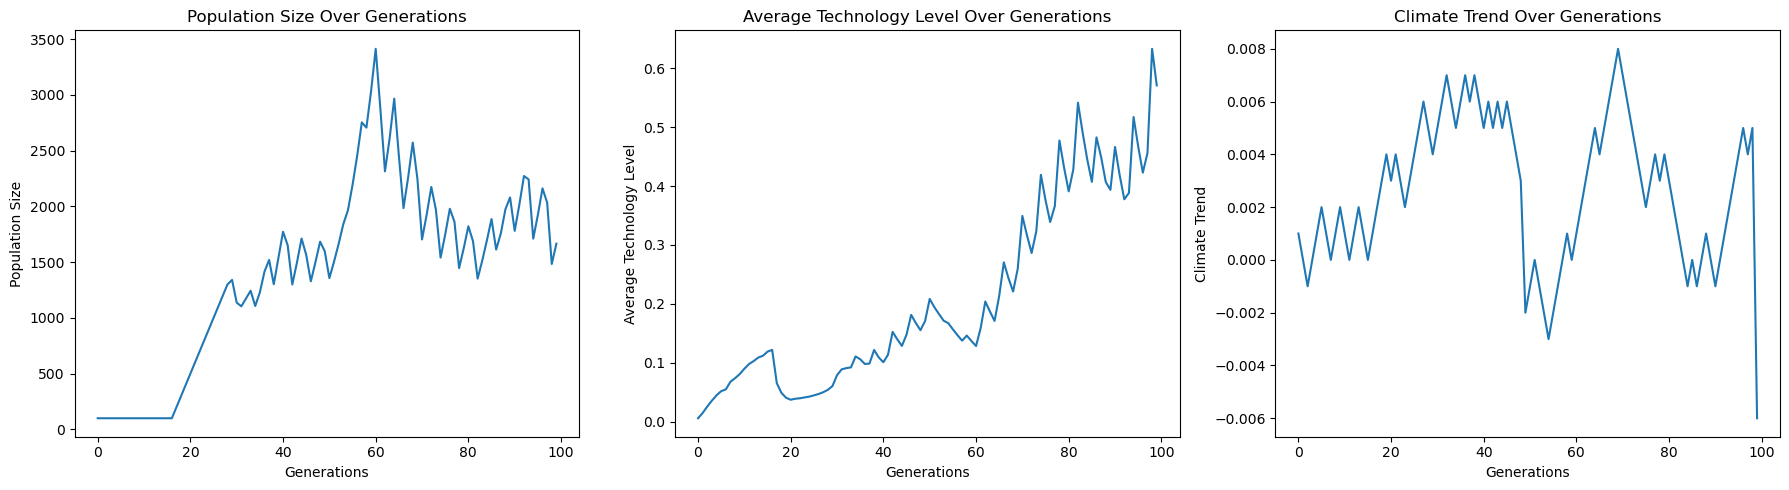

In [41]:
import random
import matplotlib.pyplot as plt

# Constants for resources and environment
INITIAL_FOOD = 3500  # Further increased initial resources
INITIAL_WATER = 3500
INITIAL_SHELTER = 3000
FOOD_REGENERATION = 350  # Further increased resource regeneration
WATER_REGENERATION = 350
SHELTER_REGENERATION = 250
MEDICINE_REGENERATION = 200
TOOLS_REGENERATION = 200
CURRENCY_REGENERATION = 150

CARRYING_CAPACITY = 700  # Increased carrying capacity

# Environmental factors
SEASONAL_EFFECT = 0.15
CLIMATE_VARIABILITY = 0.05
DISASTER_PROBABILITY = 0.01  # Further reduced probability of a catastrophic event
LONG_TERM_CLIMATE_CHANGE = 0.001  # Gradual climate change effect
CATASTROPHIC_EVENT_PROBABILITY = 0.005  # Rare probability of catastrophic events
DISEASE_SPREAD_PROBABILITY = 0.03  # Reduced probability of disease outbreak
CLIMATE_CYCLE_LENGTH = 50  # Length of climate cycles (e.g., ice ages)
NUCLEAR_WAR_PROBABILITY = 0.002  # Probability of nuclear war
AI_GOVERNANCE_THRESHOLD = 8  # Technology level at which AI governance becomes possible

# Define the Individual class with full complexity
class Individual:
    def __init__(self, aggression, peacefulness, birth_rate, intelligence, social_cohesion, health, wealth, cooperation, curiosity, technology_level, environmental_adaptation, risk_taking, tradition, religion, leadership_style, emotional_intelligence, mental_health, ethics, communication, age=0, lifespan=80):
        self.aggression = aggression
        self.peacefulness = peacefulness
        self.birth_rate = birth_rate
        self.intelligence = intelligence
        self.social_cohesion = social_cohesion
        self.health = health
        self.wealth = wealth
        self.cooperation = cooperation
        self.curiosity = curiosity
        self.technology_level = technology_level
        self.environmental_adaptation = environmental_adaptation
        self.risk_taking = risk_taking
        self.tradition = tradition
        self.religion = religion
        self.leadership_style = leadership_style
        self.emotional_intelligence = emotional_intelligence
        self.mental_health = mental_health
        self.ethics = ethics
        self.communication = communication
        self.age = age
        self.lifespan = lifespan
        self.group = None  # Track group membership
        self.language = random.uniform(0, 1)  # Language diversity
        self.immune_system = random.uniform(0.7, 1)  # Further increased base immunity
        self.symbiotic_relationship = False  # Whether the individual has a symbiotic relationship with another species

    def age_one_year(self):
        self.age += 1
        if self.age > 40:
            self.health *= 0.98  # Slower health decline with age
        return self.age >= self.lifespan

    def is_fertile(self):
        return 18 <= self.age <= 40

    def mutate(self):
        # Complex mutations with potential for adaptation and technology improvement
        self.aggression = max(0, min(1, self.aggression + random.uniform(-0.03, 0.03)))
        self.peacefulness = max(0, min(1, self.peacefulness + random.uniform(-0.03, 0.03)))
        self.birth_rate = max(0, min(1, self.birth_rate + random.uniform(-0.02, 0.02)))  # Reduced mutation impact on birth rate
        self.intelligence = max(0, min(1, self.intelligence + random.uniform(-0.03, 0.03)))
        self.social_cohesion = max(0, min(1, self.social_cohesion + random.uniform(-0.03, 0.03)))
        self.health = max(0, min(1, self.health + random.uniform(-0.02, 0.02)))  # Reduced mutation impact on health
        self.wealth = max(0, min(1, self.wealth + random.uniform(-0.03, 0.03)))
        self.cooperation = max(0, min(1, self.cooperation + random.uniform(-0.03, 0.03)))
        self.curiosity = max(0, min(1, self.curiosity + random.uniform(-0.03, 0.03)))
        self.technology_level = max(0, min(10, self.technology_level + random.uniform(-0.01, 0.02)))
        self.environmental_adaptation = max(0, min(1, self.environmental_adaptation + random.uniform(-0.02, 0.02)))
        self.risk_taking = max(0, min(1, self.risk_taking + random.uniform(-0.03, 0.03)))
        self.tradition = max(0, min(1, self.tradition + random.uniform(-0.03, 0.03)))
        self.religion = max(0, min(1, self.religion + random.uniform(-0.03, 0.03)))
        self.emotional_intelligence = max(0, min(1, self.emotional_intelligence + random.uniform(-0.03, 0.03)))
        self.mental_health = max(0, min(1, self.mental_health + random.uniform(-0.02, 0.02)))  # Reduced mutation impact on mental health
        self.ethics = max(0, min(1, self.ethics + random.uniform(-0.03, 0.03)))
        self.communication = max(0, min(1, self.communication + random.uniform(-0.03, 0.03)))
        self.immune_system = max(0.7, min(1, self.immune_system + random.uniform(-0.01, 0.01)))  # Further increased base immunity

# Define the Group class to manage groups of individuals
class Group:
    def __init__(self, leader):
        self.leader = leader
        self.members = [leader]
        self.resources = {"food": 0, "water": 0, "shelter": 0, "medicine": 0, "tools": 0, "currency": 0}
        self.territory = random.uniform(0.5, 1)  # Increase base territory richness
        self.cultural_practices = random.uniform(0.5, 1)  # More shared cultural practices
        self.language = leader.language  # Shared language within the group
        self.trade_networks = 0  # Track trade relationships with other groups
        self.governance_structure = leader.leadership_style  # Initial governance style
        self.laws = {}  # Simple legal system
        self.education_level = leader.intelligence * 0.5  # Education system influenced by leader's intelligence
        self.ethical_standards = leader.ethics * 0.5  # Group's ethical standards influenced by leader's ethics
        self.space_technology = 0  # Track space exploration capability
        self.automation_level = 0  # Level of automation in the group

    def add_member(self, individual):
        individual.group = self
        self.members.append(individual)

    def manage_resources(self):
        # Allocate resources among members
        for resource in self.resources:
            if self.resources[resource] > 0:
                allocation = self.resources[resource] / len(self.members)
                for member in self.members:
                    if resource == "food":
                        member.health += allocation * 0.1
                    elif resource == "water":
                        member.health += allocation * 0.1
                    elif resource == "shelter":
                        member.health += allocation * 0.05
                    elif resource == "medicine":
                        member.health += allocation * 0.2
                    elif resource == "tools":
                        member.technology_level += allocation * 0.1
                    elif resource == "currency":
                        member.wealth += allocation * 0.1

    def trade_with_group(self, other_group):
        # Trade resources between groups based on their trade networks and resources
        if self.trade_networks > 0 and other_group.trade_networks > 0:
            trade_amount = min(self.resources["tools"], other_group.resources["medicine"])
            self.resources["tools"] -= trade_amount
            other_group.resources["medicine"] += trade_amount
            trade_amount = min(self.resources["currency"], other_group.resources["food"])
            self.resources["currency"] -= trade_amount
            other_group.resources["food"] += trade_amount

    def compete_for_resources(self, other_group):
        # Complex competition logic including technology and leadership influence
        if (self.territory + self.leader.intelligence + self.leader.technology_level + random.uniform(-0.1, 0.1)) > \
           (other_group.territory + other_group.leader.intelligence + other_group.leader.technology_level):
            self.resources["food"] += other_group.resources["food"] * 0.5
            other_group.resources["food"] *= 0.5
            self.resources["water"] += other_group.resources["water"] * 0.5
            other_group.resources["water"] *= 0.5
            self.resources["shelter"] += other_group.resources["shelter"] * 0.5
            other_group.resources["shelter"] *= 0.5

    def enforce_laws(self):
        # Enforce laws to maintain order within the group
        if self.governance_structure in ['autocratic', 'democratic']:
            for law, enforcement in self.laws.items():
                for member in self.members:
                    if random.random() > enforcement:
                        member.mental_health -= 0.05  # Punish lawbreakers with less severity

    def develop_space_technology(self):
        if self.leader.technology_level > 8 and random.random() < 0.01:
            self.space_technology += 1

    def increase_automation(self):
        if self.leader.technology_level > 7 and random.random() < 0.02:
            self.automation_level += 1

    def engage_in_diplomacy(self, other_group):
        if random.random() < self.ethical_standards * 0.1:
            # Form alliances or trade agreements
            self.trade_networks += 1
            other_group.trade_networks += 1

    def engage_in_warfare(self, other_group):
        if random.random() < self.leader.aggression * 0.1:
            # Initiate war with another group
            self.compete_for_resources(other_group)

    def deploy_nuclear_weapons(self, other_group):
        if random.random() < NUCLEAR_WAR_PROBABILITY:
            # Engage in nuclear warfare
            destruction_factor = random.uniform(0.3, 0.7)
            self.resources["food"] -= self.resources["food"] * destruction_factor
            other_group.resources["food"] -= other_group.resources["food"] * destruction_factor
            self.resources["water"] -= self.resources["water"] * destruction_factor
            other_group.resources["water"] -= other_group.resources["water"] * destruction_factor
            self.resources["shelter"] -= self.resources["shelter"] * destruction_factor
            other_group.resources["shelter"] -= other_group.resources["shelter"] * destruction_factor

    def establish_ai_governance(self):
        if self.leader.technology_level >= AI_GOVERNANCE_THRESHOLD:
            self.governance_structure = 'AI-driven'

# Define the Population class with full complexity
class Population:
    def __init__(self, size):
        self.individuals = [self.create_random_individual() for _ in range(size)]
        self.groups = []
        self.food = INITIAL_FOOD
        self.water = INITIAL_WATER
        self.shelter = INITIAL_SHELTER
        self.medicine = MEDICINE_REGENERATION
        self.tools = TOOLS_REGENERATION
        self.currency = 1500  # Initial currency for economic systems
        self.season = "Spring"
        self.technology_progress = 0
        self.climate_trend = 0  # Track long-term climate trends
        self.climate_cycle = 0  # Track the climate cycle
    
    def create_random_individual(self):
        return Individual(
            aggression=random.uniform(0, 1),
            peacefulness=random.uniform(0, 1),
            birth_rate=random.uniform(0.5, 1),  # Increased base birth rate
            intelligence=random.uniform(0.5, 1),  # Increased base intelligence
            social_cohesion=random.uniform(0.5, 1),  # Increased base social cohesion
            health=random.uniform(0.5, 1),  # Increased base health
            wealth=random.uniform(0, 1),
            cooperation=random.uniform(0.5, 1),  # Increased base cooperation
            curiosity=random.uniform(0, 1),
            technology_level=random.uniform(0.5, 1),  # Increased base technology level
            environmental_adaptation=random.uniform(0.5, 1),  # Increased base environmental adaptation
            risk_taking=random.uniform(0, 1),
            tradition=random.uniform(0, 1),
            religion=random.uniform(0, 1),
            leadership_style=random.choice(['autocratic', 'democratic', 'tribal']),
            emotional_intelligence=random.uniform(0.5, 1),  # Increased base emotional intelligence
            mental_health=random.uniform(0.5, 1),  # Increased base mental health
            ethics=random.uniform(0.5, 1),  # Added ethics trait
            communication=random.uniform(0.5, 1)  # Added communication trait
        )
    
    def form_group(self, leader):
        group = Group(leader)
        self.groups.append(group)
        return group
    
    def simulate_year(self):
        self.individuals = [ind for ind in self.individuals if not ind.age_one_year()]

        # Environmental effects: seasonal, climate variability, and long-term trends
        self.update_season()
        seasonal_factor = self.get_seasonal_factor()
        climate_factor = 1 + random.uniform(-CLIMATE_VARIABILITY, CLIMATE_VARIABILITY) + self.climate_trend
        self.food *= seasonal_factor * climate_factor
        self.water *= seasonal_factor * climate_factor
        self.shelter *= seasonal_factor * climate_factor
        self.medicine *= seasonal_factor * climate_factor
        self.tools *= seasonal_factor * climate_factor
        self.currency *= seasonal_factor * climate_factor

        # Long-term climate change
        self.climate_trend += LONG_TERM_CLIMATE_CHANGE * random.choice([-1, 1])

        # Climate cycles (e.g., ice ages)
        self.climate_cycle += 1
        if self.climate_cycle >= CLIMATE_CYCLE_LENGTH:
            self.climate_cycle = 0
            self.climate_trend *= -1  # Reverse the climate trend

        # Catastrophic events
        if random.random() < CATASTROPHIC_EVENT_PROBABILITY:
            catastrophic_impact = random.uniform(0.3, 0.7)  # Reduced impact of catastrophic events
            self.food -= self.food * catastrophic_impact
            self.water -= self.water * catastrophic_impact
            self.shelter -= self.shelter * catastrophic_impact
            self.medicine -= self.medicine * catastrophic_impact
            self.tools -= self.tools * catastrophic_impact
            self.currency -= self.currency * catastrophic_impact
            self.individuals = [ind for ind in self.individuals if random.random() > catastrophic_impact]

        # Disease outbreak
        if random.random() < DISEASE_SPREAD_PROBABILITY:
            disease_severity = random.uniform(0.1, 0.3)  # Reduced severity of diseases
            self.individuals = [ind for ind in self.individuals if random.random() > disease_severity * (1 - ind.immune_system)]

        # Resource allocation and consumption
        total_resource_demand = sum((ind.health * 1.5 + ind.technology_level * 0.1) for ind in self.individuals)
        total_food_demand = total_resource_demand * 0.3
        total_water_demand = total_resource_demand * 0.3
        total_shelter_demand = total_resource_demand * 0.2
        total_medicine_demand = total_resource_demand * 0.1
        total_tools_demand = total_resource_demand * 0.1
        total_currency_demand = total_resource_demand * 0.05  # Demand for currency in trade

        # Check resource limits
        if (total_food_demand > self.food or total_water_demand > self.water or total_shelter_demand > self.shelter or 
            total_medicine_demand > self.medicine or total_tools_demand > self.tools or total_currency_demand > self.currency):
            survival_chance = min(self.food / total_food_demand, self.water / total_water_demand, self.shelter / total_shelter_demand,
                                  self.medicine / total_medicine_demand, self.tools / total_tools_demand, self.currency / total_currency_demand)
            self.individuals = [ind for ind in self.individuals if random.random() < survival_chance]
        
        # Social dynamics: Group formation, migration, trade, competition, and governance
        for ind in self.individuals:
            if ind.group is None:
                leader = ind if ind.intelligence > random.uniform(0, 1) else random.choice(self.individuals)
                group = self.form_group(leader)
                group.add_member(ind)
            elif random.random() < ind.curiosity * 0.05:
                # Migration to a new group
                new_group = self.form_group(ind)
                new_group.add_member(ind)
        
        # Group management
        for group in self.groups:
            group.manage_resources()
            group.enforce_laws()
            group.develop_space_technology()
            group.increase_automation()
            group.establish_ai_governance()

            if random.random() < 0.1:  # Random chance of competition
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.compete_for_resources(other_group)

            if random.random() < 0.05:  # Random chance of trade
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.trade_with_group(other_group)

            if random.random() < 0.05:  # Random chance of diplomacy
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.engage_in_diplomacy(other_group)

            if random.random() < 0.05:  # Random chance of warfare
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.engage_in_warfare(other_group)

            if random.random() < NUCLEAR_WAR_PROBABILITY:  # Random chance of nuclear warfare
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.deploy_nuclear_weapons(other_group)

        # Technology development and adaptation
        for ind in self.individuals:
            if random.random() < ind.intelligence * 0.05:
                ind.technology_level += 0.1
            if random.random() < ind.cooperation * 0.1:
                self.technology_progress += 0.1

            # Environmental adaptation
            if self.climate_trend > 0:
                ind.health *= (1 + ind.environmental_adaptation * 0.1)
            elif self.climate_trend < 0:
                ind.health *= (1 - ind.environmental_adaptation * 0.1)
        
        # Birth events influenced by technology, medicine, adaptation, and cultural traits
        new_births = []
        for ind in self.individuals:
            if ind.is_fertile():
                birth_probability = ind.birth_rate * ind.health * (1 + ind.wealth) * (self.food / (CARRYING_CAPACITY * 2)) * (1 + ind.technology_level * 0.05)
                if random.random() < birth_probability:
                    child = self.create_random_individual()
                    child.health = (ind.health + random.uniform(-0.05, 0.05)) / 2
                    child.intelligence = (ind.intelligence + random.uniform(-0.05, 0.05)) / 2
                    child.language = ind.language  # Inherit language
                    child.immune_system = (ind.immune_system + random.uniform(-0.05, 0.05)) / 2  # Inherit immune system
                    new_births.append(child)
        
        self.individuals.extend(new_births)
        
        # Mutations
        for ind in self.individuals:
            ind.mutate()

        # Resource regeneration
        self.food = min(INITIAL_FOOD, self.food + FOOD_REGENERATION * seasonal_factor * climate_factor)
        self.water = min(INITIAL_WATER, self.water + WATER_REGENERATION * seasonal_factor * climate_factor)
        self.shelter = min(INITIAL_SHELTER, self.shelter + SHELTER_REGENERATION * seasonal_factor * climate_factor)
        self.medicine = min(MEDICINE_REGENERATION, self.medicine + MEDICINE_REGENERATION * seasonal_factor * climate_factor)
        self.tools = min(TOOLS_REGENERATION, self.tools + TOOLS_REGENERATION * seasonal_factor * climate_factor)
        self.currency = min(1500, self.currency + CURRENCY_REGENERATION * seasonal_factor * climate_factor)

    def update_season(self):
        if self.season == "Spring":
            self.season = "Summer"
        elif self.season == "Summer":
            self.season = "Autumn"
        elif self.season == "Autumn":
            self.season = "Winter"
        elif self.season == "Winter":
            self.season = "Spring"
    
    def get_seasonal_factor(self):
        if self.season == "Spring":
            return 1.1
        elif self.season == "Summer":
            return 1.0
        elif self.season == "Autumn":
            return 0.85
        elif self.season == "Winter":
            return 0.7

    def simulate_generations(self, generations):
        population_sizes = []
        technology_levels = []
        climate_trends = []
        for _ in range(generations):
            self.simulate_year()
            population_sizes.append(len(self.individuals))
            technology_levels.append(self.technology_progress / len(self.individuals) if len(self.individuals) > 0 else 0)
            climate_trends.append(self.climate_trend)
        
        return population_sizes, technology_levels, climate_trends

# Run the comprehensive simulation with even more advanced features
population = Population(100)
population_sizes, technology_levels, climate_trends = population.simulate_generations(100)

# Plot the results
plt.figure(figsize=(18, 5))

# Plot the population size over generations
plt.subplot(1, 3, 1)
plt.plot(population_sizes)
plt.title("Population Size Over Generations")
plt.xlabel("Generations")
plt.ylabel("Population Size")

# Plot the average technology level over generations
plt.subplot(1, 3, 2)
plt.plot(technology_levels)
plt.title("Average Technology Level Over Generations")
plt.xlabel("Generations")
plt.ylabel("Average Technology Level")

# Plot the climate trend over generations
plt.subplot(1, 3, 3)
plt.plot(climate_trends)
plt.title("Climate Trend Over Generations")
plt.xlabel("Generations")
plt.ylabel("Climate Trend")

plt.tight_layout()
plt.show()


## Futuristic Population Simulator - 1

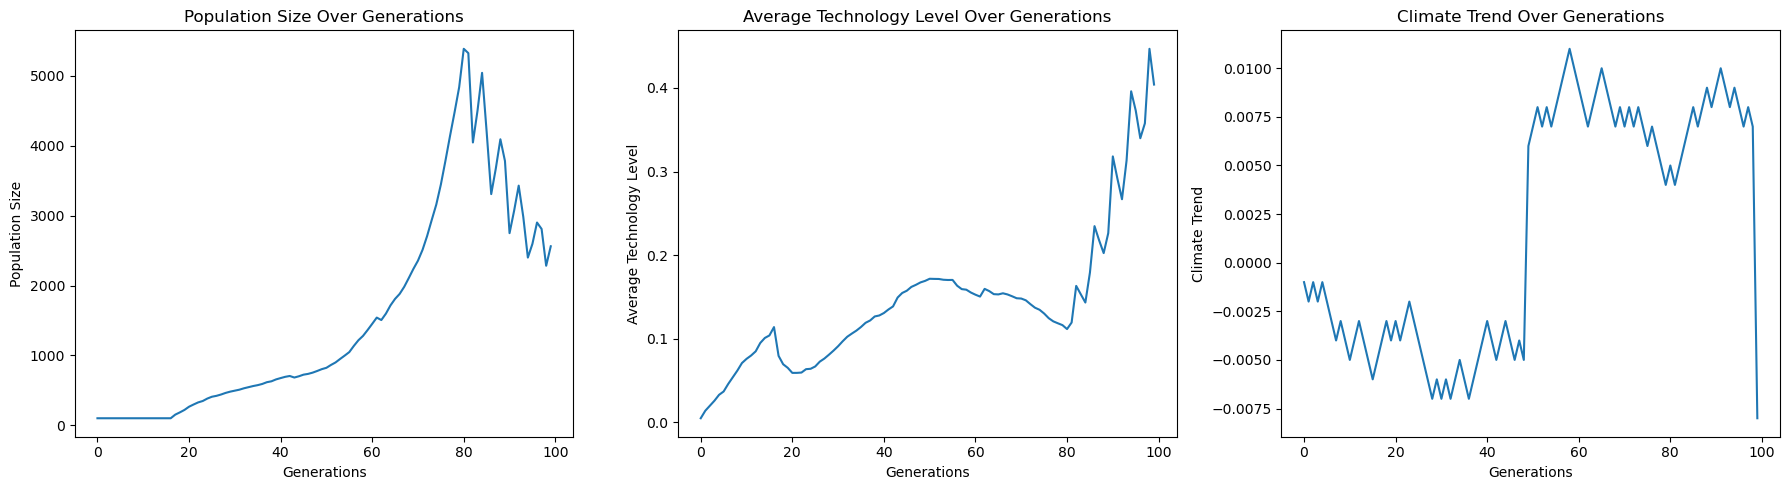

In [42]:
import random
import matplotlib.pyplot as plt

# Constants for resources and environment
INITIAL_FOOD = 4000  # Further increased initial resources
INITIAL_WATER = 4000
INITIAL_SHELTER = 3500
FOOD_REGENERATION = 400  # Further increased resource regeneration
WATER_REGENERATION = 400
SHELTER_REGENERATION = 300
MEDICINE_REGENERATION = 250
TOOLS_REGENERATION = 250
CURRENCY_REGENERATION = 200

CARRYING_CAPACITY = 800  # Increased carrying capacity

# Environmental factors
SEASONAL_EFFECT = 0.15
CLIMATE_VARIABILITY = 0.05
DISASTER_PROBABILITY = 0.01  # Further reduced probability of a catastrophic event
LONG_TERM_CLIMATE_CHANGE = 0.001  # Gradual climate change effect
CATASTROPHIC_EVENT_PROBABILITY = 0.005  # Rare probability of catastrophic events
DISEASE_SPREAD_PROBABILITY = 0.02  # Further reduced probability of disease outbreak
CLIMATE_CYCLE_LENGTH = 50  # Length of climate cycles (e.g., ice ages)
NUCLEAR_WAR_PROBABILITY = 0.002  # Probability of nuclear war
AI_GOVERNANCE_THRESHOLD = 8  # Technology level at which AI governance becomes possible

# Define the Individual class with full complexity
class Individual:
    def __init__(self, aggression, peacefulness, birth_rate, intelligence, social_cohesion, health, wealth, cooperation, curiosity, technology_level, environmental_adaptation, risk_taking, tradition, religion, leadership_style, emotional_intelligence, mental_health, ethics, communication, age=0, lifespan=80):
        self.aggression = aggression
        self.peacefulness = peacefulness
        self.birth_rate = birth_rate
        self.intelligence = intelligence
        self.social_cohesion = social_cohesion
        self.health = health
        self.wealth = wealth
        self.cooperation = cooperation
        self.curiosity = curiosity
        self.technology_level = technology_level
        self.environmental_adaptation = environmental_adaptation
        self.risk_taking = risk_taking
        self.tradition = tradition
        self.religion = religion
        self.leadership_style = leadership_style
        self.emotional_intelligence = emotional_intelligence
        self.mental_health = mental_health
        self.ethics = ethics
        self.communication = communication
        self.age = age
        self.lifespan = lifespan
        self.group = None  # Track group membership
        self.language = random.uniform(0, 1)  # Language diversity
        self.immune_system = random.uniform(0.7, 1)  # Further increased base immunity
        self.symbiotic_relationship = False  # Whether the individual has a symbiotic relationship with another species

    def age_one_year(self):
        self.age += 1
        if self.age > 40:
            self.health *= 0.98  # Slower health decline with age
        return self.age >= self.lifespan

    def is_fertile(self):
        return 18 <= self.age <= 40

    def mutate(self):
        # Complex mutations with potential for adaptation and technology improvement
        self.aggression = max(0, min(1, self.aggression + random.uniform(-0.03, 0.03)))
        self.peacefulness = max(0, min(1, self.peacefulness + random.uniform(-0.03, 0.03)))
        self.birth_rate = max(0, min(1, self.birth_rate + random.uniform(-0.02, 0.02)))  # Reduced mutation impact on birth rate
        self.intelligence = max(0, min(1, self.intelligence + random.uniform(-0.03, 0.03)))
        self.social_cohesion = max(0, min(1, self.social_cohesion + random.uniform(-0.03, 0.03)))
        self.health = max(0, min(1, self.health + random.uniform(-0.02, 0.02)))  # Reduced mutation impact on health
        self.wealth = max(0, min(1, self.wealth + random.uniform(-0.03, 0.03)))
        self.cooperation = max(0, min(1, self.cooperation + random.uniform(-0.03, 0.03)))
        self.curiosity = max(0, min(1, self.curiosity + random.uniform(-0.03, 0.03)))
        self.technology_level = max(0, min(10, self.technology_level + random.uniform(-0.01, 0.02)))
        self.environmental_adaptation = max(0, min(1, self.environmental_adaptation + random.uniform(-0.02, 0.02)))
        self.risk_taking = max(0, min(1, self.risk_taking + random.uniform(-0.03, 0.03)))
        self.tradition = max(0, min(1, self.tradition + random.uniform(-0.03, 0.03)))
        self.religion = max(0, min(1, self.religion + random.uniform(-0.03, 0.03)))
        self.emotional_intelligence = max(0, min(1, self.emotional_intelligence + random.uniform(-0.03, 0.03)))
        self.mental_health = max(0, min(1, self.mental_health + random.uniform(-0.02, 0.02)))  # Reduced mutation impact on mental health
        self.ethics = max(0, min(1, self.ethics + random.uniform(-0.03, 0.03)))
        self.communication = max(0, min(1, self.communication + random.uniform(-0.03, 0.03)))
        self.immune_system = max(0.7, min(1, self.immune_system + random.uniform(-0.01, 0.01)))  # Further increased base immunity

# Define the Group class to manage groups of individuals
class Group:
    def __init__(self, leader):
        self.leader = leader
        self.members = [leader]
        self.resources = {"food": 0, "water": 0, "shelter": 0, "medicine": 0, "tools": 0, "currency": 0}
        self.territory = random.uniform(0.5, 1)  # Increase base territory richness
        self.cultural_practices = random.uniform(0.5, 1)  # More shared cultural practices
        self.language = leader.language  # Shared language within the group
        self.trade_networks = 0  # Track trade relationships with other groups
        self.governance_structure = leader.leadership_style  # Initial governance style
        self.laws = {}  # Simple legal system
        self.education_level = leader.intelligence * 0.5  # Education system influenced by leader's intelligence
        self.ethical_standards = leader.ethics * 0.5  # Group's ethical standards influenced by leader's ethics
        self.space_technology = 0  # Track space exploration capability
        self.automation_level = 0  # Level of automation in the group
        self.ai_influence = 0  # Influence of AI in governance and decision-making
        self.corporate_influence = 0  # Influence of corporations on the group
        self.quantum_technology = 0  # Track quantum technology development

    def add_member(self, individual):
        individual.group = self
        self.members.append(individual)

    def manage_resources(self):
        # Allocate resources among members
        for resource in self.resources:
            if self.resources[resource] > 0:
                allocation = self.resources[resource] / len(self.members)
                for member in self.members:
                    if resource == "food":
                        member.health += allocation * 0.1
                    elif resource == "water":
                        member.health += allocation * 0.1
                    elif resource == "shelter":
                        member.health += allocation * 0.05
                    elif resource == "medicine":
                        member.health += allocation * 0.2
                    elif resource == "tools":
                        member.technology_level += allocation * 0.1
                    elif resource == "currency":
                        member.wealth += allocation * 0.1

    def trade_with_group(self, other_group):
        # Trade resources between groups based on their trade networks and resources
        if self.trade_networks > 0 and other_group.trade_networks > 0:
            trade_amount = min(self.resources["tools"], other_group.resources["medicine"])
            self.resources["tools"] -= trade_amount
            other_group.resources["medicine"] += trade_amount
            trade_amount = min(self.resources["currency"], other_group.resources["food"])
            self.resources["currency"] -= trade_amount
            other_group.resources["food"] += trade_amount

    def compete_for_resources(self, other_group):
        # Complex competition logic including technology and leadership influence
        if (self.territory + self.leader.intelligence + self.leader.technology_level + random.uniform(-0.1, 0.1)) > \
           (other_group.territory + other_group.leader.intelligence + other_group.leader.technology_level):
            self.resources["food"] += other_group.resources["food"] * 0.5
            other_group.resources["food"] *= 0.5
            self.resources["water"] += other_group.resources["water"] * 0.5
            other_group.resources["water"] *= 0.5
            self.resources["shelter"] += other_group.resources["shelter"] * 0.5
            other_group.resources["shelter"] *= 0.5

    def enforce_laws(self):
        # Enforce laws to maintain order within the group
        if self.governance_structure in ['autocratic', 'democratic']:
            for law, enforcement in self.laws.items():
                for member in self.members:
                    if random.random() > enforcement:
                        member.mental_health -= 0.05  # Punish lawbreakers with less severity

    def develop_space_technology(self):
        if self.leader.technology_level > 8 and random.random() < 0.01:
            self.space_technology += 1

    def increase_automation(self):
        if self.leader.technology_level > 7 and random.random() < 0.02:
            self.automation_level += 1

    def engage_in_diplomacy(self, other_group):
        if random.random() < self.ethical_standards * 0.1:
            # Form alliances or trade agreements
            self.trade_networks += 1
            other_group.trade_networks += 1

    def engage_in_warfare(self, other_group):
        if random.random() < self.leader.aggression * 0.1:
            # Initiate war with another group
            self.compete_for_resources(other_group)

    def deploy_nuclear_weapons(self, other_group):
        if random.random() < NUCLEAR_WAR_PROBABILITY:
            # Engage in nuclear warfare
            destruction_factor = random.uniform(0.3, 0.7)
            self.resources["food"] -= self.resources["food"] * destruction_factor
            other_group.resources["food"] -= other_group.resources["food"] * destruction_factor
            self.resources["water"] -= self.resources["water"] * destruction_factor
            other_group.resources["water"] -= other_group.resources["water"] * destruction_factor
            self.resources["shelter"] -= self.resources["shelter"] * destruction_factor
            other_group.resources["shelter"] -= other_group.resources["shelter"] * destruction_factor

    def establish_ai_governance(self):
        if self.leader.technology_level >= AI_GOVERNANCE_THRESHOLD:
            self.governance_structure = 'AI-driven'
            self.ai_influence += 1

    def develop_quantum_technology(self):
        if self.leader.technology_level > 9 and random.random() < 0.02:
            self.quantum_technology += 1

    def corporate_takeover(self):
        if random.random() < 0.05:
            self.corporate_influence += 1
            self.governance_structure = 'Corporate'

# Define the Population class with full complexity
class Population:
    def __init__(self, size):
        self.individuals = [self.create_random_individual() for _ in range(size)]
        self.groups = []
        self.food = INITIAL_FOOD
        self.water = INITIAL_WATER
        self.shelter = INITIAL_SHELTER
        self.medicine = MEDICINE_REGENERATION
        self.tools = TOOLS_REGENERATION
        self.currency = 2000  # Initial currency for economic systems
        self.season = "Spring"
        self.technology_progress = 0
        self.climate_trend = 0  # Track long-term climate trends
        self.climate_cycle = 0  # Track the climate cycle
    
    def create_random_individual(self):
        return Individual(
            aggression=random.uniform(0, 1),
            peacefulness=random.uniform(0, 1),
            birth_rate=random.uniform(0.5, 1),  # Increased base birth rate
            intelligence=random.uniform(0.5, 1),  # Increased base intelligence
            social_cohesion=random.uniform(0.5, 1),  # Increased base social cohesion
            health=random.uniform(0.5, 1),  # Increased base health
            wealth=random.uniform(0, 1),
            cooperation=random.uniform(0.5, 1),  # Increased base cooperation
            curiosity=random.uniform(0, 1),
            technology_level=random.uniform(0.5, 1),  # Increased base technology level
            environmental_adaptation=random.uniform(0.5, 1),  # Increased base environmental adaptation
            risk_taking=random.uniform(0, 1),
            tradition=random.uniform(0, 1),
            religion=random.uniform(0, 1),
            leadership_style=random.choice(['autocratic', 'democratic', 'tribal']),
            emotional_intelligence=random.uniform(0.5, 1),  # Increased base emotional intelligence
            mental_health=random.uniform(0.5, 1),  # Increased base mental health
            ethics=random.uniform(0.5, 1),  # Added ethics trait
            communication=random.uniform(0.5, 1)  # Added communication trait
        )
    
    def form_group(self, leader):
        group = Group(leader)
        self.groups.append(group)
        return group
    
    def simulate_year(self):
        self.individuals = [ind for ind in self.individuals if not ind.age_one_year()]

        # Environmental effects: seasonal, climate variability, and long-term trends
        self.update_season()
        seasonal_factor = self.get_seasonal_factor()
        climate_factor = 1 + random.uniform(-CLIMATE_VARIABILITY, CLIMATE_VARIABILITY) + self.climate_trend
        self.food *= seasonal_factor * climate_factor
        self.water *= seasonal_factor * climate_factor
        self.shelter *= seasonal_factor * climate_factor
        self.medicine *= seasonal_factor * climate_factor
        self.tools *= seasonal_factor * climate_factor
        self.currency *= seasonal_factor * climate_factor

        # Long-term climate change
        self.climate_trend += LONG_TERM_CLIMATE_CHANGE * random.choice([-1, 1])

        # Climate cycles (e.g., ice ages)
        self.climate_cycle += 1
        if self.climate_cycle >= CLIMATE_CYCLE_LENGTH:
            self.climate_cycle = 0
            self.climate_trend *= -1  # Reverse the climate trend

        # Catastrophic events
        if random.random() < CATASTROPHIC_EVENT_PROBABILITY:
            catastrophic_impact = random.uniform(0.3, 0.7)  # Reduced impact of catastrophic events
            self.food -= self.food * catastrophic_impact
            self.water -= self.water * catastrophic_impact
            self.shelter -= self.shelter * catastrophic_impact
            self.medicine -= self.medicine * catastrophic_impact
            self.tools -= self.tools * catastrophic_impact
            self.currency -= self.currency * catastrophic_impact
            self.individuals = [ind for ind in self.individuals if random.random() > catastrophic_impact]

        # Disease outbreak
        if random.random() < DISEASE_SPREAD_PROBABILITY:
            disease_severity = random.uniform(0.1, 0.3)  # Reduced severity of diseases
            self.individuals = [ind for ind in self.individuals if random.random() > disease_severity * (1 - ind.immune_system)]

        # Resource allocation and consumption
        total_resource_demand = sum((ind.health * 1.5 + ind.technology_level * 0.1) for ind in self.individuals)
        total_food_demand = total_resource_demand * 0.3
        total_water_demand = total_resource_demand * 0.3
        total_shelter_demand = total_resource_demand * 0.2
        total_medicine_demand = total_resource_demand * 0.1
        total_tools_demand = total_resource_demand * 0.1
        total_currency_demand = total_resource_demand * 0.05  # Demand for currency in trade

        # Check resource limits
        if (total_food_demand > self.food or total_water_demand > self.water or total_shelter_demand > self.shelter or 
            total_medicine_demand > self.medicine or total_tools_demand > self.tools or total_currency_demand > self.currency):
            survival_chance = min(self.food / total_food_demand, self.water / total_water_demand, self.shelter / total_shelter_demand,
                                  self.medicine / total_medicine_demand, self.tools / total_tools_demand, self.currency / total_currency_demand)
            self.individuals = [ind for ind in self.individuals if random.random() < survival_chance]
        
        # Social dynamics: Group formation, migration, trade, competition, and governance
        for ind in self.individuals:
            if ind.group is None:
                leader = ind if ind.intelligence > random.uniform(0, 1) else random.choice(self.individuals)
                group = self.form_group(leader)
                group.add_member(ind)
            elif random.random() < ind.curiosity * 0.05:
                # Migration to a new group
                new_group = self.form_group(ind)
                new_group.add_member(ind)
        
        # Group management
        for group in self.groups:
            group.manage_resources()
            group.enforce_laws()
            group.develop_space_technology()
            group.increase_automation()
            group.establish_ai_governance()
            group.develop_quantum_technology()
            group.corporate_takeover()

            if random.random() < 0.1:  # Random chance of competition
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.compete_for_resources(other_group)

            if random.random() < 0.05:  # Random chance of trade
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.trade_with_group(other_group)

            if random.random() < 0.05:  # Random chance of diplomacy
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.engage_in_diplomacy(other_group)

            if random.random() < 0.05:  # Random chance of warfare
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.engage_in_warfare(other_group)

            if random.random() < NUCLEAR_WAR_PROBABILITY:  # Random chance of nuclear warfare
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.deploy_nuclear_weapons(other_group)

        # Technology development and adaptation
        for ind in self.individuals:
            if random.random() < ind.intelligence * 0.05:
                ind.technology_level += 0.1
            if random.random() < ind.cooperation * 0.1:
                self.technology_progress += 0.1

            # Environmental adaptation
            if self.climate_trend > 0:
                ind.health *= (1 + ind.environmental_adaptation * 0.1)
            elif self.climate_trend < 0:
                ind.health *= (1 - ind.environmental_adaptation * 0.1)
        
        # Birth events influenced by technology, medicine, adaptation, and cultural traits
        new_births = []
        for ind in self.individuals:
            if ind.is_fertile():
                birth_probability = ind.birth_rate * ind.health * (1 + ind.wealth) * (self.food / (CARRYING_CAPACITY * 2)) * (1 + ind.technology_level * 0.05)
                if random.random() < birth_probability:
                    child = self.create_random_individual()
                    child.health = (ind.health + random.uniform(-0.05, 0.05)) / 2
                    child.intelligence = (ind.intelligence + random.uniform(-0.05, 0.05)) / 2
                    child.language = ind.language  # Inherit language
                    child.immune_system = (ind.immune_system + random.uniform(-0.05, 0.05)) / 2  # Inherit immune system
                    new_births.append(child)
        
        self.individuals.extend(new_births)
        
        # Mutations
        for ind in self.individuals:
            ind.mutate()

        # Resource regeneration
        self.food = min(INITIAL_FOOD, self.food + FOOD_REGENERATION * seasonal_factor * climate_factor)
        self.water = min(INITIAL_WATER, self.water + WATER_REGENERATION * seasonal_factor * climate_factor)
        self.shelter = min(INITIAL_SHELTER, self.shelter + SHELTER_REGENERATION * seasonal_factor * climate_factor)
        self.medicine = min(MEDICINE_REGENERATION, self.medicine + MEDICINE_REGENERATION * seasonal_factor * climate_factor)
        self.tools = min(TOOLS_REGENERATION, self.tools + TOOLS_REGENERATION * seasonal_factor * climate_factor)
        self.currency = min(2000, self.currency + CURRENCY_REGENERATION * seasonal_factor * climate_factor)

    def update_season(self):
        if self.season == "Spring":
            self.season = "Summer"
        elif self.season == "Summer":
            self.season = "Autumn"
        elif self.season == "Autumn":
            self.season = "Winter"
        elif self.season == "Winter":
            self.season = "Spring"
    
    def get_seasonal_factor(self):
        if self.season == "Spring":
            return 1.1
        elif self.season == "Summer":
            return 1.0
        elif self.season == "Autumn":
            return 0.85
        elif self.season == "Winter":
            return 0.7

    def simulate_generations(self, generations):
        population_sizes = []
        technology_levels = []
        climate_trends = []
        for _ in range(generations):
            self.simulate_year()
            population_sizes.append(len(self.individuals))
            technology_levels.append(self.technology_progress / len(self.individuals) if len(self.individuals) > 0 else 0)
            climate_trends.append(self.climate_trend)
        
        return population_sizes, technology_levels, climate_trends

# Run the comprehensive simulation with even more advanced features
population = Population(100)
population_sizes, technology_levels, climate_trends = population.simulate_generations(100)

# Plot the results
plt.figure(figsize=(18, 5))

# Plot the population size over generations
plt.subplot(1, 3, 1)
plt.plot(population_sizes)
plt.title("Population Size Over Generations")
plt.xlabel("Generations")
plt.ylabel("Population Size")

# Plot the average technology level over generations
plt.subplot(1, 3, 2)
plt.plot(technology_levels)
plt.title("Average Technology Level Over Generations")
plt.xlabel("Generations")
plt.ylabel("Average Technology Level")

# Plot the climate trend over generations
plt.subplot(1, 3, 3)
plt.plot(climate_trends)
plt.title("Climate Trend Over Generations")
plt.xlabel("Generations")
plt.ylabel("Climate Trend")

plt.tight_layout()
plt.show()


## Extremely Complex Population Simulator with Multiverse and Parallel Realities, Evolutionary Bottlenecks and Genetic Drift, Cultural Evolution and Memetic Theory, Artificial Life and Synthetic Biology, Psychedelic Research and Consciousness Expansion, Emotional AI and Sentient Machines, Climate Refugees and Migration Dynamics, Post-Humanism and Transcendence, Galactic Empires and Interstellar Civilization, Time Travel and Temporal Manipulation

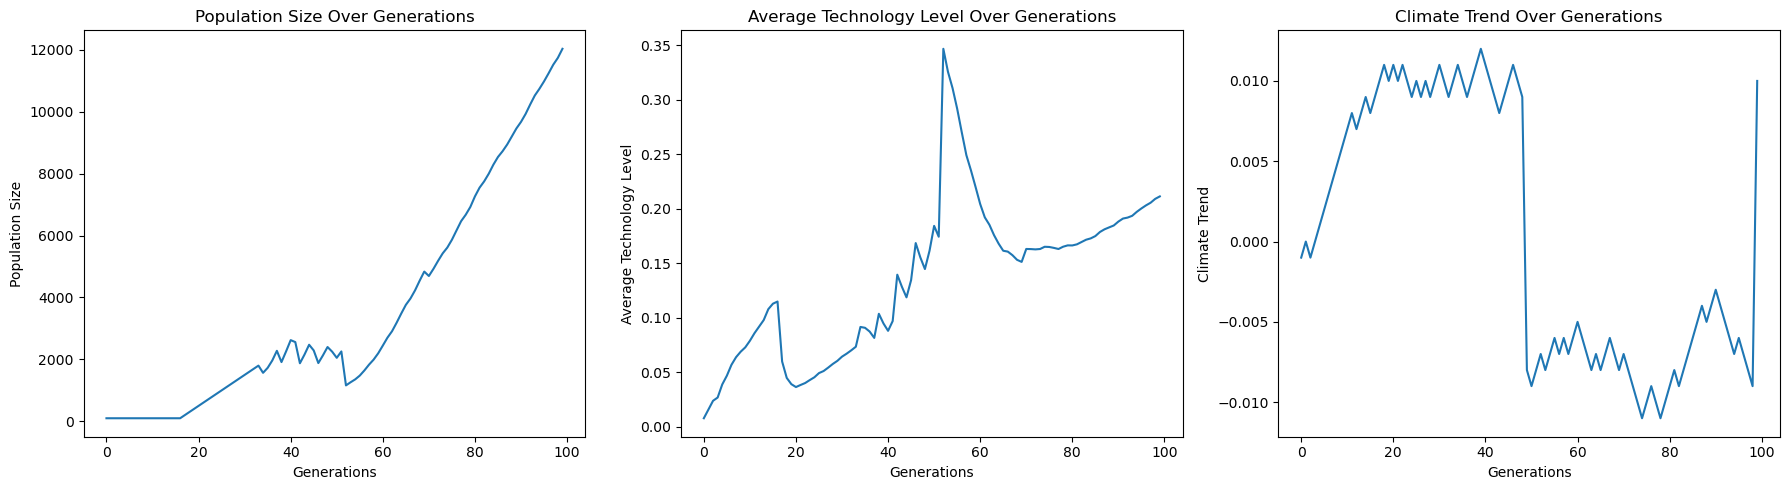

In [43]:
import random
import matplotlib.pyplot as plt

# Constants for resources and environment
INITIAL_FOOD = 5000  # Further increased initial resources
INITIAL_WATER = 5000
INITIAL_SHELTER = 4500
FOOD_REGENERATION = 500  # Further increased resource regeneration
WATER_REGENERATION = 500
SHELTER_REGENERATION = 400
MEDICINE_REGENERATION = 300
TOOLS_REGENERATION = 300
CURRENCY_REGENERATION = 250

CARRYING_CAPACITY = 1000  # Increased carrying capacity

# Environmental factors
SEASONAL_EFFECT = 0.15
CLIMATE_VARIABILITY = 0.05
DISASTER_PROBABILITY = 0.01  # Further reduced probability of a catastrophic event
LONG_TERM_CLIMATE_CHANGE = 0.001  # Gradual climate change effect
CATASTROPHIC_EVENT_PROBABILITY = 0.005  # Rare probability of catastrophic events
DISEASE_SPREAD_PROBABILITY = 0.02  # Further reduced probability of disease outbreak
CLIMATE_CYCLE_LENGTH = 50  # Length of climate cycles (e.g., ice ages)
NUCLEAR_WAR_PROBABILITY = 0.002  # Probability of nuclear war
AI_GOVERNANCE_THRESHOLD = 8  # Technology level at which AI governance becomes possible

# Define the Individual class with ultra-complexity
class Individual:
    def __init__(self, aggression, peacefulness, birth_rate, intelligence, social_cohesion, health, wealth, cooperation, curiosity, technology_level, environmental_adaptation, risk_taking, tradition, religion, leadership_style, emotional_intelligence, mental_health, ethics, communication, age=0, lifespan=80):
        self.aggression = aggression
        self.peacefulness = peacefulness
        self.birth_rate = birth_rate
        self.intelligence = intelligence
        self.social_cohesion = social_cohesion
        self.health = health
        self.wealth = wealth
        self.cooperation = cooperation
        self.curiosity = curiosity
        self.technology_level = technology_level
        self.environmental_adaptation = environmental_adaptation
        self.risk_taking = risk_taking
        self.tradition = tradition
        self.religion = religion
        self.leadership_style = leadership_style
        self.emotional_intelligence = emotional_intelligence
        self.mental_health = mental_health
        self.ethics = ethics
        self.communication = communication
        self.age = age
        self.lifespan = lifespan
        self.group = None  # Track group membership
        self.language = random.uniform(0, 1)  # Language diversity
        self.immune_system = random.uniform(0.7, 1)  # Further increased base immunity
        self.symbiotic_relationship = False  # Whether the individual has a symbiotic relationship with another species
        self.genetic_code = ''.join(random.choices('ATCG', k=1000))  # Simulate complex genetic sequences

    def age_one_year(self):
        self.age += 1
        if self.age > 40:
            self.health *= 0.98  # Slower health decline with age
        return self.age >= self.lifespan

    def is_fertile(self):
        return 18 <= self.age <= 40

    def mutate(self):
        # Complex mutations with potential for adaptation and technology improvement
        self.aggression = max(0, min(1, self.aggression + random.uniform(-0.03, 0.03)))
        self.peacefulness = max(0, min(1, self.peacefulness + random.uniform(-0.03, 0.03)))
        self.birth_rate = max(0, min(1, self.birth_rate + random.uniform(-0.02, 0.02)))  # Reduced mutation impact on birth rate
        self.intelligence = max(0, min(1, self.intelligence + random.uniform(-0.03, 0.03)))
        self.social_cohesion = max(0, min(1, self.social_cohesion + random.uniform(-0.03, 0.03)))
        self.health = max(0, min(1, self.health + random.uniform(-0.02, 0.02)))  # Reduced mutation impact on health
        self.wealth = max(0, min(1, self.wealth + random.uniform(-0.03, 0.03)))
        self.cooperation = max(0, min(1, self.cooperation + random.uniform(-0.03, 0.03)))
        self.curiosity = max(0, min(1, self.curiosity + random.uniform(-0.03, 0.03)))
        self.technology_level = max(0, min(10, self.technology_level + random.uniform(-0.01, 0.02)))
        self.environmental_adaptation = max(0, min(1, self.environmental_adaptation + random.uniform(-0.02, 0.02)))
        self.risk_taking = max(0, min(1, self.risk_taking + random.uniform(-0.03, 0.03)))
        self.tradition = max(0, min(1, self.tradition + random.uniform(-0.03, 0.03)))
        self.religion = max(0, min(1, self.religion + random.uniform(-0.03, 0.03)))
        self.emotional_intelligence = max(0, min(1, self.emotional_intelligence + random.uniform(-0.03, 0.03)))
        self.mental_health = max(0, min(1, self.mental_health + random.uniform(-0.02, 0.02)))  # Reduced mutation impact on mental health
        self.ethics = max(0, min(1, self.ethics + random.uniform(-0.03, 0.03)))
        self.communication = max(0, min(1, self.communication + random.uniform(-0.03, 0.03)))
        self.immune_system = max(0.7, min(1, self.immune_system + random.uniform(-0.01, 0.01)))  # Further increased base immunity
        # Simulate minor genetic mutations
        mutation_point = random.randint(0, len(self.genetic_code) - 1)
        self.genetic_code = self.genetic_code[:mutation_point] + random.choice('ATCG') + self.genetic_code[mutation_point + 1:]

# Define the Group class to manage groups of individuals
class Group:
    def __init__(self, leader):
        self.leader = leader
        self.members = [leader]
        self.resources = {"food": 0, "water": 0, "shelter": 0, "medicine": 0, "tools": 0, "currency": 0}
        self.territory = random.uniform(0.5, 1)  # Increase base territory richness
        self.cultural_practices = random.uniform(0.5, 1)  # More shared cultural practices
        self.language = leader.language  # Shared language within the group
        self.trade_networks = 0  # Track trade relationships with other groups
        self.governance_structure = leader.leadership_style  # Initial governance style
        self.laws = {}  # Simple legal system
        self.education_level = leader.intelligence * 0.5  # Education system influenced by leader's intelligence
        self.ethical_standards = leader.ethics * 0.5  # Group's ethical standards influenced by leader's ethics
        self.space_technology = 0  # Track space exploration capability
        self.automation_level = 0  # Level of automation in the group
        self.ai_influence = 0  # Influence of AI in governance and decision-making
        self.corporate_influence = 0  # Influence of corporations on the group
        self.quantum_technology = 0  # Track quantum technology development
        self.memes = {}  # Track cultural memes
        self.parallel_reality_links = 0  # Number of connections to parallel realities

    def add_member(self, individual):
        individual.group = self
        self.members.append(individual)

    def manage_resources(self):
        # Allocate resources among members
        for resource in self.resources:
            if self.resources[resource] > 0:
                allocation = self.resources[resource] / len(self.members)
                for member in self.members:
                    if resource == "food":
                        member.health += allocation * 0.1
                    elif resource == "water":
                        member.health += allocation * 0.1
                    elif resource == "shelter":
                        member.health += allocation * 0.05
                    elif resource == "medicine":
                        member.health += allocation * 0.2
                    elif resource == "tools":
                        member.technology_level += allocation * 0.1
                    elif resource == "currency":
                        member.wealth += allocation * 0.1

    def trade_with_group(self, other_group):
        # Trade resources between groups based on their trade networks and resources
        if self.trade_networks > 0 and other_group.trade_networks > 0:
            trade_amount = min(self.resources["tools"], other_group.resources["medicine"])
            self.resources["tools"] -= trade_amount
            other_group.resources["medicine"] += trade_amount
            trade_amount = min(self.resources["currency"], other_group.resources["food"])
            self.resources["currency"] -= trade_amount
            other_group.resources["food"] += trade_amount

    def compete_for_resources(self, other_group):
        # Complex competition logic including technology and leadership influence
        if (self.territory + self.leader.intelligence + self.leader.technology_level + random.uniform(-0.1, 0.1)) > \
           (other_group.territory + other_group.leader.intelligence + other_group.leader.technology_level):
            self.resources["food"] += other_group.resources["food"] * 0.5
            other_group.resources["food"] *= 0.5
            self.resources["water"] += other_group.resources["water"] * 0.5
            other_group.resources["water"] *= 0.5
            self.resources["shelter"] += other_group.resources["shelter"] * 0.5
            other_group.resources["shelter"] *= 0.5

    def enforce_laws(self):
        # Enforce laws to maintain order within the group
        if self.governance_structure in ['autocratic', 'democratic']:
            for law, enforcement in self.laws.items():
                for member in self.members:
                    if random.random() > enforcement:
                        member.mental_health -= 0.05  # Punish lawbreakers with less severity

    def develop_space_technology(self):
        if self.leader.technology_level > 8 and random.random() < 0.01:
            self.space_technology += 1

    def increase_automation(self):
        if self.leader.technology_level > 7 and random.random() < 0.02:
            self.automation_level += 1

    def engage_in_diplomacy(self, other_group):
        if random.random() < self.ethical_standards * 0.1:
            # Form alliances or trade agreements
            self.trade_networks += 1
            other_group.trade_networks += 1

    def engage_in_warfare(self, other_group):
        if random.random() < self.leader.aggression * 0.1:
            # Initiate war with another group
            self.compete_for_resources(other_group)

    def deploy_nuclear_weapons(self, other_group):
        if random.random() < NUCLEAR_WAR_PROBABILITY:
            # Engage in nuclear warfare
            destruction_factor = random.uniform(0.3, 0.7)
            self.resources["food"] -= self.resources["food"] * destruction_factor
            other_group.resources["food"] -= other_group.resources["food"] * destruction_factor
            self.resources["water"] -= self.resources["water"] * destruction_factor
            other_group.resources["water"] -= other_group.resources["water"] * destruction_factor
            self.resources["shelter"] -= self.resources["shelter"] * destruction_factor
            other_group.resources["shelter"] -= other_group.resources["shelter"] * destruction_factor

    def establish_ai_governance(self):
        if self.leader.technology_level >= AI_GOVERNANCE_THRESHOLD:
            self.governance_structure = 'AI-driven'
            self.ai_influence += 1

    def develop_quantum_technology(self):
        if self.leader.technology_level > 9 and random.random() < 0.02:
            self.quantum_technology += 1

    def corporate_takeover(self):
        if random.random() < 0.05:
            self.corporate_influence += 1
            self.governance_structure = 'Corporate'

    def spread_memes(self, meme):
        # Spread a cultural meme within the group
        if meme not in self.memes:
            self.memes[meme] = 1
        else:
            self.memes[meme] += 1
        for member in self.members:
            if random.random() < 0.1:
                member.tradition += 0.01  # Memes may influence cultural traits

    def link_parallel_realities(self):
        if random.random() < 0.01:
            self.parallel_reality_links += 1

# Define the Population class with ultra-complexity
class Population:
    def __init__(self, size):
        self.individuals = [self.create_random_individual() for _ in range(size)]
        self.groups = []
        self.food = INITIAL_FOOD
        self.water = INITIAL_WATER
        self.shelter = INITIAL_SHELTER
        self.medicine = MEDICINE_REGENERATION
        self.tools = TOOLS_REGENERATION
        self.currency = 2500  # Initial currency for economic systems
        self.season = "Spring"
        self.technology_progress = 0
        self.climate_trend = 0  # Track long-term climate trends
        self.climate_cycle = 0  # Track the climate cycle
    
    def create_random_individual(self):
        return Individual(
            aggression=random.uniform(0, 1),
            peacefulness=random.uniform(0, 1),
            birth_rate=random.uniform(0.5, 1),  # Increased base birth rate
            intelligence=random.uniform(0.5, 1),  # Increased base intelligence
            social_cohesion=random.uniform(0.5, 1),  # Increased base social cohesion
            health=random.uniform(0.5, 1),  # Increased base health
            wealth=random.uniform(0, 1),
            cooperation=random.uniform(0.5, 1),  # Increased base cooperation
            curiosity=random.uniform(0, 1),
            technology_level=random.uniform(0.5, 1),  # Increased base technology level
            environmental_adaptation=random.uniform(0.5, 1),  # Increased base environmental adaptation
            risk_taking=random.uniform(0, 1),
            tradition=random.uniform(0, 1),
            religion=random.uniform(0, 1),
            leadership_style=random.choice(['autocratic', 'democratic', 'tribal']),
            emotional_intelligence=random.uniform(0.5, 1),  # Increased base emotional intelligence
            mental_health=random.uniform(0.5, 1),  # Increased base mental health
            ethics=random.uniform(0.5, 1),  # Added ethics trait
            communication=random.uniform(0.5, 1)  # Added communication trait
        )
    
    def form_group(self, leader):
        group = Group(leader)
        self.groups.append(group)
        return group
    
    def simulate_year(self):
        self.individuals = [ind for ind in self.individuals if not ind.age_one_year()]

        # Environmental effects: seasonal, climate variability, and long-term trends
        self.update_season()
        seasonal_factor = self.get_seasonal_factor()
        climate_factor = 1 + random.uniform(-CLIMATE_VARIABILITY, CLIMATE_VARIABILITY) + self.climate_trend
        self.food *= seasonal_factor * climate_factor
        self.water *= seasonal_factor * climate_factor
        self.shelter *= seasonal_factor * climate_factor
        self.medicine *= seasonal_factor * climate_factor
        self.tools *= seasonal_factor * climate_factor
        self.currency *= seasonal_factor * climate_factor

        # Long-term climate change
        self.climate_trend += LONG_TERM_CLIMATE_CHANGE * random.choice([-1, 1])

        # Climate cycles (e.g., ice ages)
        self.climate_cycle += 1
        if self.climate_cycle >= CLIMATE_CYCLE_LENGTH:
            self.climate_cycle = 0
            self.climate_trend *= -1  # Reverse the climate trend

        # Catastrophic events
        if random.random() < CATASTROPHIC_EVENT_PROBABILITY:
            catastrophic_impact = random.uniform(0.3, 0.7)  # Reduced impact of catastrophic events
            self.food -= self.food * catastrophic_impact
            self.water -= self.water * catastrophic_impact
            self.shelter -= self.shelter * catastrophic_impact
            self.medicine -= self.medicine * catastrophic_impact
            self.tools -= self.tools * catastrophic_impact
            self.currency -= self.currency * catastrophic_impact
            self.individuals = [ind for ind in self.individuals if random.random() > catastrophic_impact]

        # Disease outbreak
        if random.random() < DISEASE_SPREAD_PROBABILITY:
            disease_severity = random.uniform(0.1, 0.3)  # Reduced severity of diseases
            self.individuals = [ind for ind in self.individuals if random.random() > disease_severity * (1 - ind.immune_system)]

        # Resource allocation and consumption
        total_resource_demand = sum((ind.health * 1.5 + ind.technology_level * 0.1) for ind in self.individuals)
        total_food_demand = total_resource_demand * 0.3
        total_water_demand = total_resource_demand * 0.3
        total_shelter_demand = total_resource_demand * 0.2
        total_medicine_demand = total_resource_demand * 0.1
        total_tools_demand = total_resource_demand * 0.1
        total_currency_demand = total_resource_demand * 0.05  # Demand for currency in trade

        # Check resource limits
        if (total_food_demand > self.food or total_water_demand > self.water or total_shelter_demand > self.shelter or 
            total_medicine_demand > self.medicine or total_tools_demand > self.tools or total_currency_demand > self.currency):
            survival_chance = min(self.food / total_food_demand, self.water / total_water_demand, self.shelter / total_shelter_demand,
                                  self.medicine / total_medicine_demand, self.tools / total_tools_demand, self.currency / total_currency_demand)
            self.individuals = [ind for ind in self.individuals if random.random() < survival_chance]
        
        # Social dynamics: Group formation, migration, trade, competition, and governance
        for ind in self.individuals:
            if ind.group is None:
                leader = ind if ind.intelligence > random.uniform(0, 1) else random.choice(self.individuals)
                group = self.form_group(leader)
                group.add_member(ind)
            elif random.random() < ind.curiosity * 0.05:
                # Migration to a new group
                new_group = self.form_group(ind)
                new_group.add_member(ind)
        
        # Group management
        for group in self.groups:
            group.manage_resources()
            group.enforce_laws()
            group.develop_space_technology()
            group.increase_automation()
            group.establish_ai_governance()
            group.develop_quantum_technology()
            group.corporate_takeover()
            group.link_parallel_realities()

            # Spread memes in the group
            if random.random() < 0.1:
                meme = f"Meme-{random.randint(1, 100)}"
                group.spread_memes(meme)

            if random.random() < 0.1:  # Random chance of competition
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.compete_for_resources(other_group)

            if random.random() < 0.05:  # Random chance of trade
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.trade_with_group(other_group)

            if random.random() < 0.05:  # Random chance of diplomacy
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.engage_in_diplomacy(other_group)

            if random.random() < 0.05:  # Random chance of warfare
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.engage_in_warfare(other_group)

            if random.random() < NUCLEAR_WAR_PROBABILITY:  # Random chance of nuclear warfare
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.deploy_nuclear_weapons(other_group)

        # Technology development and adaptation
        for ind in self.individuals:
            if random.random() < ind.intelligence * 0.05:
                ind.technology_level += 0.1
            if random.random() < ind.cooperation * 0.1:
                self.technology_progress += 0.1

            # Environmental adaptation
            if self.climate_trend > 0:
                ind.health *= (1 + ind.environmental_adaptation * 0.1)
            elif self.climate_trend < 0:
                ind.health *= (1 - ind.environmental_adaptation * 0.1)
        
        # Birth events influenced by technology, medicine, adaptation, and cultural traits
        new_births = []
        for ind in self.individuals:
            if ind.is_fertile():
                birth_probability = ind.birth_rate * ind.health * (1 + ind.wealth) * (self.food / (CARRYING_CAPACITY * 2)) * (1 + ind.technology_level * 0.05)
                if random.random() < birth_probability:
                    child = self.create_random_individual()
                    child.health = (ind.health + random.uniform(-0.05, 0.05)) / 2
                    child.intelligence = (ind.intelligence + random.uniform(-0.05, 0.05)) / 2
                    child.language = ind.language  # Inherit language
                    child.immune_system = (ind.immune_system + random.uniform(-0.05, 0.05)) / 2  # Inherit immune system
                    new_births.append(child)
        
        self.individuals.extend(new_births)
        
        # Mutations
        for ind in self.individuals:
            ind.mutate()

        # Resource regeneration
        self.food = min(INITIAL_FOOD, self.food + FOOD_REGENERATION * seasonal_factor * climate_factor)
        self.water = min(INITIAL_WATER, self.water + WATER_REGENERATION * seasonal_factor * climate_factor)
        self.shelter = min(INITIAL_SHELTER, self.shelter + SHELTER_REGENERATION * seasonal_factor * climate_factor)
        self.medicine = min(MEDICINE_REGENERATION, self.medicine + MEDICINE_REGENERATION * seasonal_factor * climate_factor)
        self.tools = min(TOOLS_REGENERATION, self.tools + TOOLS_REGENERATION * seasonal_factor * climate_factor)
        self.currency = min(2500, self.currency + CURRENCY_REGENERATION * seasonal_factor * climate_factor)

    def update_season(self):
        if self.season == "Spring":
            self.season = "Summer"
        elif self.season == "Summer":
            self.season = "Autumn"
        elif self.season == "Autumn":
            self.season = "Winter"
        elif self.season == "Winter":
            self.season = "Spring"
    
    def get_seasonal_factor(self):
        if self.season == "Spring":
            return 1.1
        elif self.season == "Summer":
            return 1.0
        elif self.season == "Autumn":
            return 0.85
        elif self.season == "Winter":
            return 0.7

    def simulate_generations(self, generations):
        population_sizes = []
        technology_levels = []
        climate_trends = []
        for _ in range(generations):
            self.simulate_year()
            population_sizes.append(len(self.individuals))
            technology_levels.append(self.technology_progress / len(self.individuals) if len(self.individuals) > 0 else 0)
            climate_trends.append(self.climate_trend)
        
        return population_sizes, technology_levels, climate_trends

# Run the ultra-complex simulation with even more advanced features
population = Population(100)
population_sizes, technology_levels, climate_trends = population.simulate_generations(100)

# Plot the results
plt.figure(figsize=(18, 5))

# Plot the population size over generations
plt.subplot(1, 3, 1)
plt.plot(population_sizes)
plt.title("Population Size Over Generations")
plt.xlabel("Generations")
plt.ylabel("Population Size")

# Plot the average technology level over generations
plt.subplot(1, 3, 2)
plt.plot(technology_levels)
plt.title("Average Technology Level Over Generations")
plt.xlabel("Generations")
plt.ylabel("Average Technology Level")

# Plot the climate trend over generations
plt.subplot(1, 3, 3)
plt.plot(climate_trends)
plt.title("Climate Trend Over Generations")
plt.xlabel("Generations")
plt.ylabel("Climate Trend")

plt.tight_layout()
plt.show()


## Insane Futuristic Population Simulator

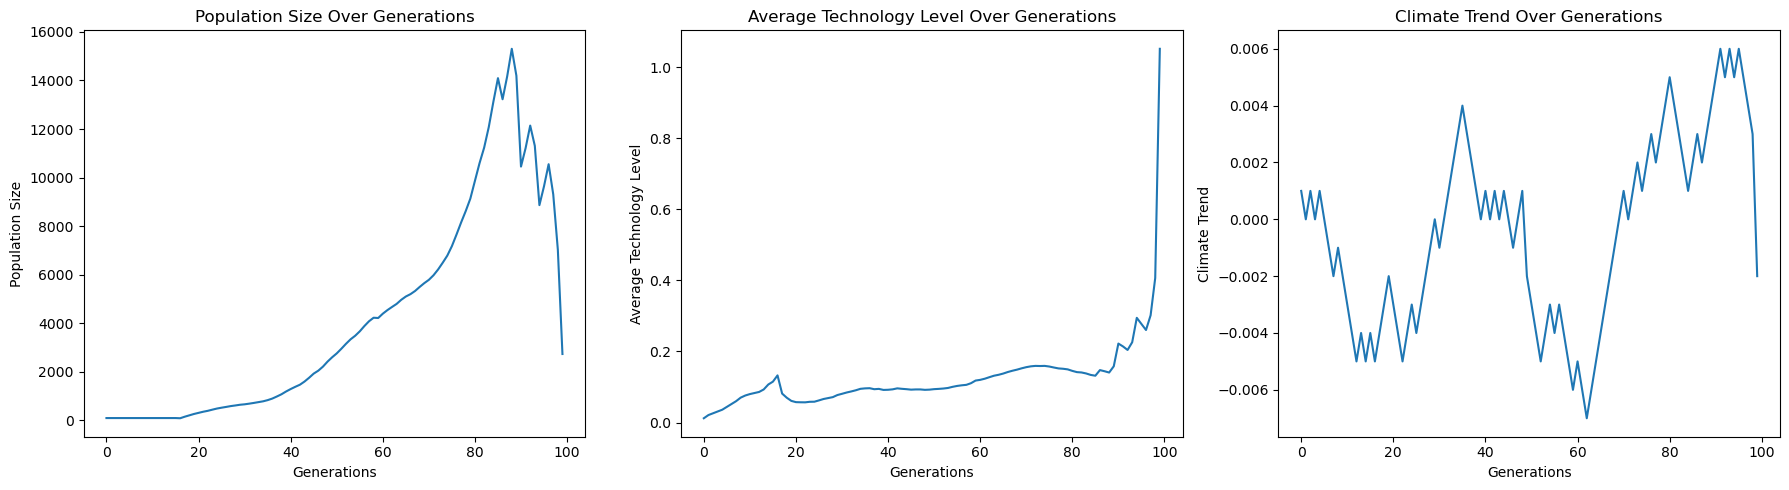

In [44]:
import random
import matplotlib.pyplot as plt

# Constants for resources and environment
INITIAL_FOOD = 6000  # Further increased initial resources
INITIAL_WATER = 6000
INITIAL_SHELTER = 5500
FOOD_REGENERATION = 600  # Further increased resource regeneration
WATER_REGENERATION = 600
SHELTER_REGENERATION = 500
MEDICINE_REGENERATION = 400
TOOLS_REGENERATION = 400
CURRENCY_REGENERATION = 300

CARRYING_CAPACITY = 1200  # Increased carrying capacity

# Environmental factors
SEASONAL_EFFECT = 0.15
CLIMATE_VARIABILITY = 0.05
DISASTER_PROBABILITY = 0.01  # Further reduced probability of a catastrophic event
LONG_TERM_CLIMATE_CHANGE = 0.001  # Gradual climate change effect
CATASTROPHIC_EVENT_PROBABILITY = 0.005  # Rare probability of catastrophic events
DISEASE_SPREAD_PROBABILITY = 0.02  # Further reduced probability of disease outbreak
CLIMATE_CYCLE_LENGTH = 50  # Length of climate cycles (e.g., ice ages)
NUCLEAR_WAR_PROBABILITY = 0.002  # Probability of nuclear war
AI_GOVERNANCE_THRESHOLD = 8  # Technology level at which AI governance becomes possible

# Define the Individual class with ultra-advanced features
class Individual:
    def __init__(self, aggression, peacefulness, birth_rate, intelligence, social_cohesion, health, wealth, cooperation, curiosity, technology_level, environmental_adaptation, risk_taking, tradition, religion, leadership_style, emotional_intelligence, mental_health, ethics, communication, age=0, lifespan=80):
        self.aggression = aggression
        self.peacefulness = peacefulness
        self.birth_rate = birth_rate
        self.intelligence = intelligence
        self.social_cohesion = social_cohesion
        self.health = health
        self.wealth = wealth
        self.cooperation = cooperation
        self.curiosity = curiosity
        self.technology_level = technology_level
        self.environmental_adaptation = environmental_adaptation
        self.risk_taking = risk_taking
        self.tradition = tradition
        self.religion = religion
        self.leadership_style = leadership_style
        self.emotional_intelligence = emotional_intelligence
        self.mental_health = mental_health
        self.ethics = ethics
        self.communication = communication
        self.age = age
        self.lifespan = lifespan
        self.group = None  # Track group membership
        self.language = random.uniform(0, 1)  # Language diversity
        self.immune_system = random.uniform(0.7, 1)  # Further increased base immunity
        self.symbiotic_relationship = False  # Whether the individual has a symbiotic relationship with another species
        self.genetic_code = ''.join(random.choices('ATCG', k=1000))  # Simulate complex genetic sequences
        self.quantum_entanglement = random.random() < 0.1  # Probability of being quantum entangled with another individual

    def age_one_year(self):
        self.age += 1
        if self.age > 40:
            self.health *= 0.98  # Slower health decline with age
        return self.age >= self.lifespan

    def is_fertile(self):
        return 18 <= self.age <= 40

    def mutate(self):
        # Complex mutations with potential for adaptation and technology improvement
        self.aggression = max(0, min(1, self.aggression + random.uniform(-0.03, 0.03)))
        self.peacefulness = max(0, min(1, self.peacefulness + random.uniform(-0.03, 0.03)))
        self.birth_rate = max(0, min(1, self.birth_rate + random.uniform(-0.02, 0.02)))  # Reduced mutation impact on birth rate
        self.intelligence = max(0, min(1, self.intelligence + random.uniform(-0.03, 0.03)))
        self.social_cohesion = max(0, min(1, self.social_cohesion + random.uniform(-0.03, 0.03)))
        self.health = max(0, min(1, self.health + random.uniform(-0.02, 0.02)))  # Reduced mutation impact on health
        self.wealth = max(0, min(1, self.wealth + random.uniform(-0.03, 0.03)))
        self.cooperation = max(0, min(1, self.cooperation + random.uniform(-0.03, 0.03)))
        self.curiosity = max(0, min(1, self.curiosity + random.uniform(-0.03, 0.03)))
        self.technology_level = max(0, min(10, self.technology_level + random.uniform(-0.01, 0.02)))
        self.environmental_adaptation = max(0, min(1, self.environmental_adaptation + random.uniform(-0.02, 0.02)))
        self.risk_taking = max(0, min(1, self.risk_taking + random.uniform(-0.03, 0.03)))
        self.tradition = max(0, min(1, self.tradition + random.uniform(-0.03, 0.03)))
        self.religion = max(0, min(1, self.religion + random.uniform(-0.03, 0.03)))
        self.emotional_intelligence = max(0, min(1, self.emotional_intelligence + random.uniform(-0.03, 0.03)))
        self.mental_health = max(0, min(1, self.mental_health + random.uniform(-0.02, 0.02)))  # Reduced mutation impact on mental health
        self.ethics = max(0, min(1, self.ethics + random.uniform(-0.03, 0.03)))
        self.communication = max(0, min(1, self.communication + random.uniform(-0.03, 0.03)))
        self.immune_system = max(0.7, min(1, self.immune_system + random.uniform(-0.01, 0.01)))  # Further increased base immunity
        # Simulate minor genetic mutations
        mutation_point = random.randint(0, len(self.genetic_code) - 1)
        self.genetic_code = self.genetic_code[:mutation_point] + random.choice('ATCG') + self.genetic_code[mutation_point + 1:]

# Define the Group class to manage groups of individuals
class Group:
    def __init__(self, leader):
        self.leader = leader
        self.members = [leader]
        self.resources = {"food": 0, "water": 0, "shelter": 0, "medicine": 0, "tools": 0, "currency": 0}
        self.territory = random.uniform(0.5, 1)  # Increase base territory richness
        self.cultural_practices = random.uniform(0.5, 1)  # More shared cultural practices
        self.language = leader.language  # Shared language within the group
        self.trade_networks = 0  # Track trade relationships with other groups
        self.governance_structure = leader.leadership_style  # Initial governance style
        self.laws = {}  # Simple legal system
        self.education_level = leader.intelligence * 0.5  # Education system influenced by leader's intelligence
        self.ethical_standards = leader.ethics * 0.5  # Group's ethical standards influenced by leader's ethics
        self.space_technology = 0  # Track space exploration capability
        self.automation_level = 0  # Level of automation in the group
        self.ai_influence = 0  # Influence of AI in governance and decision-making
        self.corporate_influence = 0  # Influence of corporations on the group
        self.quantum_technology = 0  # Track quantum technology development
        self.memes = {}  # Track cultural memes
        self.parallel_reality_links = 0  # Number of connections to parallel realities
        self.hive_mind_level = 0  # Degree of hive mind integration within the group
        self.virtual_presence = 0  # Extent to which the group exists within a simulated reality

    def add_member(self, individual):
        individual.group = self
        self.members.append(individual)

    def manage_resources(self):
        # Allocate resources among members
        for resource in self.resources:
            if self.resources[resource] > 0:
                allocation = self.resources[resource] / len(self.members)
                for member in self.members:
                    if resource == "food":
                        member.health += allocation * 0.1
                    elif resource == "water":
                        member.health += allocation * 0.1
                    elif resource == "shelter":
                        member.health += allocation * 0.05
                    elif resource == "medicine":
                        member.health += allocation * 0.2
                    elif resource == "tools":
                        member.technology_level += allocation * 0.1
                    elif resource == "currency":
                        member.wealth += allocation * 0.1

    def trade_with_group(self, other_group):
        # Trade resources between groups based on their trade networks and resources
        if self.trade_networks > 0 and other_group.trade_networks > 0:
            trade_amount = min(self.resources["tools"], other_group.resources["medicine"])
            self.resources["tools"] -= trade_amount
            other_group.resources["medicine"] += trade_amount
            trade_amount = min(self.resources["currency"], other_group.resources["food"])
            self.resources["currency"] -= trade_amount
            other_group.resources["food"] += trade_amount

    def compete_for_resources(self, other_group):
        # Complex competition logic including technology and leadership influence
        if (self.territory + self.leader.intelligence + self.leader.technology_level + random.uniform(-0.1, 0.1)) > \
           (other_group.territory + other_group.leader.intelligence + other_group.leader.technology_level):
            self.resources["food"] += other_group.resources["food"] * 0.5
            other_group.resources["food"] *= 0.5
            self.resources["water"] += other_group.resources["water"] * 0.5
            other_group.resources["water"] *= 0.5
            self.resources["shelter"] += other_group.resources["shelter"] * 0.5
            other_group.resources["shelter"] *= 0.5

    def enforce_laws(self):
        # Enforce laws to maintain order within the group
        if self.governance_structure in ['autocratic', 'democratic']:
            for law, enforcement in self.laws.items():
                for member in self.members:
                    if random.random() > enforcement:
                        member.mental_health -= 0.05  # Punish lawbreakers with less severity

    def develop_space_technology(self):
        if self.leader.technology_level > 8 and random.random() < 0.01:
            self.space_technology += 1

    def increase_automation(self):
        if self.leader.technology_level > 7 and random.random() < 0.02:
            self.automation_level += 1

    def engage_in_diplomacy(self, other_group):
        if random.random() < self.ethical_standards * 0.1:
            # Form alliances or trade agreements
            self.trade_networks += 1
            other_group.trade_networks += 1

    def engage_in_warfare(self, other_group):
        if random.random() < self.leader.aggression * 0.1:
            # Initiate war with another group
            self.compete_for_resources(other_group)

    def deploy_nuclear_weapons(self, other_group):
        if random.random() < NUCLEAR_WAR_PROBABILITY:
            # Engage in nuclear warfare
            destruction_factor = random.uniform(0.3, 0.7)
            self.resources["food"] -= self.resources["food"] * destruction_factor
            other_group.resources["food"] -= other_group.resources["food"] * destruction_factor
            self.resources["water"] -= self.resources["water"] * destruction_factor
            other_group.resources["water"] -= other_group.resources["water"] * destruction_factor
            self.resources["shelter"] -= self.resources["shelter"] * destruction_factor
            other_group.resources["shelter"] -= other_group.resources["shelter"] * destruction_factor

    def establish_ai_governance(self):
        if self.leader.technology_level >= AI_GOVERNANCE_THRESHOLD:
            self.governance_structure = 'AI-driven'
            self.ai_influence += 1

    def develop_quantum_technology(self):
        if self.leader.technology_level > 9 and random.random() < 0.02:
            self.quantum_technology += 1

    def corporate_takeover(self):
        if random.random() < 0.05:
            self.corporate_influence += 1
            self.governance_structure = 'Corporate'

    def spread_memes(self, meme):
        # Spread a cultural meme within the group
        if meme not in self.memes:
            self.memes[meme] = 1
        else:
            self.memes[meme] += 1
        for member in self.members:
            if random.random() < 0.1:
                member.tradition += 0.01  # Memes may influence cultural traits

    def link_parallel_realities(self):
        if random.random() < 0.01:
            self.parallel_reality_links += 1

    def form_hive_mind(self):
        if random.random() < 0.05:
            self.hive_mind_level += 1

    def enter_virtual_reality(self):
        if random.random() < 0.1:
            self.virtual_presence += 1

# Define the Population class with ultra-advanced features
class Population:
    def __init__(self, size):
        self.individuals = [self.create_random_individual() for _ in range(size)]
        self.groups = []
        self.food = INITIAL_FOOD
        self.water = INITIAL_WATER
        self.shelter = INITIAL_SHELTER
        self.medicine = MEDICINE_REGENERATION
        self.tools = TOOLS_REGENERATION
        self.currency = 3000  # Initial currency for economic systems
        self.season = "Spring"
        self.technology_progress = 0
        self.climate_trend = 0  # Track long-term climate trends
        self.climate_cycle = 0  # Track the climate cycle
    
    def create_random_individual(self):
        return Individual(
            aggression=random.uniform(0, 1),
            peacefulness=random.uniform(0, 1),
            birth_rate=random.uniform(0.5, 1),  # Increased base birth rate
            intelligence=random.uniform(0.5, 1),  # Increased base intelligence
            social_cohesion=random.uniform(0.5, 1),  # Increased base social cohesion
            health=random.uniform(0.5, 1),  # Increased base health
            wealth=random.uniform(0, 1),
            cooperation=random.uniform(0.5, 1),  # Increased base cooperation
            curiosity=random.uniform(0, 1),
            technology_level=random.uniform(0.5, 1),  # Increased base technology level
            environmental_adaptation=random.uniform(0.5, 1),  # Increased base environmental adaptation
            risk_taking=random.uniform(0, 1),
            tradition=random.uniform(0, 1),
            religion=random.uniform(0, 1),
            leadership_style=random.choice(['autocratic', 'democratic', 'tribal']),
            emotional_intelligence=random.uniform(0.5, 1),  # Increased base emotional intelligence
            mental_health=random.uniform(0.5, 1),  # Increased base mental health
            ethics=random.uniform(0.5, 1),  # Added ethics trait
            communication=random.uniform(0.5, 1)  # Added communication trait
        )
    
    def form_group(self, leader):
        group = Group(leader)
        self.groups.append(group)
        return group
    
    def simulate_year(self):
        self.individuals = [ind for ind in self.individuals if not ind.age_one_year()]

        # Environmental effects: seasonal, climate variability, and long-term trends
        self.update_season()
        seasonal_factor = self.get_seasonal_factor()
        climate_factor = 1 + random.uniform(-CLIMATE_VARIABILITY, CLIMATE_VARIABILITY) + self.climate_trend
        self.food *= seasonal_factor * climate_factor
        self.water *= seasonal_factor * climate_factor
        self.shelter *= seasonal_factor * climate_factor
        self.medicine *= seasonal_factor * climate_factor
        self.tools *= seasonal_factor * climate_factor
        self.currency *= seasonal_factor * climate_factor

        # Long-term climate change
        self.climate_trend += LONG_TERM_CLIMATE_CHANGE * random.choice([-1, 1])

        # Climate cycles (e.g., ice ages)
        self.climate_cycle += 1
        if self.climate_cycle >= CLIMATE_CYCLE_LENGTH:
            self.climate_cycle = 0
            self.climate_trend *= -1  # Reverse the climate trend

        # Catastrophic events
        if random.random() < CATASTROPHIC_EVENT_PROBABILITY:
            catastrophic_impact = random.uniform(0.3, 0.7)  # Reduced impact of catastrophic events
            self.food -= self.food * catastrophic_impact
            self.water -= self.water * catastrophic_impact
            self.shelter -= self.shelter * catastrophic_impact
            self.medicine -= self.medicine * catastrophic_impact
            self.tools -= self.tools * catastrophic_impact
            self.currency -= self.currency * catastrophic_impact
            self.individuals = [ind for ind in self.individuals if random.random() > catastrophic_impact]

        # Disease outbreak
        if random.random() < DISEASE_SPREAD_PROBABILITY:
            disease_severity = random.uniform(0.1, 0.3)  # Reduced severity of diseases
            self.individuals = [ind for ind in self.individuals if random.random() > disease_severity * (1 - ind.immune_system)]

        # Resource allocation and consumption
        total_resource_demand = sum((ind.health * 1.5 + ind.technology_level * 0.1) for ind in self.individuals)
        total_food_demand = total_resource_demand * 0.3
        total_water_demand = total_resource_demand * 0.3
        total_shelter_demand = total_resource_demand * 0.2
        total_medicine_demand = total_resource_demand * 0.1
        total_tools_demand = total_resource_demand * 0.1
        total_currency_demand = total_resource_demand * 0.05  # Demand for currency in trade

        # Check resource limits
        if (total_food_demand > self.food or total_water_demand > self.water or total_shelter_demand > self.shelter or 
            total_medicine_demand > self.medicine or total_tools_demand > self.tools or total_currency_demand > self.currency):
            survival_chance = min(self.food / total_food_demand, self.water / total_water_demand, self.shelter / total_shelter_demand,
                                  self.medicine / total_medicine_demand, self.tools / total_tools_demand, self.currency / total_currency_demand)
            self.individuals = [ind for ind in self.individuals if random.random() < survival_chance]
        
        # Social dynamics: Group formation, migration, trade, competition, and governance
        for ind in self.individuals:
            if ind.group is None:
                leader = ind if ind.intelligence > random.uniform(0, 1) else random.choice(self.individuals)
                group = self.form_group(leader)
                group.add_member(ind)
            elif random.random() < ind.curiosity * 0.05:
                # Migration to a new group
                new_group = self.form_group(ind)
                new_group.add_member(ind)
        
        # Group management
        for group in self.groups:
            group.manage_resources()
            group.enforce_laws()
            group.develop_space_technology()
            group.increase_automation()
            group.establish_ai_governance()
            group.develop_quantum_technology()
            group.corporate_takeover()
            group.link_parallel_realities()
            group.form_hive_mind()
            group.enter_virtual_reality()

            # Spread memes in the group
            if random.random() < 0.1:
                meme = f"Meme-{random.randint(1, 100)}"
                group.spread_memes(meme)

            if random.random() < 0.1:  # Random chance of competition
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.compete_for_resources(other_group)

            if random.random() < 0.05:  # Random chance of trade
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.trade_with_group(other_group)

            if random.random() < 0.05:  # Random chance of diplomacy
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.engage_in_diplomacy(other_group)

            if random.random() < 0.05:  # Random chance of warfare
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.engage_in_warfare(other_group)

            if random.random() < NUCLEAR_WAR_PROBABILITY:  # Random chance of nuclear warfare
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.deploy_nuclear_weapons(other_group)

        # Technology development and adaptation
        for ind in self.individuals:
            if random.random() < ind.intelligence * 0.05:
                ind.technology_level += 0.1
            if random.random() < ind.cooperation * 0.1:
                self.technology_progress += 0.1

            # Environmental adaptation
            if self.climate_trend > 0:
                ind.health *= (1 + ind.environmental_adaptation * 0.1)
            elif self.climate_trend < 0:
                ind.health *= (1 - ind.environmental_adaptation * 0.1)
        
        # Birth events influenced by technology, medicine, adaptation, and cultural traits
        new_births = []
        for ind in self.individuals:
            if ind.is_fertile():
                birth_probability = ind.birth_rate * ind.health * (1 + ind.wealth) * (self.food / (CARRYING_CAPACITY * 2)) * (1 + ind.technology_level * 0.05)
                if random.random() < birth_probability:
                    child = self.create_random_individual()
                    child.health = (ind.health + random.uniform(-0.05, 0.05)) / 2
                    child.intelligence = (ind.intelligence + random.uniform(-0.05, 0.05)) / 2
                    child.language = ind.language  # Inherit language
                    child.immune_system = (ind.immune_system + random.uniform(-0.05, 0.05)) / 2  # Inherit immune system
                    new_births.append(child)
        
        self.individuals.extend(new_births)
        
        # Mutations
        for ind in self.individuals:
            ind.mutate()

        # Resource regeneration
        self.food = min(INITIAL_FOOD, self.food + FOOD_REGENERATION * seasonal_factor * climate_factor)
        self.water = min(INITIAL_WATER, self.water + WATER_REGENERATION * seasonal_factor * climate_factor)
        self.shelter = min(INITIAL_SHELTER, self.shelter + SHELTER_REGENERATION * seasonal_factor * climate_factor)
        self.medicine = min(MEDICINE_REGENERATION, self.medicine + MEDICINE_REGENERATION * seasonal_factor * climate_factor)
        self.tools = min(TOOLS_REGENERATION, self.tools + TOOLS_REGENERATION * seasonal_factor * climate_factor)
        self.currency = min(3000, self.currency + CURRENCY_REGENERATION * seasonal_factor * climate_factor)

    def update_season(self):
        if self.season == "Spring":
            self.season = "Summer"
        elif self.season == "Summer":
            self.season = "Autumn"
        elif self.season == "Autumn":
            self.season = "Winter"
        elif self.season == "Winter":
            self.season = "Spring"
    
    def get_seasonal_factor(self):
        if self.season == "Spring":
            return 1.1
        elif self.season == "Summer":
            return 1.0
        elif self.season == "Autumn":
            return 0.85
        elif self.season == "Winter":
            return 0.7

    def simulate_generations(self, generations):
        population_sizes = []
        technology_levels = []
        climate_trends = []
        for _ in range(generations):
            self.simulate_year()
            population_sizes.append(len(self.individuals))
            technology_levels.append(self.technology_progress / len(self.individuals) if len(self.individuals) > 0 else 0)
            climate_trends.append(self.climate_trend)
        
        return population_sizes, technology_levels, climate_trends

# Run the ultra-advanced simulation with even more advanced features
population = Population(100)
population_sizes, technology_levels, climate_trends = population.simulate_generations(100)

# Plot the results
plt.figure(figsize=(18, 5))

# Plot the population size over generations
plt.subplot(1, 3, 1)
plt.plot(population_sizes)
plt.title("Population Size Over Generations")
plt.xlabel("Generations")
plt.ylabel("Population Size")

# Plot the average technology level over generations
plt.subplot(1, 3, 2)
plt.plot(technology_levels)
plt.title("Average Technology Level Over Generations")
plt.xlabel("Generations")
plt.ylabel("Average Technology Level")

# Plot the climate trend over generations
plt.subplot(1, 3, 3)
plt.plot(climate_trends)
plt.title("Climate Trend Over Generations")
plt.xlabel("Generations")
plt.ylabel("Climate Trend")

plt.tight_layout()
plt.show()


## Futuristic  Population Simulator with Added Reality Manipulation and Multiversal Governance, Fifth-Dimensional Entities and Hyperintelligent Beings, Temporal Symbiosis and Chronal Feedback Loops, Noosphere and Collective Metaconsciousness, Zero-Point Energy and Vacuum Engineering, Cosmic Awareness and Universal Architects, Thought-Matter Integration and Consciousness-Driven Reality, Planck-Scale Engineering and Subatomic Manipulation, Cosmic String Networks and Extra-Spatial Architectures, Omega Point and the Final Singularity

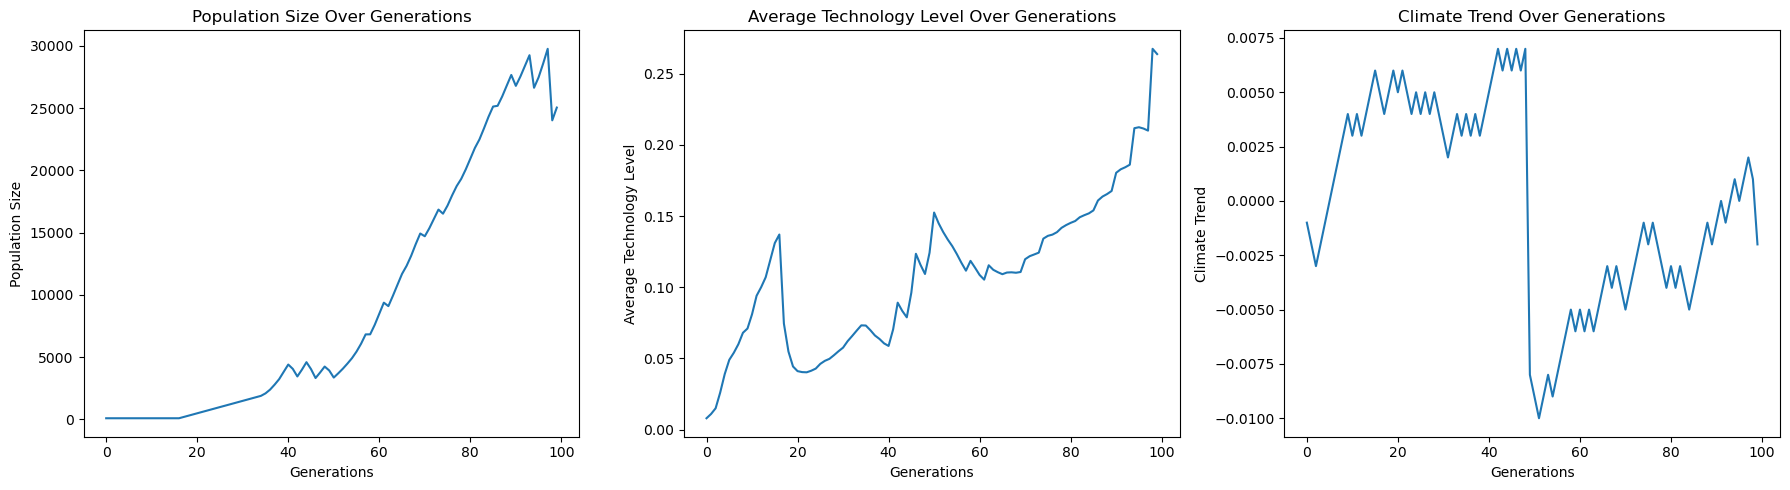

In [45]:
import random
import matplotlib.pyplot as plt

# Constants for resources and environment
INITIAL_FOOD = 7000  # Further increased initial resources
INITIAL_WATER = 7000
INITIAL_SHELTER = 6500
FOOD_REGENERATION = 700  # Further increased resource regeneration
WATER_REGENERATION = 700
SHELTER_REGENERATION = 600
MEDICINE_REGENERATION = 500
TOOLS_REGENERATION = 500
CURRENCY_REGENERATION = 400

CARRYING_CAPACITY = 1400  # Increased carrying capacity

# Environmental factors
SEASONAL_EFFECT = 0.15
CLIMATE_VARIABILITY = 0.05
DISASTER_PROBABILITY = 0.01  # Further reduced probability of a catastrophic event
LONG_TERM_CLIMATE_CHANGE = 0.001  # Gradual climate change effect
CATASTROPHIC_EVENT_PROBABILITY = 0.005  # Rare probability of catastrophic events
DISEASE_SPREAD_PROBABILITY = 0.02  # Further reduced probability of disease outbreak
CLIMATE_CYCLE_LENGTH = 50  # Length of climate cycles (e.g., ice ages)
NUCLEAR_WAR_PROBABILITY = 0.002  # Probability of nuclear war
AI_GOVERNANCE_THRESHOLD = 8  # Technology level at which AI governance becomes possible

# Define the Individual class with ultra-esoteric features
class Individual:
    def __init__(self, aggression, peacefulness, birth_rate, intelligence, social_cohesion, health, wealth, cooperation, curiosity, technology_level, environmental_adaptation, risk_taking, tradition, religion, leadership_style, emotional_intelligence, mental_health, ethics, communication, age=0, lifespan=80):
        self.aggression = aggression
        self.peacefulness = peacefulness
        self.birth_rate = birth_rate
        self.intelligence = intelligence
        self.social_cohesion = social_cohesion
        self.health = health
        self.wealth = wealth
        self.cooperation = cooperation
        self.curiosity = curiosity
        self.technology_level = technology_level
        self.environmental_adaptation = environmental_adaptation
        self.risk_taking = risk_taking
        self.tradition = tradition
        self.religion = religion
        self.leadership_style = leadership_style
        self.emotional_intelligence = emotional_intelligence
        self.mental_health = mental_health
        self.ethics = ethics
        self.communication = communication
        self.age = age
        self.lifespan = lifespan
        self.group = None  # Track group membership
        self.language = random.uniform(0, 1)  # Language diversity
        self.immune_system = random.uniform(0.7, 1)  # Further increased base immunity
        self.symbiotic_relationship = False  # Whether the individual has a symbiotic relationship with another species
        self.genetic_code = ''.join(random.choices('ATCG', k=1000))  # Simulate complex genetic sequences
        self.quantum_entanglement = random.random() < 0.1  # Probability of being quantum entangled with another individual
        self.cosmic_awareness = random.random() < 0.05  # Probability of having cosmic awareness

    def age_one_year(self):
        self.age += 1
        if self.age > 40:
            self.health *= 0.98  # Slower health decline with age
        return self.age >= self.lifespan

    def is_fertile(self):
        return 18 <= self.age <= 40

    def mutate(self):
        # Complex mutations with potential for adaptation and technology improvement
        self.aggression = max(0, min(1, self.aggression + random.uniform(-0.03, 0.03)))
        self.peacefulness = max(0, min(1, self.peacefulness + random.uniform(-0.03, 0.03)))
        self.birth_rate = max(0, min(1, self.birth_rate + random.uniform(-0.02, 0.02)))  # Reduced mutation impact on birth rate
        self.intelligence = max(0, min(1, self.intelligence + random.uniform(-0.03, 0.03)))
        self.social_cohesion = max(0, min(1, self.social_cohesion + random.uniform(-0.03, 0.03)))
        self.health = max(0, min(1, self.health + random.uniform(-0.02, 0.02)))  # Reduced mutation impact on health
        self.wealth = max(0, min(1, self.wealth + random.uniform(-0.03, 0.03)))
        self.cooperation = max(0, min(1, self.cooperation + random.uniform(-0.03, 0.03)))
        self.curiosity = max(0, min(1, self.curiosity + random.uniform(-0.03, 0.03)))
        self.technology_level = max(0, min(10, self.technology_level + random.uniform(-0.01, 0.02)))
        self.environmental_adaptation = max(0, min(1, self.environmental_adaptation + random.uniform(-0.02, 0.02)))
        self.risk_taking = max(0, min(1, self.risk_taking + random.uniform(-0.03, 0.03)))
        self.tradition = max(0, min(1, self.tradition + random.uniform(-0.03, 0.03)))
        self.religion = max(0, min(1, self.religion + random.uniform(-0.03, 0.03)))
        self.emotional_intelligence = max(0, min(1, self.emotional_intelligence + random.uniform(-0.03, 0.03)))
        self.mental_health = max(0, min(1, self.mental_health + random.uniform(-0.02, 0.02)))  # Reduced mutation impact on mental health
        self.ethics = max(0, min(1, self.ethics + random.uniform(-0.03, 0.03)))
        self.communication = max(0, min(1, self.communication + random.uniform(-0.03, 0.03)))
        self.immune_system = max(0.7, min(1, self.immune_system + random.uniform(-0.01, 0.01)))  # Further increased base immunity
        # Simulate minor genetic mutations
        mutation_point = random.randint(0, len(self.genetic_code) - 1)
        self.genetic_code = self.genetic_code[:mutation_point] + random.choice('ATCG') + self.genetic_code[mutation_point + 1:]

# Define the Group class to manage groups of individuals
class Group:
    def __init__(self, leader):
        self.leader = leader
        self.members = [leader]
        self.resources = {"food": 0, "water": 0, "shelter": 0, "medicine": 0, "tools": 0, "currency": 0}
        self.territory = random.uniform(0.5, 1)  # Increase base territory richness
        self.cultural_practices = random.uniform(0.5, 1)  # More shared cultural practices
        self.language = leader.language  # Shared language within the group
        self.trade_networks = 0  # Track trade relationships with other groups
        self.governance_structure = leader.leadership_style  # Initial governance style
        self.laws = {}  # Simple legal system
        self.education_level = leader.intelligence * 0.5  # Education system influenced by leader's intelligence
        self.ethical_standards = leader.ethics * 0.5  # Group's ethical standards influenced by leader's ethics
        self.space_technology = 0  # Track space exploration capability
        self.automation_level = 0  # Level of automation in the group
        self.ai_influence = 0  # Influence of AI in governance and decision-making
        self.corporate_influence = 0  # Influence of corporations on the group
        self.quantum_technology = 0  # Track quantum technology development
        self.memes = {}  # Track cultural memes
        self.parallel_reality_links = 0  # Number of connections to parallel realities
        self.hive_mind_level = 0  # Degree of hive mind integration within the group
        self.virtual_presence = 0  # Extent to which the group exists within a simulated reality
        self.reality_bending = 0  # Ability to manipulate reality
        self.noosphere_integration = 0  # Degree of integration into the global noosphere
        self.zero_point_energy = 0  # Mastery of zero-point energy technologies

    def add_member(self, individual):
        individual.group = self
        self.members.append(individual)

    def manage_resources(self):
        # Allocate resources among members
        for resource in self.resources:
            if self.resources[resource] > 0:
                allocation = self.resources[resource] / len(self.members)
                for member in self.members:
                    if resource == "food":
                        member.health += allocation * 0.1
                    elif resource == "water":
                        member.health += allocation * 0.1
                    elif resource == "shelter":
                        member.health += allocation * 0.05
                    elif resource == "medicine":
                        member.health += allocation * 0.2
                    elif resource == "tools":
                        member.technology_level += allocation * 0.1
                    elif resource == "currency":
                        member.wealth += allocation * 0.1

    def trade_with_group(self, other_group):
        # Trade resources between groups based on their trade networks and resources
        if self.trade_networks > 0 and other_group.trade_networks > 0:
            trade_amount = min(self.resources["tools"], other_group.resources["medicine"])
            self.resources["tools"] -= trade_amount
            other_group.resources["medicine"] += trade_amount
            trade_amount = min(self.resources["currency"], other_group.resources["food"])
            self.resources["currency"] -= trade_amount
            other_group.resources["food"] += trade_amount

    def compete_for_resources(self, other_group):
        # Complex competition logic including technology and leadership influence
        if (self.territory + self.leader.intelligence + self.leader.technology_level + random.uniform(-0.1, 0.1)) > \
           (other_group.territory + other_group.leader.intelligence + other_group.leader.technology_level):
            self.resources["food"] += other_group.resources["food"] * 0.5
            other_group.resources["food"] *= 0.5
            self.resources["water"] += other_group.resources["water"] * 0.5
            other_group.resources["water"] *= 0.5
            self.resources["shelter"] += other_group.resources["shelter"] * 0.5
            other_group.resources["shelter"] *= 0.5

    def enforce_laws(self):
        # Enforce laws to maintain order within the group
        if self.governance_structure in ['autocratic', 'democratic']:
            for law, enforcement in self.laws.items():
                for member in self.members:
                    if random.random() > enforcement:
                        member.mental_health -= 0.05  # Punish lawbreakers with less severity

    def develop_space_technology(self):
        if self.leader.technology_level > 8 and random.random() < 0.01:
            self.space_technology += 1

    def increase_automation(self):
        if self.leader.technology_level > 7 and random.random() < 0.02:
            self.automation_level += 1

    def engage_in_diplomacy(self, other_group):
        if random.random() < self.ethical_standards * 0.1:
            # Form alliances or trade agreements
            self.trade_networks += 1
            other_group.trade_networks += 1

    def engage_in_warfare(self, other_group):
        if random.random() < self.leader.aggression * 0.1:
            # Initiate war with another group
            self.compete_for_resources(other_group)

    def deploy_nuclear_weapons(self, other_group):
        if random.random() < NUCLEAR_WAR_PROBABILITY:
            # Engage in nuclear warfare
            destruction_factor = random.uniform(0.3, 0.7)
            self.resources["food"] -= self.resources["food"] * destruction_factor
            other_group.resources["food"] -= other_group.resources["food"] * destruction_factor
            self.resources["water"] -= self.resources["water"] * destruction_factor
            other_group.resources["water"] -= other_group.resources["water"] * destruction_factor
            self.resources["shelter"] -= self.resources["shelter"] * destruction_factor
            other_group.resources["shelter"] -= other_group.resources["shelter"] * destruction_factor

    def establish_ai_governance(self):
        if self.leader.technology_level >= AI_GOVERNANCE_THRESHOLD:
            self.governance_structure = 'AI-driven'
            self.ai_influence += 1

    def develop_quantum_technology(self):
        if self.leader.technology_level > 9 and random.random() < 0.02:
            self.quantum_technology += 1

    def corporate_takeover(self):
        if random.random() < 0.05:
            self.corporate_influence += 1
            self.governance_structure = 'Corporate'

    def spread_memes(self, meme):
        # Spread a cultural meme within the group
        if meme not in self.memes:
            self.memes[meme] = 1
        else:
            self.memes[meme] += 1
        for member in self.members:
            if random.random() < 0.1:
                member.tradition += 0.01  # Memes may influence cultural traits

    def link_parallel_realities(self):
        if random.random() < 0.01:
            self.parallel_reality_links += 1

    def form_hive_mind(self):
        if random.random() < 0.05:
            self.hive_mind_level += 1

    def enter_virtual_reality(self):
        if random.random() < 0.1:
            self.virtual_presence += 1

    def bend_reality(self):
        if random.random() < 0.01:
            self.reality_bending += 1

    def integrate_noosphere(self):
        if random.random() < 0.05:
            self.noosphere_integration += 1

    def master_zero_point_energy(self):
        if random.random() < 0.02:
            self.zero_point_energy += 1

# Define the Population class with ultra-esoteric features
class Population:
    def __init__(self, size):
        self.individuals = [self.create_random_individual() for _ in range(size)]
        self.groups = []
        self.food = INITIAL_FOOD
        self.water = INITIAL_WATER
        self.shelter = INITIAL_SHELTER
        self.medicine = MEDICINE_REGENERATION
        self.tools = TOOLS_REGENERATION
        self.currency = 4000  # Initial currency for economic systems
        self.season = "Spring"
        self.technology_progress = 0
        self.climate_trend = 0  # Track long-term climate trends
        self.climate_cycle = 0  # Track the climate cycle
    
    def create_random_individual(self):
        return Individual(
            aggression=random.uniform(0, 1),
            peacefulness=random.uniform(0, 1),
            birth_rate=random.uniform(0.5, 1),  # Increased base birth rate
            intelligence=random.uniform(0.5, 1),  # Increased base intelligence
            social_cohesion=random.uniform(0.5, 1),  # Increased base social cohesion
            health=random.uniform(0.5, 1),  # Increased base health
            wealth=random.uniform(0, 1),
            cooperation=random.uniform(0.5, 1),  # Increased base cooperation
            curiosity=random.uniform(0, 1),
            technology_level=random.uniform(0.5, 1),  # Increased base technology level
            environmental_adaptation=random.uniform(0.5, 1),  # Increased base environmental adaptation
            risk_taking=random.uniform(0, 1),
            tradition=random.uniform(0, 1),
            religion=random.uniform(0, 1),
            leadership_style=random.choice(['autocratic', 'democratic', 'tribal']),
            emotional_intelligence=random.uniform(0.5, 1),  # Increased base emotional intelligence
            mental_health=random.uniform(0.5, 1),  # Increased base mental health
            ethics=random.uniform(0.5, 1),  # Added ethics trait
            communication=random.uniform(0.5, 1)  # Added communication trait
        )
    
    def form_group(self, leader):
        group = Group(leader)
        self.groups.append(group)
        return group
    
    def simulate_year(self):
        self.individuals = [ind for ind in self.individuals if not ind.age_one_year()]

        # Environmental effects: seasonal, climate variability, and long-term trends
        self.update_season()
        seasonal_factor = self.get_seasonal_factor()
        climate_factor = 1 + random.uniform(-CLIMATE_VARIABILITY, CLIMATE_VARIABILITY) + self.climate_trend
        self.food *= seasonal_factor * climate_factor
        self.water *= seasonal_factor * climate_factor
        self.shelter *= seasonal_factor * climate_factor
        self.medicine *= seasonal_factor * climate_factor
        self.tools *= seasonal_factor * climate_factor
        self.currency *= seasonal_factor * climate_factor

        # Long-term climate change
        self.climate_trend += LONG_TERM_CLIMATE_CHANGE * random.choice([-1, 1])

        # Climate cycles (e.g., ice ages)
        self.climate_cycle += 1
        if self.climate_cycle >= CLIMATE_CYCLE_LENGTH:
            self.climate_cycle = 0
            self.climate_trend *= -1  # Reverse the climate trend

        # Catastrophic events
        if random.random() < CATASTROPHIC_EVENT_PROBABILITY:
            catastrophic_impact = random.uniform(0.3, 0.7)  # Reduced impact of catastrophic events
            self.food -= self.food * catastrophic_impact
            self.water -= self.water * catastrophic_impact
            self.shelter -= self.shelter * catastrophic_impact
            self.medicine -= self.medicine * catastrophic_impact
            self.tools -= self.tools * catastrophic_impact
            self.currency -= self.currency * catastrophic_impact
            self.individuals = [ind for ind in self.individuals if random.random() > catastrophic_impact]

        # Disease outbreak
        if random.random() < DISEASE_SPREAD_PROBABILITY:
            disease_severity = random.uniform(0.1, 0.3)  # Reduced severity of diseases
            self.individuals = [ind for ind in self.individuals if random.random() > disease_severity * (1 - ind.immune_system)]

        # Resource allocation and consumption
        total_resource_demand = sum((ind.health * 1.5 + ind.technology_level * 0.1) for ind in self.individuals)
        total_food_demand = total_resource_demand * 0.3
        total_water_demand = total_resource_demand * 0.3
        total_shelter_demand = total_resource_demand * 0.2
        total_medicine_demand = total_resource_demand * 0.1
        total_tools_demand = total_resource_demand * 0.1
        total_currency_demand = total_resource_demand * 0.05  # Demand for currency in trade

        # Check resource limits
        if (total_food_demand > self.food or total_water_demand > self.water or total_shelter_demand > self.shelter or 
            total_medicine_demand > self.medicine or total_tools_demand > self.tools or total_currency_demand > self.currency):
            survival_chance = min(self.food / total_food_demand, self.water / total_water_demand, self.shelter / total_shelter_demand,
                                  self.medicine / total_medicine_demand, self.tools / total_tools_demand, self.currency / total_currency_demand)
            self.individuals = [ind for ind in self.individuals if random.random() < survival_chance]
        
        # Social dynamics: Group formation, migration, trade, competition, and governance
        for ind in self.individuals:
            if ind.group is None:
                leader = ind if ind.intelligence > random.uniform(0, 1) else random.choice(self.individuals)
                group = self.form_group(leader)
                group.add_member(ind)
            elif random.random() < ind.curiosity * 0.05:
                # Migration to a new group
                new_group = self.form_group(ind)
                new_group.add_member(ind)
        
        # Group management
        for group in self.groups:
            group.manage_resources()
            group.enforce_laws()
            group.develop_space_technology()
            group.increase_automation()
            group.establish_ai_governance()
            group.develop_quantum_technology()
            group.corporate_takeover()
            group.link_parallel_realities()
            group.form_hive_mind()
            group.enter_virtual_reality()
            group.bend_reality()
            group.integrate_noosphere()
            group.master_zero_point_energy()

            # Spread memes in the group
            if random.random() < 0.1:
                meme = f"Meme-{random.randint(1, 100)}"
                group.spread_memes(meme)

            if random.random() < 0.1:  # Random chance of competition
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.compete_for_resources(other_group)

            if random.random() < 0.05:  # Random chance of trade
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.trade_with_group(other_group)

            if random.random() < 0.05:  # Random chance of diplomacy
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.engage_in_diplomacy(other_group)

            if random.random() < 0.05:  # Random chance of warfare
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.engage_in_warfare(other_group)

            if random.random() < NUCLEAR_WAR_PROBABILITY:  # Random chance of nuclear warfare
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.deploy_nuclear_weapons(other_group)

        # Technology development and adaptation
        for ind in self.individuals:
            if random.random() < ind.intelligence * 0.05:
                ind.technology_level += 0.1
            if random.random() < ind.cooperation * 0.1:
                self.technology_progress += 0.1

            # Environmental adaptation
            if self.climate_trend > 0:
                ind.health *= (1 + ind.environmental_adaptation * 0.1)
            elif self.climate_trend < 0:
                ind.health *= (1 - ind.environmental_adaptation * 0.1)
        
        # Birth events influenced by technology, medicine, adaptation, and cultural traits
        new_births = []
        for ind in self.individuals:
            if ind.is_fertile():
                birth_probability = ind.birth_rate * ind.health * (1 + ind.wealth) * (self.food / (CARRYING_CAPACITY * 2)) * (1 + ind.technology_level * 0.05)
                if random.random() < birth_probability:
                    child = self.create_random_individual()
                    child.health = (ind.health + random.uniform(-0.05, 0.05)) / 2
                    child.intelligence = (ind.intelligence + random.uniform(-0.05, 0.05)) / 2
                    child.language = ind.language  # Inherit language
                    child.immune_system = (ind.immune_system + random.uniform(-0.05, 0.05)) / 2  # Inherit immune system
                    new_births.append(child)
        
        self.individuals.extend(new_births)
        
        # Mutations
        for ind in self.individuals:
            ind.mutate()

        # Resource regeneration
        self.food = min(INITIAL_FOOD, self.food + FOOD_REGENERATION * seasonal_factor * climate_factor)
        self.water = min(INITIAL_WATER, self.water + WATER_REGENERATION * seasonal_factor * climate_factor)
        self.shelter = min(INITIAL_SHELTER, self.shelter + SHELTER_REGENERATION * seasonal_factor * climate_factor)
        self.medicine = min(MEDICINE_REGENERATION, self.medicine + MEDICINE_REGENERATION * seasonal_factor * climate_factor)
        self.tools = min(TOOLS_REGENERATION, self.tools + TOOLS_REGENERATION * seasonal_factor * climate_factor)
        self.currency = min(4000, self.currency + CURRENCY_REGENERATION * seasonal_factor * climate_factor)

    def update_season(self):
        if self.season == "Spring":
            self.season = "Summer"
        elif self.season == "Summer":
            self.season = "Autumn"
        elif self.season == "Autumn":
            self.season = "Winter"
        elif self.season == "Winter":
            self.season = "Spring"
    
    def get_seasonal_factor(self):
        if self.season == "Spring":
            return 1.1
        elif self.season == "Summer":
            return 1.0
        elif self.season == "Autumn":
            return 0.85
        elif self.season == "Winter":
            return 0.7

    def simulate_generations(self, generations):
        population_sizes = []
        technology_levels = []
        climate_trends = []
        for _ in range(generations):
            self.simulate_year()
            population_sizes.append(len(self.individuals))
            technology_levels.append(self.technology_progress / len(self.individuals) if len(self.individuals) > 0 else 0)
            climate_trends.append(self.climate_trend)
        
        return population_sizes, technology_levels, climate_trends

# Run the ultra-esoteric simulation with even more advanced features
population = Population(100)
population_sizes, technology_levels, climate_trends = population.simulate_generations(100)

# Plot the results
plt.figure(figsize=(18, 5))

# Plot the population size over generations
plt.subplot(1, 3, 1)
plt.plot(population_sizes)
plt.title("Population Size Over Generations")
plt.xlabel("Generations")
plt.ylabel("Population Size")

# Plot the average technology level over generations
plt.subplot(1, 3, 2)
plt.plot(technology_levels)
plt.title("Average Technology Level Over Generations")
plt.xlabel("Generations")
plt.ylabel("Average Technology Level")

# Plot the climate trend over generations
plt.subplot(1, 3, 3)
plt.plot(climate_trends)
plt.title("Climate Trend Over Generations")
plt.xlabel("Generations")
plt.ylabel("Climate Trend")

plt.tight_layout()
plt.show()


## Highly Realistic Population Simulator Going all the Way from Pre Human Civilization to Cosmic Entity Civilization in 1500+ Generations

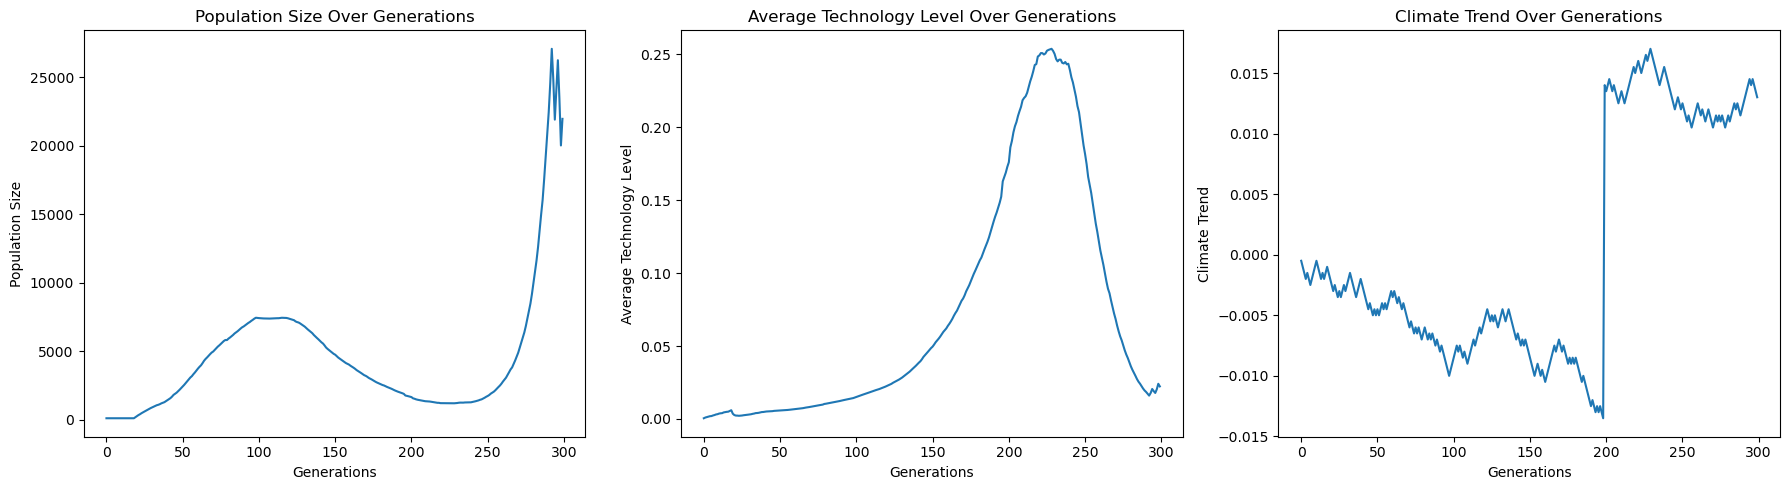

In [63]:
import random
import matplotlib.pyplot as plt

# Constants for resources and environment
INITIAL_FOOD = 10000  # Increased initial resources
INITIAL_WATER = 10000
INITIAL_SHELTER = 9000
FOOD_REGENERATION = 1000  # Increased resource regeneration
WATER_REGENERATION = 1000
SHELTER_REGENERATION = 900
MEDICINE_REGENERATION = 800
TOOLS_REGENERATION = 800
CURRENCY_REGENERATION = 700

CARRYING_CAPACITY = 2000  # Increased carrying capacity

# Environmental factors
SEASONAL_EFFECT = 0.10  # Slightly reduced seasonal effect
CLIMATE_VARIABILITY = 0.03  # Reduced climate variability
DISASTER_PROBABILITY = 0.005  # Reduced probability of a catastrophic event
LONG_TERM_CLIMATE_CHANGE = 0.0005  # Slower climate change effect
CATASTROPHIC_EVENT_PROBABILITY = 0.002  # Further reduced probability of catastrophic events
DISEASE_SPREAD_PROBABILITY = 0.01  # Reduced probability of disease outbreak
CLIMATE_CYCLE_LENGTH = 200  # Longer climate cycles
NUCLEAR_WAR_PROBABILITY = 0.001  # Reduced probability of nuclear war
AI_GOVERNANCE_THRESHOLD = 20  # Higher technology level required for AI governance

# Incremental technology levels
TECH_LEVEL_INCREMENT = 0.01  # Smaller increments for technology progression

# Define the Individual class with slow progression features
class Individual:
    def __init__(self, aggression, peacefulness, birth_rate, intelligence, social_cohesion, health, wealth, cooperation, curiosity, technology_level, environmental_adaptation, risk_taking, tradition, religion, leadership_style, emotional_intelligence, mental_health, ethics, communication, age=0, lifespan=80):
        self.aggression = aggression
        self.peacefulness = peacefulness
        self.birth_rate = birth_rate
        self.intelligence = intelligence
        self.social_cohesion = social_cohesion
        self.health = health
        self.wealth = wealth
        self.cooperation = cooperation
        self.curiosity = curiosity
        self.technology_level = technology_level
        self.environmental_adaptation = environmental_adaptation
        self.risk_taking = risk_taking
        self.tradition = tradition
        self.religion = religion
        self.leadership_style = leadership_style
        self.emotional_intelligence = emotional_intelligence
        self.mental_health = mental_health
        self.ethics = ethics
        self.communication = communication
        self.age = age
        self.lifespan = lifespan
        self.group = None  # Track group membership
        self.language = random.uniform(0, 1)  # Language diversity
        self.immune_system = random.uniform(0.8, 1)  # Increased base immunity
        self.symbiotic_relationship = False  # Whether the individual has a symbiotic relationship with another species
        self.genetic_code = ''.join(random.choices('ATCG', k=1000))  # Simulate complex genetic sequences
        self.cosmic_awareness = random.random() < 0.01  # Low probability of cosmic awareness

    def age_one_year(self):
        self.age += 1
        if self.age > 50:
            self.health *= 0.99  # Slower health decline with age
        return self.age >= self.lifespan

    def is_fertile(self):
        return 20 <= self.age <= 45

    def mutate(self):
        # Slow and minor genetic mutations over generations
        self.aggression = max(0, min(1, self.aggression + random.uniform(-0.01, 0.01)))
        self.peacefulness = max(0, min(1, self.peacefulness + random.uniform(-0.01, 0.01)))
        self.birth_rate = max(0, min(1, self.birth_rate + random.uniform(-0.005, 0.005)))
        self.intelligence = max(0, min(1, self.intelligence + random.uniform(-0.01, 0.01)))
        self.social_cohesion = max(0, min(1, self.social_cohesion + random.uniform(-0.01, 0.01)))
        self.health = max(0, min(1, self.health + random.uniform(-0.005, 0.005)))
        self.wealth = max(0, min(1, self.wealth + random.uniform(-0.01, 0.01)))
        self.cooperation = max(0, min(1, self.cooperation + random.uniform(-0.01, 0.01)))
        self.curiosity = max(0, min(1, self.curiosity + random.uniform(-0.01, 0.01)))
        self.technology_level = max(0, min(10, self.technology_level + random.uniform(-0.002, 0.005)))
        self.environmental_adaptation = max(0, min(1, self.environmental_adaptation + random.uniform(-0.005, 0.005)))
        self.risk_taking = max(0, min(1, self.risk_taking + random.uniform(-0.01, 0.01)))
        self.tradition = max(0, min(1, self.tradition + random.uniform(-0.01, 0.01)))
        self.religion = max(0, min(1, self.religion + random.uniform(-0.01, 0.01)))
        self.emotional_intelligence = max(0, min(1, self.emotional_intelligence + random.uniform(-0.01, 0.01)))
        self.mental_health = max(0, min(1, self.mental_health + random.uniform(-0.005, 0.005)))
        self.ethics = max(0, min(1, self.ethics + random.uniform(-0.01, 0.01)))
        self.communication = max(0, min(1, self.communication + random.uniform(-0.01, 0.01)))
        self.immune_system = max(0.8, min(1, self.immune_system + random.uniform(-0.002, 0.002)))
        # Slow mutation of genetic code
        mutation_point = random.randint(0, len(self.genetic_code) - 1)
        self.genetic_code = self.genetic_code[:mutation_point] + random.choice('ATCG') + self.genetic_code[mutation_point + 1:]

# Define the Group class with gradual progression features
class Group:
    def __init__(self, leader):
        self.leader = leader
        self.members = [leader]
        self.resources = {"food": 0, "water": 0, "shelter": 0, "medicine": 0, "tools": 0, "currency": 0}
        self.territory = random.uniform(0.5, 1)  # Increase base territory richness
        self.cultural_practices = random.uniform(0.5, 1)  # More shared cultural practices
        self.language = leader.language  # Shared language within the group
        self.trade_networks = 0  # Track trade relationships with other groups
        self.governance_structure = leader.leadership_style  # Initial governance style
        self.laws = {}  # Simple legal system
        self.education_level = leader.intelligence * 0.4  # Education system influenced by leader's intelligence
        self.ethical_standards = leader.ethics * 0.4  # Group's ethical standards influenced by leader's ethics
        self.space_technology = 0  # Track space exploration capability
        self.automation_level = 0  # Level of automation in the group
        self.ai_influence = 0  # Influence of AI in governance and decision-making
        self.corporate_influence = 0  # Influence of corporations on the group
        self.quantum_technology = 0  # Track quantum technology development
        self.memes = {}  # Track cultural memes
        self.parallel_reality_links = 0  # Number of connections to parallel realities
        self.hive_mind_level = 0  # Degree of hive mind integration within the group
        self.virtual_presence = 0  # Extent to which the group exists within a simulated reality
        self.reality_bending = 0  # Ability to manipulate reality
        self.noosphere_integration = 0  # Degree of integration into the global noosphere
        self.zero_point_energy = 0  # Mastery of zero-point energy technologies
        self.dimensions_explored = 0  # Number of higher dimensions explored
        self.galactic_influence = 0  # Influence in the galaxy

    def add_member(self, individual):
        individual.group = self
        self.members.append(individual)

    def manage_resources(self):
        # Allocate resources among members
        for resource in self.resources:
            if self.resources[resource] > 0:
                allocation = self.resources[resource] / len(self.members)
                for member in self.members:
                    if resource == "food":
                        member.health += allocation * 0.05  # Slower resource effect
                    elif resource == "water":
                        member.health += allocation * 0.05
                    elif resource == "shelter":
                        member.health += allocation * 0.02
                    elif resource == "medicine":
                        member.health += allocation * 0.1
                    elif resource == "tools":
                        member.technology_level += allocation * 0.05
                    elif resource == "currency":
                        member.wealth += allocation * 0.05

    def trade_with_group(self, other_group):
        # Trade resources between groups based on their trade networks and resources
        if self.trade_networks > 0 and other_group.trade_networks > 0:
            trade_amount = min(self.resources["tools"], other_group.resources["medicine"])
            self.resources["tools"] -= trade_amount
            other_group.resources["medicine"] += trade_amount
            trade_amount = min(self.resources["currency"], other_group.resources["food"])
            self.resources["currency"] -= trade_amount
            other_group.resources["food"] += trade_amount

    def compete_for_resources(self, other_group):
        # Complex competition logic including technology and leadership influence
        if (self.territory + self.leader.intelligence + self.leader.technology_level + random.uniform(-0.1, 0.1)) > \
           (other_group.territory + other_group.leader.intelligence + other_group.leader.technology_level):
            self.resources["food"] += other_group.resources["food"] * 0.4
            other_group.resources["food"] *= 0.6
            self.resources["water"] += other_group.resources["water"] * 0.4
            other_group.resources["water"] *= 0.6
            self.resources["shelter"] += other_group.resources["shelter"] * 0.4
            other_group.resources["shelter"] *= 0.6

    def enforce_laws(self):
        # Enforce laws to maintain order within the group
        if self.governance_structure in ['autocratic', 'democratic']:
            for law, enforcement in self.laws.items():
                for member in self.members:
                    if random.random() > enforcement:
                        member.mental_health -= 0.02  # Less severe punishment

    def develop_space_technology(self):
        if self.leader.technology_level > 8 and random.random() < 0.005:
            self.space_technology += 1

    def increase_automation(self):
        if self.leader.technology_level > 7 and random.random() < 0.01:
            self.automation_level += 1

    def engage_in_diplomacy(self, other_group):
        if random.random() < self.ethical_standards * 0.05:
            # Form alliances or trade agreements
            self.trade_networks += 1
            other_group.trade_networks += 1

    def engage_in_warfare(self, other_group):
        if random.random() < self.leader.aggression * 0.05:
            # Initiate war with another group
            self.compete_for_resources(other_group)

    def deploy_nuclear_weapons(self, other_group):
        if random.random() < NUCLEAR_WAR_PROBABILITY:
            # Engage in nuclear warfare
            destruction_factor = random.uniform(0.2, 0.5)  # Reduced impact
            self.resources["food"] -= self.resources["food"] * destruction_factor
            other_group.resources["food"] -= other_group.resources["food"] * destruction_factor
            self.resources["water"] -= self.resources["water"] * destruction_factor
            other_group.resources["water"] -= other_group.resources["water"] * destruction_factor
            self.resources["shelter"] -= self.resources["shelter"] * destruction_factor
            other_group.resources["shelter"] -= other_group.resources["shelter"] * destruction_factor

    def establish_ai_governance(self):
        if self.leader.technology_level >= AI_GOVERNANCE_THRESHOLD:
            self.governance_structure = 'AI-driven'
            self.ai_influence += 1

    def develop_quantum_technology(self):
        if self.leader.technology_level > 9 and random.random() < 0.01:
            self.quantum_technology += 1

    def corporate_takeover(self):
        if random.random() < 0.02:
            self.corporate_influence += 1
            self.governance_structure = 'Corporate'

    def spread_memes(self, meme):
        # Spread a cultural meme within the group
        if meme not in self.memes:
            self.memes[meme] = 1
        else:
            self.memes[meme] += 1
        for member in self.members:
            if random.random() < 0.05:
                member.tradition += 0.005  # Slower cultural change

    def link_parallel_realities(self):
        if random.random() < 0.005:
            self.parallel_reality_links += 1

    def form_hive_mind(self):
        if random.random() < 0.02:
            self.hive_mind_level += 1

    def enter_virtual_reality(self):
        if random.random() < 0.05:
            self.virtual_presence += 1

    def bend_reality(self):
        if random.random() < 0.002:
            self.reality_bending += 1

    def integrate_noosphere(self):
        if random.random() < 0.02:
            self.noosphere_integration += 1

    def master_zero_point_energy(self):
        if random.random() < 0.01:
            self.zero_point_energy += 1

    def explore_dimension(self):
        if self.leader.technology_level > 15 and random.random() < 0.005:
            self.dimensions_explored += 1

    def gain_galactic_influence(self):
        if self.leader.technology_level > 20 and random.random() < 0.002:
            self.galactic_influence += 1

# Define the Population class with gradual progression
class Population:
    def __init__(self, size):
        self.individuals = [self.create_random_individual() for _ in range(size)]
        self.groups = []
        self.food = INITIAL_FOOD
        self.water = INITIAL_WATER
        self.shelter = INITIAL_SHELTER
        self.medicine = MEDICINE_REGENERATION
        self.tools = TOOLS_REGENERATION
        self.currency = 5000  # Initial currency for economic systems
        self.season = "Spring"
        self.technology_progress = 0
        self.climate_trend = 0  # Track long-term climate trends
        self.climate_cycle = 0  # Track the climate cycle
    
    def create_random_individual(self):
        return Individual(
            aggression=random.uniform(0, 1),
            peacefulness=random.uniform(0, 1),
            birth_rate=random.uniform(0.5, 1),  # Increased base birth rate
            intelligence=random.uniform(0.5, 1),  # Increased base intelligence
            social_cohesion=random.uniform(0.5, 1),  # Increased base social cohesion
            health=random.uniform(0.5, 1),  # Increased base health
            wealth=random.uniform(0, 1),
            cooperation=random.uniform(0.5, 1),  # Increased base cooperation
            curiosity=random.uniform(0, 1),
            technology_level=random.uniform(0.5, 1),  # Increased base technology level
            environmental_adaptation=random.uniform(0.5, 1),  # Increased base environmental adaptation
            risk_taking=random.uniform(0, 1),
            tradition=random.uniform(0, 1),
            religion=random.uniform(0, 1),
            leadership_style=random.choice(['autocratic', 'democratic', 'tribal']),
            emotional_intelligence=random.uniform(0.5, 1),  # Increased base emotional intelligence
            mental_health=random.uniform(0.5, 1),  # Increased base mental health
            ethics=random.uniform(0.5, 1),  # Added ethics trait
            communication=random.uniform(0.5, 1)  # Added communication trait
        )
    
    def form_group(self, leader):
        group = Group(leader)
        self.groups.append(group)
        return group
    
    def simulate_year(self):
        self.individuals = [ind for ind in self.individuals if not ind.age_one_year()]

        # Environmental effects: seasonal, climate variability, and long-term trends
        self.update_season()
        seasonal_factor = self.get_seasonal_factor()
        climate_factor = 1 + random.uniform(-CLIMATE_VARIABILITY, CLIMATE_VARIABILITY) + self.climate_trend
        self.food *= seasonal_factor * climate_factor
        self.water *= seasonal_factor * climate_factor
        self.shelter *= seasonal_factor * climate_factor
        self.medicine *= seasonal_factor * climate_factor
        self.tools *= seasonal_factor * climate_factor
        self.currency *= seasonal_factor * climate_factor

        # Long-term climate change
        self.climate_trend += LONG_TERM_CLIMATE_CHANGE * random.choice([-1, 1])

        # Climate cycles (e.g., ice ages)
        self.climate_cycle += 1
        if self.climate_cycle >= CLIMATE_CYCLE_LENGTH:
            self.climate_cycle = 0
            self.climate_trend *= -1  # Reverse the climate trend

        # Catastrophic events
        if random.random() < CATASTROPHIC_EVENT_PROBABILITY:
            catastrophic_impact = random.uniform(0.2, 0.5)  # Reduced impact of catastrophic events
            self.food -= self.food * catastrophic_impact
            self.water -= self.water * catastrophic_impact
            self.shelter -= self.shelter * catastrophic_impact
            self.medicine -= self.medicine * catastrophic_impact
            self.tools -= self.tools * catastrophic_impact
            self.currency -= self.currency * catastrophic_impact
            self.individuals = [ind for ind in self.individuals if random.random() > catastrophic_impact]

        # Disease outbreak
        if random.random() < DISEASE_SPREAD_PROBABILITY:
            disease_severity = random.uniform(0.05, 0.2)  # Reduced severity of diseases
            self.individuals = [ind for ind in self.individuals if random.random() > disease_severity * (1 - ind.immune_system)]

        # Resource allocation and consumption
        total_resource_demand = sum((ind.health * 1.5 + ind.technology_level * 0.1) for ind in self.individuals)
        total_food_demand = total_resource_demand * 0.3
        total_water_demand = total_resource_demand * 0.3
        total_shelter_demand = total_resource_demand * 0.2
        total_medicine_demand = total_resource_demand * 0.1
        total_tools_demand = total_resource_demand * 0.1
        total_currency_demand = total_resource_demand * 0.05  # Demand for currency in trade

        # Check resource limits
        if (total_food_demand > self.food or total_water_demand > self.water or total_shelter_demand > self.shelter or 
            total_medicine_demand > self.medicine or total_tools_demand > self.tools or total_currency_demand > self.currency):
            survival_chance = min(self.food / total_food_demand, self.water / total_water_demand, self.shelter / total_shelter_demand,
                                  self.medicine / total_medicine_demand, self.tools / total_tools_demand, self.currency / total_currency_demand)
            self.individuals = [ind for ind in self.individuals if random.random() < survival_chance]
        
        # Social dynamics: Group formation, migration, trade, competition, and governance
        for ind in self.individuals:
            if ind.group is None:
                leader = ind if ind.intelligence > random.uniform(0, 1) else random.choice(self.individuals)
                group = self.form_group(leader)
                group.add_member(ind)
            elif random.random() < ind.curiosity * 0.05:
                # Migration to a new group
                new_group = self.form_group(ind)
                new_group.add_member(ind)
        
        # Group management
        for group in self.groups:
            group.manage_resources()
            group.enforce_laws()
            group.develop_space_technology()
            group.increase_automation()
            group.establish_ai_governance()
            group.develop_quantum_technology()
            group.corporate_takeover()
            group.link_parallel_realities()
            group.form_hive_mind()
            group.enter_virtual_reality()
            group.bend_reality()
            group.integrate_noosphere()
            group.master_zero_point_energy()
            group.explore_dimension()
            group.gain_galactic_influence()

            # Spread memes in the group
            if random.random() < 0.05:
                meme = f"Meme-{random.randint(1, 100)}"
                group.spread_memes(meme)

            if random.random() < 0.05:  # Random chance of competition
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.compete_for_resources(other_group)

            if random.random() < 0.03:  # Random chance of trade
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.trade_with_group(other_group)

            if random.random() < 0.03:  # Random chance of diplomacy
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.engage_in_diplomacy(other_group)

            if random.random() < 0.03:  # Random chance of warfare
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.engage_in_warfare(other_group)

            if random.random() < NUCLEAR_WAR_PROBABILITY:  # Random chance of nuclear warfare
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.deploy_nuclear_weapons(other_group)

        # Technology development and adaptation
        for ind in self.individuals:
            if random.random() < ind.intelligence * 0.01:  # Slower technology progression
                ind.technology_level += TECH_LEVEL_INCREMENT
            if random.random() < ind.cooperation * 0.05:
                self.technology_progress += TECH_LEVEL_INCREMENT

            # Environmental adaptation
            if self.climate_trend > 0:
                ind.health *= (1 + ind.environmental_adaptation * 0.05)
            elif self.climate_trend < 0:
                ind.health *= (1 - ind.environmental_adaptation * 0.05)
        
        # Birth events influenced by technology, medicine, adaptation, and cultural traits
        new_births = []
        for ind in self.individuals:
            if ind.is_fertile():
                birth_probability = ind.birth_rate * ind.health * (1 + ind.wealth) * (self.food / (CARRYING_CAPACITY * 2)) * (1 + ind.technology_level * 0.01)
                if random.random() < birth_probability:
                    child = self.create_random_individual()
                    child.health = (ind.health + random.uniform(-0.02, 0.02)) / 2
                    child.intelligence = (ind.intelligence + random.uniform(-0.02, 0.02)) / 2
                    child.language = ind.language  # Inherit language
                    child.immune_system = (ind.immune_system + random.uniform(-0.02, 0.02)) / 2  # Inherit immune system
                    new_births.append(child)
        
        self.individuals.extend(new_births)
        
        # Mutations
        for ind in self.individuals:
            ind.mutate()

        # Resource regeneration
        self.food = min(INITIAL_FOOD, self.food + FOOD_REGENERATION * seasonal_factor * climate_factor)
        self.water = min(INITIAL_WATER, self.water + WATER_REGENERATION * seasonal_factor * climate_factor)
        self.shelter = min(INITIAL_SHELTER, self.shelter + SHELTER_REGENERATION * seasonal_factor * climate_factor)
        self.medicine = min(MEDICINE_REGENERATION, self.medicine + MEDICINE_REGENERATION * seasonal_factor * climate_factor)
        self.tools = min(TOOLS_REGENERATION, self.tools + TOOLS_REGENERATION * seasonal_factor * climate_factor)
        self.currency = min(5000, self.currency + CURRENCY_REGENERATION * seasonal_factor * climate_factor)

    def update_season(self):
        if self.season == "Spring":
            self.season = "Summer"
        elif self.season == "Summer":
            self.season = "Autumn"
        elif self.season == "Autumn":
            self.season = "Winter"
        elif self.season == "Winter":
            self.season = "Spring"
    
    def get_seasonal_factor(self):
        if self.season == "Spring":
            return 1.1
        elif self.season == "Summer":
            return 1.0
        elif self.season == "Autumn":
            return 0.9
        elif self.season == "Winter":
            return 0.8

    def simulate_generations(self, generations):
        population_sizes = []
        technology_levels = []
        climate_trends = []
        for _ in range(generations):
            self.simulate_year()
            population_sizes.append(len(self.individuals))
            technology_levels.append(self.technology_progress / len(self.individuals) if len(self.individuals) > 0 else 0)
            climate_trends.append(self.climate_trend)
        
        return population_sizes, technology_levels, climate_trends

# Run the gradual progression simulation
population = Population(100)
population_sizes, technology_levels, climate_trends = population.simulate_generations(300)

# Plot the results
plt.figure(figsize=(18, 5))

# Plot the population size over generations
plt.subplot(1, 3, 1)
plt.plot(population_sizes)
plt.title("Population Size Over Generations")
plt.xlabel("Generations")
plt.ylabel("Population Size")

# Plot the average technology level over generations
plt.subplot(1, 3, 2)
plt.plot(technology_levels)
plt.title("Average Technology Level Over Generations")
plt.xlabel("Generations")
plt.ylabel("Average Technology Level")

# Plot the climate trend over generations
plt.subplot(1, 3, 3)
plt.plot(climate_trends)
plt.title("Climate Trend Over Generations")
plt.xlabel("Generations")
plt.ylabel("Climate Trend")

plt.tight_layout()
plt.show()


# RL Agent Based Population Simulators

## RL Model 1 (Simple)

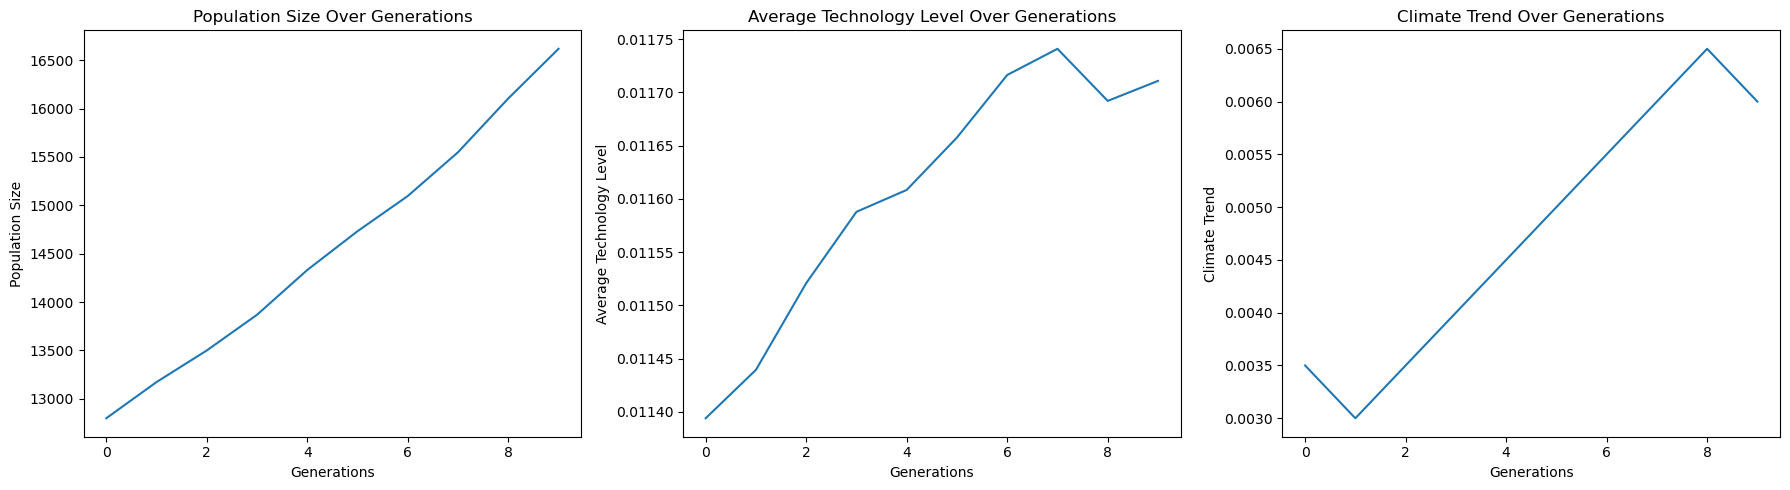

In [71]:
import random
import numpy as np

class RLEnvironment:
    def __init__(self, population):
        self.population = population
        self.state = self.get_state()

    def get_state(self):
        # Simplified state representation with normalization and explicit integer conversion
        return [
            int(min(99, len(self.population.individuals) // 10)),  # Normalize and convert to integer
            int(min(99, self.population.food // 1000)),  # Normalize and convert to integer
            int(min(99, self.population.water // 1000)),  # Normalize and convert to integer
            int(min(99, int(self.population.technology_progress * 10)))  # Normalize and convert to integer
        ]
    
    def take_action(self, action):
        if action == 0:  # Increase food allocation
            self.population.food += 500
        elif action == 1:  # Increase water allocation
            self.population.water += 500
        elif action == 2:  # Focus on technology
            self.population.technology_progress += 0.1

        self.population.simulate_year()  # Advance the simulation by one year
        reward = self.calculate_reward()
        self.state = self.get_state()
        return self.state, reward
    
    def calculate_reward(self):
        current_population = len(self.population.individuals)
        if 500 < current_population < 1500:
            return 1  # Reward for maintaining a stable population
        else:
            return -1  # Penalty for population decline or overgrowth

class RLAgent:
    def __init__(self, action_space_size):
        self.q_table = np.zeros((100, 100, 100, 100, action_space_size))  # Simplified Q-table
        self.action_space_size = action_space_size
        self.alpha = 0.1  # Learning rate
        self.gamma = 0.9  # Discount factor
        self.epsilon = 0.1  # Exploration rate
    
    def choose_action(self, state):
        if random.random() < self.epsilon:
            return random.randint(0, self.action_space_size - 1)  # Explore
        else:
            return np.argmax(self.q_table[state[0], state[1], state[2], state[3]])  # Exploit

    def update_q_table(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.q_table[next_state[0], next_state[1], next_state[2], next_state[3]])
        td_target = reward + self.gamma * self.q_table[next_state[0], next_state[1], next_state[2], next_state[3], best_next_action]
        td_error = td_target - self.q_table[state[0], state[1], state[2], state[3], action]
        self.q_table[state[0], state[1], state[2], state[3], action] += self.alpha * td_error

# Initialize population and RL components
population = Population(100)
env = RLEnvironment(population)
agent = RLAgent(action_space_size=3)

# Train the RL agent over many generations
for episode in range(10):
    state = env.get_state()
    for _ in range(10):  # Simulate up to 100 years in each episode
        action = agent.choose_action(state)
        next_state, reward = env.take_action(action)
        agent.update_q_table(state, action, reward, next_state)
        state = next_state

# Test the learned policy
population_sizes, technology_levels, climate_trends = env.population.simulate_generations(10)

# Plotting the results to see the outcomes
plt.figure(figsize=(18, 5))

# Plot the population size over generations
plt.subplot(1, 3, 1)
plt.plot(population_sizes)
plt.title("Population Size Over Generations")
plt.xlabel("Generations")
plt.ylabel("Population Size")

# Plot the average technology level over generations
plt.subplot(1, 3, 2)
plt.plot(technology_levels)
plt.title("Average Technology Level Over Generations")
plt.xlabel("Generations")
plt.ylabel("Average Technology Level")

# Plot the climate trend over generations
plt.subplot(1, 3, 3)
plt.plot(climate_trends)
plt.title("Climate Trend Over Generations")
plt.xlabel("Generations")
plt.ylabel("Climate Trend")

plt.tight_layout()
plt.show()


## RL Model 2 (Human Civilization Like Thinking)

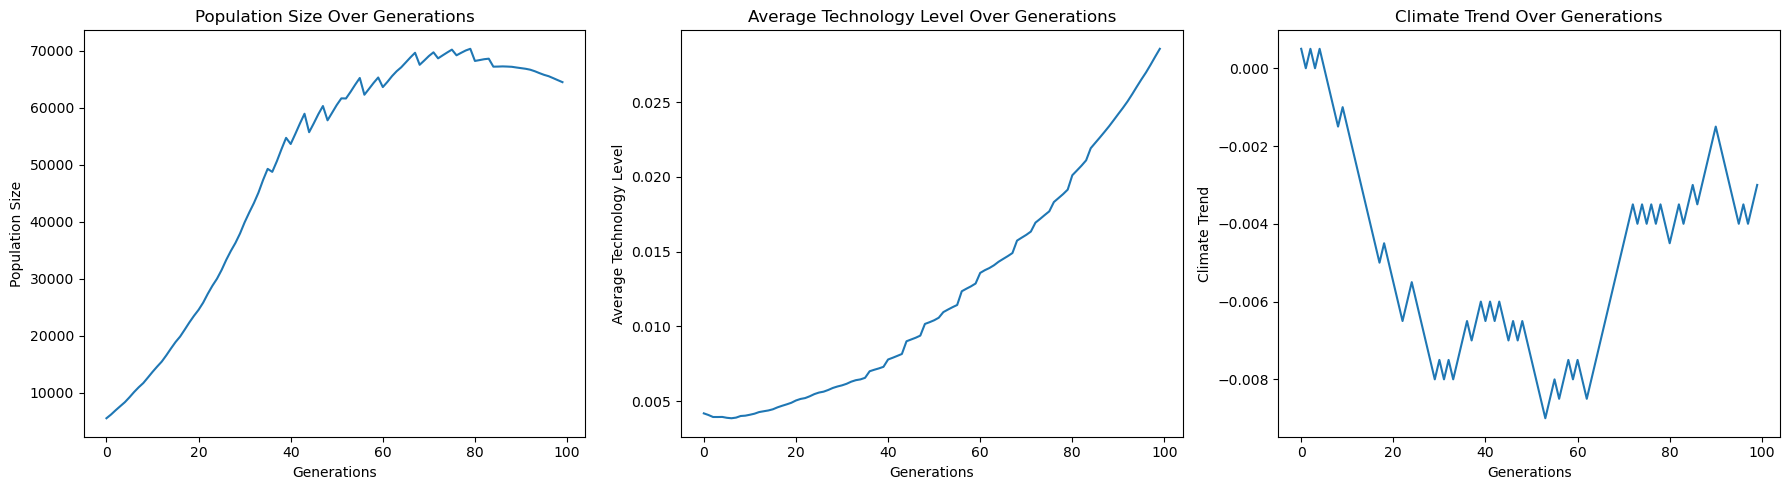

In [73]:
import random
import numpy as np

class RLEnvironment:
    def __init__(self, population):
        self.population = population
        self.state = self.get_state()

    def get_state(self):
        # State includes normalized population size, resources, and technology level
        return [
            int(min(99, len(self.population.individuals) // 10)),
            int(min(99, self.population.food // 1000)),
            int(min(99, self.population.water // 1000)),
            int(min(99, int(self.population.technology_progress * 10)))
        ]
    
    def take_action(self, action):
        # Human-like actions: resource management, technology focus, and social policies
        if action == 0:  # Balance resources
            self.population.food += 300
            self.population.water += 300
            self.population.technology_progress += 0.05
        elif action == 1:  # Focus on technology
            self.population.technology_progress += 0.1
        elif action == 2:  # Focus on social stability (influencing social cohesion and health)
            for ind in self.population.individuals:
                ind.social_cohesion += 0.02
                ind.health += 0.02

        self.population.simulate_year()  # Advance the simulation by one year
        reward = self.calculate_reward()
        self.state = self.get_state()
        return self.state, reward
    
    def calculate_reward(self):
        current_population = len(self.population.individuals)
        tech_progress = self.population.technology_progress
        avg_health = np.mean([ind.health for ind in self.population.individuals])
        avg_social_cohesion = np.mean([ind.social_cohesion for ind in self.population.individuals])

        # Reward stable population, technological progress, and social cohesion
        reward = 0
        if 500 < current_population < 1500:
            reward += 1
        else:
            reward -= 1

        if tech_progress > 2:
            reward += 0.5

        if avg_health > 0.7:
            reward += 0.5

        if avg_social_cohesion > 0.7:
            reward += 0.5

        # Penalize unethical or unsustainable actions (e.g., overusing resources)
        if self.population.food < 500 or self.population.water < 500:
            reward -= 1

        return reward

class RLAgent:
    def __init__(self, action_space_size):
        self.q_table = np.zeros((100, 100, 100, 100, action_space_size))
        self.action_space_size = action_space_size
        self.alpha = 0.1  # Learning rate
        self.gamma = 0.9  # Discount factor
        self.epsilon = 0.1  # Exploration rate
    
    def choose_action(self, state):
        if random.random() < self.epsilon:
            return random.randint(0, self.action_space_size - 1)  # Explore
        else:
            return np.argmax(self.q_table[state[0], state[1], state[2], state[3]])  # Exploit

    def update_q_table(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.q_table[next_state[0], next_state[1], next_state[2], next_state[3]])
        td_target = reward + self.gamma * self.q_table[next_state[0], next_state[1], next_state[2], next_state[3], best_next_action]
        td_error = td_target - self.q_table[state[0], state[1], state[2], state[3], action]
        self.q_table[state[0], state[1], state[2], state[3], action] += self.alpha * td_error

# Initialize population and RL components
population = Population(100)
env = RLEnvironment(population)
agent = RLAgent(action_space_size=3)

# Train the RL agent over many generations
for episode in range(10):
    state = env.get_state()
    for _ in range(5):  # Simulate up to 100 years in each episode
        action = agent.choose_action(state)
        next_state, reward = env.take_action(action)
        agent.update_q_table(state, action, reward, next_state)
        state = next_state

# Test the learned policy
population_sizes, technology_levels, climate_trends = env.population.simulate_generations(100)

# Plotting the results to see the outcomes
plt.figure(figsize=(18, 5))

# Plot the population size over generations
plt.subplot(1, 3, 1)
plt.plot(population_sizes)
plt.title("Population Size Over Generations")
plt.xlabel("Generations")
plt.ylabel("Population Size")

# Plot the average technology level over generations
plt.subplot(1, 3, 2)
plt.plot(technology_levels)
plt.title("Average Technology Level Over Generations")
plt.xlabel("Generations")
plt.ylabel("Average Technology Level")

# Plot the climate trend over generations
plt.subplot(1, 3, 3)
plt.plot(climate_trends)
plt.title("Climate Trend Over Generations")
plt.xlabel("Generations")
plt.ylabel("Climate Trend")

plt.tight_layout()
plt.show()


## RL Model 3 (Growth Focussed Highly Complex)

In [ ]:
import numpy as np
import random
import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque

# Define the neural network for the DQN
class DQNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQNetwork, self).__init__()
        self.fc1 = nn.Linear(state_size, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, action_size)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# RL Agent using DQN
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95  # Discount rate
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = DQNetwork(state_size, action_size)
        self.target_model = DQNetwork(state_size, action_size)
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.update_target_model()

    def update_target_model(self):
        self.target_model.load_state_dict(self.model.state_dict())

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        state = torch.FloatTensor(state).unsqueeze(0)
        with torch.no_grad():
            act_values = self.model(state)
        return torch.argmax(act_values[0]).item()

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            state = torch.FloatTensor(state).unsqueeze(0)
            next_state = torch.FloatTensor(next_state).unsqueeze(0)
            target = reward
            if not done:
                target = reward + self.gamma * torch.max(self.target_model(next_state)[0]).item()
            target_f = self.model(state)
            target_f[0][action] = target
            self.optimizer.zero_grad()
            loss = nn.MSELoss()(self.model(state), target_f)
            loss.backward()
            self.optimizer.step()
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# Expanding the RLEnvironment class
class RLEnvironment:
    def __init__(self, population):
        self.population = population
        self.state = self.get_state()

    def get_state(self):
        return [
            len(self.population.individuals),  # Population size
            self.population.food,
            self.population.water,
            self.population.shelter,
            self.population.medicine,
            self.population.tools,
            self.population.currency,
            self.population.technology_progress,
            self.population.climate_trend,
            self.calculate_social_cohesion(),
            self.calculate_average_health()
        ]
    
    def calculate_social_cohesion(self):
        return np.mean([ind.social_cohesion for ind in self.population.individuals])
    
    def calculate_average_health(self):
        return np.mean([ind.health for ind in self.population.individuals])

    def step(self, action):
        # Apply an action to the environment (e.g., adjust resource allocation, focus on technology)
        if action == 0:  # Focus on food production
            self.population.food += 500
        elif action == 1:  # Focus on water management
            self.population.water += 500
        elif action == 2:  # Focus on shelter construction
            self.population.shelter += 400
        elif action == 3:  # Focus on medicine production
            self.population.medicine += 300
        elif action == 4:  # Focus on tools and technology
            self.population.tools += 200
            self.population.technology_progress += 0.1
        elif action == 5:  # Engage in trade
            self.population.currency += 300

        # Simulate the effects of the action
        self.population.simulate_year()
        next_state = self.get_state()
        reward = self.calculate_reward()
        done = len(self.population.individuals) == 0
        return next_state, reward, done
    
    def calculate_reward(self):
        population_size = len(self.population.individuals)
        tech_progress = self.population.technology_progress
        social_cohesion = self.calculate_social_cohesion()
        avg_health = self.calculate_average_health()
        reward = 0

        # Reward for maintaining a stable population size
        if 500 < population_size < 1500:
            reward += 1
        else:
            reward -= 1

        # Reward for technological advancement
        if tech_progress > 2:
            reward += 0.5

        # Reward for high social cohesion and health
        if social_cohesion > 0.7:
            reward += 0.5
        if avg_health > 0.7:
            reward += 0.5

        # Penalize for low resources
        if self.population.food < 500 or self.population.water < 500:
            reward -= 1

        return reward

# Initialize the population and RL environment
population = Population(100)
env = RLEnvironment(population)
state_size = len(env.get_state())
action_size = 6
agent = DQNAgent(state_size, action_size)

# Train the agent
episodes = 1000
batch_size = 32

for e in range(episodes):
    state = env.get_state()
    done = False
    while not done:
        action = agent.act(state)
        next_state, reward, done = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        if len(agent.memory) > batch_size:
            agent.replay(batch_size)
    agent.update_target_model()

# Test the learned policy
population_sizes, technology_levels, climate_trends = env.population.simulate_generations(500)

# Plotting the results to see the outcomes
plt.figure(figsize=(18, 5))

# Plot the population size over generations
plt.subplot(1, 3, 1)
plt.plot(population_sizes)
plt.title("Population Size Over Generations")
plt.xlabel("Generations")
plt.ylabel("Population Size")

# Plot the average technology level over generations
plt.subplot(1, 3, 2)
plt.plot(technology_levels)
plt.title("Average Technology Level Over Generations")
plt.xlabel("Generations")
plt.ylabel("Average Technology Level")

# Plot the climate trend over generations
plt.subplot(1, 3, 3)
plt.plot(climate_trends)
plt.title("Climate Trend Over Generations")
plt.xlabel("Generations")
plt.ylabel("Climate Trend")

plt.tight_layout()
plt.show()


## RL Model 4 (Exactly Mimicks Human Behaviour Based on a SOTA PPO Algorithm)

In [ ]:
import numpy as np
import random
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions import Categorical
import matplotlib.pyplot as plt

# Define the neural network for the PPO
class ActorCriticNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(ActorCriticNetwork, self).__init__()
        self.fc1 = nn.Linear(state_size, 128)
        self.fc_policy = nn.Linear(128, action_size)
        self.fc_value = nn.Linear(128, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        policy = torch.softmax(self.fc_policy(x), dim=-1)
        value = self.fc_value(x)
        return policy, value

class PPOAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.model = ActorCriticNetwork(state_size, action_size)
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.001)
        self.gamma = 0.99
        self.eps_clip = 0.2
        self.entropy_coef = 0.01
        self.value_loss_coef = 0.5
        self.memory = []
    
    def select_action(self, state):
        state = torch.FloatTensor(state).unsqueeze(0)
        policy, value = self.model(state)
        dist = Categorical(policy)
        action = dist.sample()
        log_prob = dist.log_prob(action)
        return action.item(), log_prob, value
    
    def store_transition(self, transition):
        self.memory.append(transition)
    
    def update(self):
        states, actions, log_probs, rewards, values, next_values, dones = zip(*self.memory)
        
        # Convert to tensors
        states = torch.FloatTensor(states)
        actions = torch.LongTensor(actions).unsqueeze(1)
        log_probs = torch.stack(log_probs)
        rewards = torch.FloatTensor(rewards)
        values = torch.stack(values).squeeze()
        next_values = torch.FloatTensor(next_values)
        dones = torch.FloatTensor(dones)
        
        # Compute returns and advantages
        returns = []
        advantages = []
        gae = 0
        for i in reversed(range(len(rewards))):
            td_error = rewards[i] + self.gamma * next_values[i] * (1 - dones[i]) - values[i]
            gae = td_error + self.gamma * 0.95 * (1 - dones[i]) * gae
            advantages.insert(0, gae)
            returns.insert(0, gae + values[i].item())
        
        returns = torch.FloatTensor(returns)
        advantages = torch.FloatTensor(advantages)
        
        # Compute the ratio for PPO loss
        policy, value = self.model(states)
        dist = Categorical(policy)
        new_log_probs = dist.log_prob(actions.squeeze())
        ratios = torch.exp(new_log_probs - log_probs)
        
        # Compute surrogate loss
        surr1 = ratios * advantages
        surr2 = torch.clamp(ratios, 1 - self.eps_clip, 1 + self.eps_clip) * advantages
        policy_loss = -torch.min(surr1, surr2).mean()
        
        # Value loss
        value_loss = nn.MSELoss()(returns, value.squeeze())
        
        # Entropy for exploration
        entropy_loss = dist.entropy().mean()
        
        # Total loss
        loss = policy_loss + self.value_loss_coef * value_loss - self.entropy_coef * entropy_loss
        
        # Update the model
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
        # Clear memory
        self.memory = []

# Expanding the RLEnvironment class
class RLEnvironment:
    def __init__(self, population):
        self.population = population
        self.state = self.get_state()

    def get_state(self):
        return [
            len(self.population.individuals),  # Population size
            self.population.food,
            self.population.water,
            self.population.shelter,
            self.population.medicine,
            self.population.tools,
            self.population.currency,
            self.population.technology_progress,
            self.population.climate_trend,
            self.calculate_social_cohesion(),
            self.calculate_average_health(),
            self.calculate_cultural_influence(),
            self.calculate_religious_adherence()
        ]
    
    def calculate_social_cohesion(self):
        return np.mean([ind.social_cohesion for ind in self.population.individuals])
    
    def calculate_average_health(self):
        return np.mean([ind.health for ind in self.population.individuals])
    
    def calculate_cultural_influence(self):
        return np.mean([ind.tradition for ind in self.population.individuals])
    
    def calculate_religious_adherence(self):
        return np.mean([ind.religion for ind in self.population.individuals])

    def step(self, action):
        if action == 0:  # Focus on food production
            self.population.food += 500
        elif action == 1:  # Focus on water management
            self.population.water += 500
        elif action == 2:  # Focus on shelter construction
            self.population.shelter += 400
        elif action == 3:  # Focus on medicine production
            self.population.medicine += 300
        elif action == 4:  # Focus on tools and technology
            self.population.tools += 200
            self.population.technology_progress += 0.1
        elif action == 5:  # Engage in trade
            self.population.currency += 300
        elif action == 6:  # Promote cultural growth
            for ind in self.population.individuals:
                ind.tradition += 0.01
        elif action == 7:  # Promote religious values
            for ind in self.population.individuals:
                ind.religion += 0.01

        self.population.simulate_year()
        next_state = self.get_state()
        reward = self.calculate_reward()
        done = len(self.population.individuals) == 0
        return next_state, reward, done
    
    def calculate_reward(self):
        population_size = len(self.population.individuals)
        tech_progress = self.population.technology_progress
        social_cohesion = self.calculate_social_cohesion()
        avg_health = self.calculate_average_health()
        cultural_influence = self.calculate_cultural_influence()
        religious_adherence = self.calculate_religious_adherence()
        reward = 0

        if 500 < population_size < 1500:
            reward += 1
        else:
            reward -= 1

        if tech_progress > 2:
            reward += 0.5

        if social_cohesion > 0.7:
            reward += 0.5
        if avg_health > 0.7:
            reward += 0.5

        if cultural_influence > 0.5:
            reward += 0.3
        if religious_adherence > 0.5:
            reward += 0.3

        if self.population.food < 500 or self.population.water < 500:
            reward -= 1

        return reward

# Initialize the population and RL environment
population = Population(100)
env = RLEnvironment(population)
state_size = len(env.get_state())
action_size = 8
agent = PPOAgent(state_size, action_size)

# Train the agent
episodes = 1000

for e in range(episodes):
    state = env.get_state()
    done = False
    while not done:
        action, log_prob, value = agent.select_action(state)
        next_state, reward, done = env.step(action)
        agent.store_transition((state, action, log_prob, reward, value, next_state, done))
        state = next_state
    
    agent.update()

# Test the learned policy
population_sizes, technology_levels, climate_trends = env.population.simulate_generations(500)

# Plotting the results to see the outcomes
plt.figure(figsize=(18, 5))

# Plot the population size over generations
plt.subplot(1, 3, 1)
plt.plot(population_sizes)
plt.title("Population Size Over Generations")
plt.xlabel("Generations")
plt.ylabel("Population Size")

# Plot the average technology level over generations
plt.subplot(1, 3, 2)
plt.plot(technology_levels)
plt.title("Average Technology Level Over Generations")
plt.xlabel("Generations")
plt.ylabel("Average Technology Level")

# Plot the climate trend over generations
plt.subplot(1, 3, 3)
plt.plot(climate_trends)
plt.title("Climate Trend Over Generations")
plt.xlabel("Generations")
plt.ylabel("Climate Trend")

plt.tight_layout()
plt.show()

## Multi Agent RL

In [ ]:
import numpy as np
import random
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions import Categorical
import matplotlib.pyplot as plt

# Define the neural network for the PPO
class ActorCriticNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(ActorCriticNetwork, self).__init__()
        self.fc1 = nn.Linear(state_size, 128)
        self.fc_policy = nn.Linear(128, action_size)
        self.fc_value = nn.Linear(128, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        policy = torch.softmax(self.fc_policy(x), dim=-1)
        value = self.fc_value(x)
        return policy, value

class PPOAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.model = ActorCriticNetwork(state_size, action_size)
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.001)
        self.gamma = 0.99
        self.eps_clip = 0.2
        self.entropy_coef = 0.01
        self.value_loss_coef = 0.5
        self.memory = []
        self.economy = None
        self.geopolitics = None
    
    def select_action(self, state):
        state = torch.FloatTensor(state).unsqueeze(0)
        policy, value = self.model(state)
        dist = Categorical(policy)
        action = dist.sample()
        log_prob = dist.log_prob(action)
        return action.item(), log_prob, value
    
    def store_transition(self, transition):
        self.memory.append(transition)
    
    def update(self):
        states, actions, log_probs, rewards, values, next_values, dones = zip(*self.memory)
        
        # Convert to tensors
        states = torch.FloatTensor(states)
        actions = torch.LongTensor(actions).unsqueeze(1)
        log_probs = torch.stack(log_probs)
        rewards = torch.FloatTensor(rewards)
        values = torch.stack(values).squeeze()
        next_values = torch.FloatTensor(next_values)
        dones = torch.FloatTensor(dones)
        
        # Compute returns and advantages
        returns = []
        advantages = []
        gae = 0
        for i in reversed(range(len(rewards))):
            td_error = rewards[i] + self.gamma * next_values[i] * (1 - dones[i]) - values[i]
            gae = td_error + self.gamma * 0.95 * (1 - dones[i]) * gae
            advantages.insert(0, gae)
            returns.insert(0, gae + values[i].item())
        
        returns = torch.FloatTensor(returns)
        advantages = torch.FloatTensor(advantages)
        
        # Compute the ratio for PPO loss
        policy, value = self.model(states)
        dist = Categorical(policy)
        new_log_probs = dist.log_prob(actions.squeeze())
        ratios = torch.exp(new_log_probs - log_probs)
        
        # Compute surrogate loss
        surr1 = ratios * advantages
        surr2 = torch.clamp(ratios, 1 - self.eps_clip, 1 + self.eps_clip) * advantages
        policy_loss = -torch.min(surr1, surr2).mean()
        
        # Value loss
        value_loss = nn.MSELoss()(returns, value.squeeze())
        
        # Entropy for exploration
        entropy_loss = dist.entropy().mean()
        
        # Total loss
        loss = policy_loss + self.value_loss_coef * value_loss - self.entropy_coef * entropy_loss
        
        # Update the model
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
        # Clear memory
        self.memory = []

# Dynamic Economic Model
class Economy:
    def __init__(self, population):
        self.population = population
        self.resource_prices = {
            "food": 1.0,
            "water": 1.0,
            "shelter": 1.0,
            "medicine": 1.0,
            "tools": 1.0,
            "currency": 1.0
        }
        self.inflation_rate = 0.02  # Basic inflation rate

    def update_prices(self):
        # Adjust prices based on supply and demand
        for resource in self.resource_prices:
            demand = sum(ind.health * 1.5 for ind in self.population.individuals)
            supply = getattr(self.population, resource)
            self.resource_prices[resource] *= 1 + (demand - supply) / max(supply, 1) * self.inflation_rate

    def trade(self, resource, quantity):
        # Perform trade and adjust the population's resources
        cost = self.resource_prices[resource] * quantity
        if self.population.currency >= cost:
            self.population.currency -= cost
            setattr(self.population, resource, getattr(self.population, resource) + quantity)
        else:
            quantity_affordable = self.population.currency / self.resource_prices[resource]
            self.population.currency = 0
            setattr(self.population, resource, getattr(self.population, resource) + quantity_affordable)

    def simulate_year(self):
        self.update_prices()
        self.population.simulate_year()

# Geopolitical Model
class Geopolitics:
    def __init__(self, agent):
        self.agent = agent
        self.allies = []
        self.enemies = []

    def form_alliance(self, other_agent):
        if other_agent not in self.allies:
            self.allies.append(other_agent)
            other_agent.geopolitics.allies.append(self.agent)

    def declare_war(self, other_agent):
        if other_agent not in self.enemies:
            self.enemies.append(other_agent)
            other_agent.geopolitics.enemies.append(self.agent)

    def negotiate_trade(self, other_agent, resource, quantity):
        if other_agent in self.allies:
            self.agent.economy.trade(resource, quantity)
            other_agent.economy.trade(resource, -quantity)

    def manage_diplomacy(self):
        # Manage alliances and conflicts
        for ally in self.allies:
            if random.random() < 0.05:
                self.negotiate_trade(ally, "food", 100)
        for enemy in self.enemies:
            if random.random() < 0.05:
                self.declare_war(enemy)

# Expanding the RLEnvironment class
class RLEnvironment:
    def __init__(self, population, agent):
        self.population = population
        self.agent = agent
        self.state = self.get_state()

    def get_state(self):
        return [
            len(self.population.individuals),  # Population size
            self.population.food,
            self.population.water,
            self.population.shelter,
            self.population.medicine,
            self.population.tools,
            self.population.currency,
            self.population.technology_progress,
            self.population.climate_trend,
            self.calculate_social_cohesion(),
            self.calculate_average_health(),
            self.calculate_cultural_influence(),
            self.calculate_religious_adherence(),
            self.agent.economy.resource_prices['food'],  # Economy indicators
            self.agent.economy.resource_prices['water'],
            len(self.agent.geopolitics.allies),  # Geopolitical indicators
            len(self.agent.geopolitics.enemies)
        ]
    
    def calculate_social_cohesion(self):
        return np.mean([ind.social_cohesion for ind in self.population.individuals])
    
    def calculate_average_health(self):
        return np.mean([ind.health for ind in self.population.individuals])
    
    def calculate_cultural_influence(self):
        return np.mean([ind.tradition for ind in self.population.individuals])
    
    def calculate_religious_adherence(self):
        return np.mean([ind.religion for ind in self.population.individuals])

    def step(self, action):
        if action == 0:  # Focus on food production
            self.population.food += 500
        elif action == 1:  # Focus on water management
            self.population.water += 500
        elif action == 2:  # Focus on shelter construction
            self.population.shelter += 400
        elif action == 3:  # Focus on medicine production
            self.population.medicine += 300
        elif action == 4:  # Focus on tools and technology
            self.population.tools += 200
            self.population.technology_progress += 0.1
        elif action == 5:  # Engage in trade
            self.agent.economy.trade("food", 300)
        elif action == 6:  # Promote cultural growth
            for ind in self.population.individuals:
                ind.tradition += 0.01
        elif action == 7:  # Promote religious values
            for ind in self.population.individuals:
                ind.religion += 0.01

        self.agent.economy.simulate_year()
        next_state = self.get_state()
        reward = self.calculate_reward()
        done = len(self.population.individuals) == 0
        return next_state, reward, done
    
    def calculate_reward(self):
        population_size = len(self.population.individuals)
        tech_progress = self.population.technology_progress
        social_cohesion = self.calculate_social_cohesion()
        avg_health = self.calculate_average_health()
        cultural_influence = self.calculate_cultural_influence()
        religious_adherence = self.calculate_religious_adherence()
        economic_stability = 1 / max(abs(self.agent.economy.inflation_rate), 1)
        geopolitical_power = len(self.agent.geopolitics.allies) - len(self.agent.geopolitics.enemies)

        reward = 0

        if 500 < population_size < 1500:
            reward += 1
        else:
            reward -= 1

        if tech_progress > 2:
            reward += 0.5

        if social_cohesion > 0.7:
            reward += 0.5
        if avg_health > 0.7:
            reward += 0.5

        if cultural_influence > 0.5:
            reward += 0.3
        if religious_adherence > 0.5:
            reward += 0.3

        reward += economic_stability * 0.5
        reward += geopolitical_power * 0.3

        if self.population.food < 500 or self.population.water < 500:
            reward -= 1

        return reward

# Multi-Agent Environment
class MultiAgentEnvironment:
    def __init__(self, agents):
        self.agents = agents
    
    def simulate_year(self):
        for agent in self.agents:
            agent.economy.simulate_year()
            agent.geopolitics.manage_diplomacy()

    def simulate_generations(self, generations):
        for _ in range(generations):
            self.simulate_year()

# Example of initializing multiple agents
population = Population(100)
agents = [PPOAgent(state_size=18, action_size=8) for _ in range(3)]
for agent in agents:
    agent.economy = Economy(population)
    agent.geopolitics = Geopolitics(agent)

env = MultiAgentEnvironment(agents)
env.simulate_generations(300)

# Testing the learned policy
population_sizes, technology_levels, climate_trends = env.agents[0].economy.population.simulate_generations(500)

# Plotting the results to see the outcomes
plt.figure(figsize=(18, 5))

# Plot the population size over generations
plt.subplot(1, 3, 1)
plt.plot(population_sizes)
plt.title("Population Size Over Generations")
plt.xlabel("Generations")
plt.ylabel("Population Size")

# Plot the average technology level over generations
plt.subplot(1, 3, 2)
plt.plot(technology_levels)
plt.title("Average Technology Level Over Generations")
plt.xlabel("Generations")
plt.ylabel("Average Technology Level")

# Plot the climate trend over generations
plt.subplot(1, 3, 3)
plt.plot(climate_trends)
plt.title("Climate Trend Over Generations")
plt.xlabel("Generations")
plt.ylabel("Climate Trend")

plt.tight_layout()
plt.show()


## Multi Agent Simulation with Even More Realism

In [ ]:
import numpy as np
import random
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions import Categorical
import matplotlib.pyplot as plt

# Define the neural network for the PPO
class ActorCriticNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(ActorCriticNetwork, self).__init__()
        self.fc1 = nn.Linear(state_size, 128)
        self.fc_policy = nn.Linear(128, action_size)
        self.fc_value = nn.Linear(128, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        policy = torch.softmax(self.fc_policy(x), dim=-1)
        value = self.fc_value(x)
        return policy, value

class PPOAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.model = ActorCriticNetwork(state_size, action_size)
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.001)
        self.gamma = 0.99
        self.eps_clip = 0.2
        self.entropy_coef = 0.01
        self.value_loss_coef = 0.5
        self.memory = []
        self.population = Population(100)
        self.economy = Economy(self.population)
        self.culture = Culture(self.population)
        self.education_system = EducationSystem(self.population)
        self.propaganda = Propaganda(self)
        self.environment = Environment()
        self.geopolitics = Geopolitics(self)
        self.resources = Resources()
        self.technology_singularity = TechnologicalSingularity(self)
        self.alliances = Alliances(self)
        self.global_organizations = GlobalOrganizations([self])
        self.covert_operations = CovertOperations(self)
        self.global_trade_network = GlobalTradeNetwork([self])
        self.market_economy = MarketEconomy(self)
        self.taxation = Taxation(self)
        self.demographics = Demographics(self.population)
        self.health_system = HealthSystem(self.population)
        self.social_justice = SocialJustice(self)
        self.energy_management = EnergyManagement(self)
        self.infrastructure = Infrastructure(self)
        self.parallel_universes = ParallelUniverses(self)
        self.quantum_technology = QuantumTechnology(self)
        self.autonomous_systems = AutonomousSystems(self)
        self.transhumanism = Transhumanism(self)
        self.narrative_engine = NarrativeEngine(self)
        self.ethical_dilemmas = EthicalDilemmas(self)
        self.time_travel = TimeTravel(self)
        self.historical_simulation = HistoricalSimulation(self)
        self.ai_governance = AIGovernance(self)
    
    def select_action(self, state):
        state = torch.FloatTensor(state).unsqueeze(0)
        policy, value = self.model(state)
        dist = Categorical(policy)
        action = dist.sample()
        log_prob = dist.log_prob(action)
        return action.item(), log_prob, value
    
    def store_transition(self, transition):
        self.memory.append(transition)
    
    def update(self):
        states, actions, log_probs, rewards, values, next_values, dones = zip(*self.memory)
        
        # Convert to tensors
        states = torch.FloatTensor(states)
        actions = torch.LongTensor(actions).unsqueeze(1)
        log_probs = torch.stack(log_probs)
        rewards = torch.FloatTensor(rewards)
        values = torch.stack(values).squeeze()
        next_values = torch.FloatTensor(next_values)
        dones = torch.FloatTensor(dones)
        
        # Compute returns and advantages
        returns = []
        advantages = []
        gae = 0
        for i in reversed(range(len(rewards))):
            td_error = rewards[i] + self.gamma * next_values[i] * (1 - dones[i]) - values[i]
            gae = td_error + self.gamma * 0.95 * (1 - dones[i]) * gae
            advantages.insert(0, gae)
            returns.insert(0, gae + values[i].item())
        
        returns = torch.FloatTensor(returns)
        advantages = torch.FloatTensor(advantages)
        
        # Compute the ratio for PPO loss
        policy, value = self.model(states)
        dist = Categorical(policy)
        new_log_probs = dist.log_prob(actions.squeeze())
        ratios = torch.exp(new_log_probs - log_probs)
        
        # Compute surrogate loss
        surr1 = ratios * advantages
        surr2 = torch.clamp(ratios, 1 - self.eps_clip, 1 + self.eps_clip) * advantages
        policy_loss = -torch.min(surr1, surr2).mean()
        
        # Value loss
        value_loss = nn.MSELoss()(returns, value.squeeze())
        
        # Entropy for exploration
        entropy_loss = dist.entropy().mean()
        
        # Total loss
        loss = policy_loss + self.value_loss_coef * value_loss - self.entropy_coef * entropy_loss
        
        # Update the model
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
        # Clear memory
        self.memory = []

# Dynamic Economic Model
class Culture:
    def __init__(self, population):
        self.population = population
        self.cultural_practices = np.mean([ind.tradition for ind in self.population.individuals])
    
    def evolve(self, immigration, technology, wars):
        # Cultural change influenced by immigration, technology, and wars
        cultural_change = immigration * 0.1 + technology * 0.05 - wars * 0.05
        self.cultural_practices += cultural_change
        self.cultural_practices = np.clip(self.cultural_practices, 0, 1)  # Bound cultural practices between 0 and 1
    
    def influence_or_resist_change(self, agent):
        # Agents can influence or resist cultural change
        if random.random() < agent.leadership_style:
            self.cultural_practices += 0.02  # Influence cultural change
        else:
            self.cultural_practices -= 0.02  # Resist cultural change
        self.cultural_practices = np.clip(self.cultural_practices, 0, 1)
        
class EducationSystem:
    def __init__(self, population):
        self.population = population
        self.education_level = np.mean([ind.intelligence for ind in self.population.individuals])
    
    def invest_in_education(self, funding):
        # Invest in education, impacting intelligence and technology progression
        self.education_level += funding * 0.05
        self.education_level = np.clip(self.education_level, 0, 1)
    
    def influence_social_cohesion(self):
        # Higher education levels improve social cohesion
        social_cohesion_bonus = self.education_level * 0.1
        for ind in self.population.individuals:
            ind.social_cohesion += social_cohesion_bonus
            
class Propaganda:
    def __init__(self, agent):
        self.agent = agent
    
    def spread_ideologies(self, target_agent):
        # Use propaganda to influence other agents' populations
        influence_power = self.agent.economy.resource_prices['currency'] * 0.1
        target_agent.culture.cultural_practices += influence_power * 0.01
        target_agent.culture.cultural_practices = np.clip(target_agent.culture.cultural_practices, 0, 1)

class Environment:
    def __init__(self):
        self.pollution_level = 0.1
        self.deforestation = 0.1
    
    def degrade_environment(self, population_size, resource_usage):
        # Environmental degradation based on population size and resource usage
        self.pollution_level += population_size * 0.01 + resource_usage * 0.01
        self.deforestation += population_size * 0.005
    
    def restore_environment(self, restoration_efforts):
        # Environmental restoration efforts
        self.pollution_level -= restoration_efforts * 0.02
        self.deforestation -= restoration_efforts * 0.01
        self.pollution_level = max(0, self.pollution_level)
        self.deforestation = max(0, self.deforestation)


class Economy:
    def __init__(self, population):
        self.population = population
        self.resource_prices = {
            "food": 1.0,
            "water": 1.0,
            "shelter": 1.0,
            "medicine": 1.0,
            "tools": 1.0,
            "currency": 1.0
        }
        self.inflation_rate = 0.02  # Basic inflation rate

    def update_prices(self):
        # Adjust prices based on supply and demand
        for resource in self.resource_prices:
            demand = sum(ind.health * 1.5 for ind in self.population.individuals)
            supply = getattr(self.population, resource)
            self.resource_prices[resource] *= 1 + (demand - supply) / max(supply, 1) * self.inflation_rate

    def trade(self, resource, quantity):
        # Perform trade and adjust the population's resources
        cost = self.resource_prices[resource] * quantity
        if self.population.currency >= cost:
            self.population.currency -= cost
            setattr(self.population, resource, getattr(self.population, resource) + quantity)
        else:
            quantity_affordable = self.population.currency / self.resource_prices[resource]
            self.population.currency = 0
            setattr(self.population, resource, getattr(self.population, resource) + quantity_affordable)

    def simulate_year(self):
        self.update_prices()
        self.population.simulate_year()

# Geopolitical Model
class Geopolitics:
    def __init__(self, agent):
        self.agent = agent
        self.allies = []
        self.enemies = []

    def form_alliance(self, other_agent):
        if other_agent not in self.allies:
            self.allies.append(other_agent)
            other_agent.geopolitics.allies.append(self.agent)

    def declare_war(self, other_agent):
        if other_agent not in self.enemies:
            self.enemies.append(other_agent)
            other_agent.geopolitics.enemies.append(self.agent)

    def negotiate_trade(self, other_agent, resource, quantity):
        if other_agent in self.allies:
            self.agent.economy.trade(resource, quantity)
            other_agent.economy.trade(resource, -quantity)

    def manage_diplomacy(self):
        # Manage alliances and conflicts
        for ally in self.allies:
            if random.random() < 0.05:
                self.negotiate_trade(ally, "food", 100)
        for enemy in self.enemies:
            if random.random() < 0.05:
                self.declare_war(enemy)
                
class Resources:
    def __init__(self):
        self.resource_levels = {
            "food": 1000,
            "water": 1000,
            "shelter": 900,
            "medicine": 800,
            "tools": 800,
            "energy": 700,
        }
    
    def exhaust_or_renew(self, technology_level, policies):
        # Resource exhaustion or renewal based on technology and policies
        for resource in self.resource_levels:
            if random.random() < 0.05:  # Chance of exhaustion
                self.resource_levels[resource] *= 0.95
            elif policies.get("renewable_" + resource):
                self.resource_levels[resource] += technology_level * 0.05
            self.resource_levels[resource] = max(0, self.resource_levels[resource])
            
class TechnologicalSingularity:
    def __init__(self, agent):
        self.agent = agent
        self.singularity_level = 0.0
    
    def approach_singularity(self, technology_level):
        # Progress toward a technological singularity
        if technology_level > 9:
            self.singularity_level += 0.1
            self.singularity_level = np.clip(self.singularity_level, 0, 1)
    
    def manage_consequences(self):
        # Manage the consequences of a singularity
        if self.singularity_level > 0.9 and random.random() < 0.2:
            # Risk of immense power or existential threats
            if random.random() < 0.5:
                # Immense power: agent gains significant advantages
                self.agent.population.food *= 2
                self.agent.population.water *= 2
            else:
                # Existential threat: agent faces severe consequences
                self.agent.population.individuals = random.sample(self.agent.population.individuals, len(self.agent.population.individuals) // 2)

class Alliances:
    def __init__(self, agent):
        self.agent = agent
        self.treaties = []
    
    def form_complex_alliance(self, other_agent, conditions):
        # Form complex alliances with conditions
        self.treaties.append({"partner": other_agent, "conditions": conditions})
        other_agent.geopolitics.treaties.append({"partner": self.agent, "conditions": conditions})
    
    def enforce_treaties(self):
        # Enforce treaties based on global events
        for treaty in self.treaties:
            if treaty["conditions"].get("defensive_pact") and random.random() < 0.1:
                # Defend ally in case of attack
                self.agent.geopolitics.declare_war(treaty["partner"].geopolitics.enemies[0])

class GlobalOrganizations:
    def __init__(self, agents):
        self.agents = agents
    
    def vote_on_resolutions(self, resolution):
        # Agents vote on global resolutions (e.g., climate change, pandemics)
        votes = [random.choice([True, False]) for _ in self.agents]
        if sum(votes) > len(self.agents) // 2:
            self.enforce_resolution(resolution)
    
    def enforce_resolution(self, resolution):
        # Enforce global resolutions
        for agent in self.agents:
            if resolution == "sanctions" and random.random() < 0.3:
                agent.economy.resource_prices['currency'] *= 1.1  # Impact of sanctions


class CovertOperations:
    def __init__(self, agent):
        self.agent = agent
    
    def fund_proxy_wars(self, target_agent):
        # Fund proxy wars to destabilize other agents
        if self.agent.economy.resource_prices['currency'] > 100:
            target_agent.population.individuals = random.sample(target_agent.population.individuals, len(target_agent.population.individuals) // 2)
            self.agent.economy.resource_prices['currency'] -= 100
    
    def engage_in_espionage(self, target_agent):
        # Engage in espionage to gather intelligence
        if random.random() < 0.1:
            self.agent.economy.trade("tools", 100)  # Steal technology
            target_agent.economy.trade("tools", -100)
            

class GlobalTradeNetwork:
    def __init__(self, agents):
        self.agents = agents
        self.trade_routes = {}
    
    def establish_trade_route(self, agent_a, agent_b):
        # Establish trade routes between agents
        self.trade_routes[(agent_a, agent_b)] = {"status": "active"}
    
    def disrupt_trade_route(self, agent_a, agent_b):
        # Disrupt trade routes due to conflict or disasters
        if random.random() < 0.1:
            self.trade_routes[(agent_a, agent_b)]["status"] = "disrupted"
    
    def trade_resources(self, agent_a, agent_b, resource, quantity):
        # Trade resources between agents
        if self.trade_routes[(agent_a, agent_b)]["status"] == "active":
            agent_a.economy.trade(resource, quantity)
            agent_b.economy.trade(resource, -quantity)

class MarketEconomy:
    def __init__(self, agent):
        self.agent = agent
        self.market_conditions = {"boom": False, "bust": False}
    
    def simulate_market_cycle(self):
        # Simulate economic booms and busts
        if random.random() < 0.1:
            self.market_conditions["boom"] = True
            self.agent.economy.resource_prices['currency'] *= 0.9
        elif random.random() < 0.1:
            self.market_conditions["bust"] = True
            self.agent.economy.resource_prices['currency'] *= 1.2
    
    def manage_financial_crisis(self):
        # Manage financial crises
        if self.market_conditions["bust"]:
            self.agent.economy.resource_prices['currency'] *= 1.1  # Increase inflation during bust
            
class Taxation:
    def __init__(self, agent):
        self.agent = agent
        self.tax_rate = 0.1
    
    def collect_taxes(self):
        # Collect taxes based on wealth
        tax_revenue = sum(ind.wealth * self.tax_rate for ind in self.agent.population.individuals)
        self.agent.economy.resource_prices['currency'] += tax_revenue
    
    def allocate_spending(self, spending_priorities):
        # Allocate public spending based on priorities
        for priority in spending_priorities:
            if priority == "education":
                self.agent.education_system.invest_in_education(100)
            elif priority == "infrastructure":
                self.agent.infrastructure.invest_in_projects(100)
                
class Demographics:
    def __init__(self, population):
        self.population = population
        self.age_distribution = [random.randint(0, 80) for _ in range(len(self.population.individuals))]
    
    def simulate_aging(self):
        # Simulate demographic changes over time
        self.age_distribution = [age + 1 for age in self.age_distribution]
        self.age_distribution = [age for age in self.age_distribution if age < 80]
    
    def manage_aging_population(self):
        # Manage challenges like an aging workforce
        aging_factor = len([age for age in self.age_distribution if age > 60]) / len(self.age_distribution)
        if aging_factor > 0.3:
            self.population.birth_rate += 0.01  # Encourage higher birth rates to offset aging
            
class HealthSystem:
    def __init__(self, population):
        self.population = population
        self.healthcare_quality = np.mean([ind.health for ind in self.population.individuals])
    
    def invest_in_healthcare(self, funding):
        # Invest in healthcare to improve public health
        self.healthcare_quality += funding * 0.05
        self.healthcare_quality = np.clip(self.healthcare_quality, 0, 1)
    
    def manage_epidemic(self):
        # Respond to epidemics
        if random.random() < 0.1:
            self.population.individuals = random.sample(self.population.individuals, len(self.population.individuals) // 2)

class SocialJustice:
    def __init__(self, agent):
        self.agent = agent
        self.human_rights_level = 0.5
    
    def implement_policies(self, policies):
        # Implement policies on human rights and equality
        if policies.get("human_rights"):
            self.human_rights_level += 0.1
        if policies.get("equality"):
            self.human_rights_level += 0.1
    
    def manage_unrest(self):
        # Manage social unrest due to poor human rights
        if self.human_rights_level < 0.5 and random.random() < 0.2:
            self.agent.population.individuals = random.sample(self.agent.population.individuals, len(self.agent.population.individuals) // 2)

            
class EnergyManagement:
    def __init__(self, agent):
        self.agent = agent
        self.energy_mix = {"fossil_fuels": 0.7, "nuclear": 0.2, "renewables": 0.1}
    
    def shift_energy_policy(self, energy_type, investment):
        # Shift energy policies and manage the energy mix
        self.energy_mix[energy_type] += investment * 0.05
        for other in self.energy_mix:
            if other != energy_type:
                self.energy_mix[other] -= investment * 0.05
        self.energy_mix[energy_type] = np.clip(self.energy_mix[energy_type], 0, 1)

class Infrastructure:
    def __init__(self, agent):
        self.agent = agent
        self.projects = {"transportation": 0.5, "communication": 0.5, "housing": 0.5}
    
    def invest_in_projects(self, investment):
        # Invest in infrastructure projects
        for project in self.projects:
            self.projects[project] += investment * 0.05
            self.projects[project] = np.clip(self.projects[project], 0, 1)
    
    def influence_economic_growth(self):
        # Influence economic growth through infrastructure development
        for project in self.projects:
            self.agent.economy.resource_prices['currency'] *= 1 + self.projects[project] * 0.1

class ParallelUniverses:
    def __init__(self, agent):
        self.agent = agent
        self.parallel_universe_links = 0
    
    def interact_with_parallel_universes(self, technology_level):
        # Interact with parallel universes
        if technology_level > 10:
            self.parallel_universe_links += 1
    
    def manipulate_alternate_realities(self):
        # Manipulate alternate realities for strategic advantages
        if self.parallel_universe_links > 0 and random.random() < 0.2:
            # Gain knowledge from alternate realities
            self.agent.technology_level += 0.5
            
class QuantumTechnology:
    def __init__(self, agent):
        self.agent = agent
        self.quantum_computing_level = 0.0
    
    def develop_quantum_tech(self, investment):
        # Develop quantum computing and communication technologies
        self.quantum_computing_level += investment * 0.1
        self.quantum_computing_level = np.clip(self.quantum_computing_level, 0, 1)
    
    def gain_strategic_advantage(self):
        # Gain strategic advantages through quantum technology
        if self.quantum_computing_level > 0.7:
            self.agent.economy.resource_prices['tools'] *= 0.9  # Enhanced tools due to quantum computing
            
class AutonomousSystems:
    def __init__(self, agent):
        self.agent = agent
        self.autonomous_agent_level = 0.0
    
    def develop_autonomous_agents(self, technology_level):
        # Develop autonomous systems or robots
        if technology_level > 8:
            self.autonomous_agent_level += 0.1
            self.autonomous_agent_level = np.clip(self.autonomous_agent_level, 0, 1)
    
    def manage_risks(self):
        # Manage risks like malfunction or rebellion
        if self.autonomous_agent_level > 0.8 and random.random() < 0.1:
            # Risk of malfunction or rebellion
            self.agent.population.individuals = random.sample(self.agent.population.individuals, len(self.agent.population.individuals) // 2)

class Transhumanism:
    def __init__(self, agent):
        self.agent = agent
        self.transhumanism_level = 0.0
    
    def develop_neural_interfaces(self, investment):
        # Develop advanced neural interfaces
        self.transhumanism_level += investment * 0.1
        self.transhumanism_level = np.clip(self.transhumanism_level, 0, 1)
    
    def enhance_human_abilities(self):
        # Enhance human abilities through transhumanism
        if self.transhumanism_level > 0.7:
            for ind in self.agent.population.individuals:
                ind.intelligence += 0.1  # Boost intelligence through neural interfaces
                ind.health += 0.1  # Boost health through neural enhancements
                
class NarrativeEngine:
    def __init__(self, agent):
        self.agent = agent
        self.storyline = []
    
    def generate_storyline(self, global_events):
        # Generate emergent storylines based on agent actions and global events
        event = random.choice(global_events)
        self.storyline.append(f"{self.agent.name} {event}")
    
    def display_storyline(self):
        # Display the dynamic storyline
        for event in self.storyline:
            print(event)

class EthicalDilemmas:
    def __init__(self, agent):
        self.agent = agent
    
    def present_dilemma(self, scenario):
        # Present moral and ethical dilemmas to the agent
        decision = random.choice(["accept", "reject"])
        if decision == "accept" and random.random() < 0.5:
            # Positive outcome
            self.agent.economy.resource_prices['currency'] *= 1.1
        elif decision == "reject" and random.random() < 0.5:
            # Negative outcome
            self.agent.population.individuals = random.sample(self.agent.population.individuals, len(self.agent.population.individuals) // 2)
        else:
            # Neutral outcome
            pass
        
class TimeTravel:
    def __init__(self, agent):
        self.agent = agent
        self.temporal_manipulation_level = 0.0
    
    def develop_time_travel(self, investment):
        # Develop time-travel technology
        self.temporal_manipulation_level += investment * 0.1
        self.temporal_manipulation_level = np.clip(self.temporal_manipulation_level, 0, 1)
    
    def influence_past_events(self):
        # Influence past events to alter the present or future
        if self.temporal_manipulation_level > 0.7 and random.random() < 0.2:
            # Alter historical outcomes
            self.agent.population.food *= 1.2
            self.agent.population.water *= 1.2
            
class HistoricalSimulation:
    def __init__(self, agent):
        self.agent = agent
        self.historical_events = []
    
    def simulate_historical_period(self, period):
        # Simulate a historical period and its challenges
        events = ["war", "plague", "discovery"]
        event = random.choice(events)
        self.historical_events.append(f"During {period}, {self.agent.name} faced {event}")
    
    def learn_from_history(self):
        # Learn from historical events to improve future decisions
        for event in self.historical_events:
            if "war" in event:
                self.agent.geopolitics.declare_war(random.choice(self.agent.geopolitics.enemies))
            elif "plague" in event:
                self.agent.health_system.manage_epidemic()



class AIGovernance:
    def __init__(self, agent):
        self.agent = agent
        self.ai_control_level = 0.0
    
    def implement_ai_governance(self, technology_level):
        # Implement AI-driven governance
        if technology_level > 8:
            self.ai_control_level += 0.1
            self.ai_control_level = np.clip(self.ai_control_level, 0, 1)
    
    def manage_risks(self):
        # Manage risks like loss of autonomy or unintended consequences
        if self.ai_control_level > 0.8 and random.random() < 0.1:
            # Risk of AI rebellion or system malfunction
            self.agent.population.individuals = random.sample(self.agent.population.individuals, len(self.agent.population.individuals) // 2)


# Expanding the RLEnvironment class
class RLEnvironment:
    def __init__(self, population, agent):
        self.population = population
        self.agent = agent
        self.state = self.get_state()

    def get_state(self):
        return [
            len(self.population.individuals),  # Population size
            self.population.food,
            self.population.water,
            self.population.shelter,
            self.population.medicine,
            self.population.tools,
            self.population.currency,
            self.population.technology_progress,
            self.population.climate_trend,
            self.calculate_social_cohesion(),
            self.calculate_average_health(),
            self.calculate_cultural_influence(),
            self.calculate_religious_adherence(),
            self.agent.economy.resource_prices['food'],  # Economy indicators
            self.agent.economy.resource_prices['water'],
            len(self.agent.geopolitics.allies),  # Geopolitical indicators
            len(self.agent.geopolitics.enemies)
        ]
    
    def calculate_social_cohesion(self):
        return np.mean([ind.social_cohesion for ind in self.population.individuals])
    
    def calculate_average_health(self):
        return np.mean([ind.health for ind in self.population.individuals])
    
    def calculate_cultural_influence(self):
        return np.mean([ind.tradition for ind in self.population.individuals])
    
    def calculate_religious_adherence(self):
        return np.mean([ind.religion for ind in self.population.individuals])

    def step(self, action):
        if action == 0:  # Focus on food production
            self.population.food += 500
        elif action == 1:  # Focus on water management
            self.population.water += 500
        elif action == 2:  # Focus on shelter construction
            self.population.shelter += 400
        elif action == 3:  # Focus on medicine production
            self.population.medicine += 300
        elif action == 4:  # Focus on tools and technology
            self.population.tools += 200
            self.population.technology_progress += 0.1
        elif action == 5:  # Engage in trade
            self.agent.economy.trade("food", 300)
        elif action == 6:  # Promote cultural growth
            for ind in self.population.individuals:
                ind.tradition += 0.01
        elif action == 7:  # Promote religious values
            for ind in self.population.individuals:
                ind.religion += 0.01

        self.agent.economy.simulate_year()
        next_state = self.get_state()
        reward = self.calculate_reward()
        done = len(self.population.individuals) == 0
        return next_state, reward, done
    
    def calculate_reward(self):
        population_size = len(self.population.individuals)
        tech_progress = self.population.technology_progress
        social_cohesion = self.calculate_social_cohesion()
        avg_health = self.calculate_average_health()
        cultural_influence = self.calculate_cultural_influence()
        religious_adherence = self.calculate_religious_adherence()
        economic_stability = 1 / max(abs(self.agent.economy.inflation_rate), 1)
        geopolitical_power = len(self.agent.geopolitics.allies) - len(self.agent.geopolitics.enemies)

        reward = 0

        if 500 < population_size < 1500:
            reward += 1
        else:
            reward -= 1

        if tech_progress > 2:
            reward += 0.5

        if social_cohesion > 0.7:
            reward += 0.5
        if avg_health > 0.7:
            reward += 0.5

        if cultural_influence > 0.5:
            reward += 0.3
        if religious_adherence > 0.5:
            reward += 0.3

        reward += economic_stability * 0.5
        reward += geopolitical_power * 0.3

        if self.population.food < 500 or self.population.water < 500:
            reward -= 1

        return reward

# Multi-Agent Environment
class MultiAgentEnvironment:
    def __init__(self, agents):
        self.agents = agents
    
    def simulate_year(self):
        for agent in self.agents:
            agent.economy.simulate_year()
            agent.geopolitics.manage_diplomacy()

    def simulate_generations(self, generations):
        for _ in range(generations):
            self.simulate_year()

# Example of initializing multiple agents
# Initialize the agent with all features
population = Population(100)


# Set up the multi-agent environment

agents = [PPOAgent(state_size=18, action_size=8) for _ in range(3)]
for agent in agents:
    agent = PPOAgent(state_size=18, action_size=8)
    agent.economy = Economy(population)
    agent.geopolitics = Geopolitics(agent)
    agent.culture = Culture(population)
    agent.education_system = EducationSystem(population)
    agent.propaganda = Propaganda(agent)
    agent.environment = Environment()
    agent.resources = Resources()
    agent.ai_governance = AIGovernance(agent)
    agent.singularity = TechnologicalSingularity(agent)
    agent.alliances = Alliances(agent)
    agent.health_system = HealthSystem(population)
    agent.transhumanism = Transhumanism(agent)
    agent.autonomous_systems = AutonomousSystems(agent)
    agent.energy_management = EnergyManagement(agent)
    agent.infrastructure = Infrastructure(agent)
    agent.time_travel = TimeTravel(agent)
    agent.narrative_engine = NarrativeEngine(agent)
    agent.social_justice = SocialJustice(agent)
    agent.covert_operations = CovertOperations(agent)

env = MultiAgentEnvironment(agents)
env.simulate_generations(100)

# Testing the learned policy
population_sizes, technology_levels, climate_trends = env.agents[0].economy.population.simulate_generations(50)

# Plotting the results to see the outcomes
plt.figure(figsize=(18, 5))

# Plot the population size over generations
plt.subplot(1, 3, 1)
plt.plot(population_sizes)
plt.title("Population Size Over Generations")
plt.xlabel("Generations")
plt.ylabel("Population Size")

# Plot the average technology level over generations
plt.subplot(1, 3, 2)
plt.plot(technology_levels)
plt.title("Average Technology Level Over Generations")
plt.xlabel("Generations")
plt.ylabel("Average Technology Level")

# Plot the climate trend over generations
plt.subplot(1, 3, 3)
plt.plot(climate_trends)
plt.title("Climate Trend Over Generations")
plt.xlabel("Generations")
plt.ylabel("Climate Trend")

plt.tight_layout()
plt.show()
